# 8강 ML 파이프라인
> 대회에 참여하면서 우리는 우리만의 ML파이프라인을 코드로 구축해 보았다. 데이터를 들여다보고 전처리를 하고 augmentation을 통해 데이터를 늘려보기도 했으며 다양한 모델들을 테스트 해보았을 것이다. 또한 하이퍼파라메타를 튜닝하여 성능 변화를 지켜보기도하고 테스트셋에서 발생하는 오류를 잡기 위해 수많은 시간을 보냈을 것이다.
<br><br>
대회를 진행하면서 무엇을 해야할지 몰라 답답할 때 해당 분야의 논문과 대회의 상위권 솔루션을 들여다보고 다른 캠퍼들과 토론을 하면서 방향을 찾아나가는 것은 매우 좋은 방법이다. 하지만 가끔은 과거 수많은 사람들이 ML파이프라인을 구축하면서 남겨놓았던 지식의 더미를 탐색해보는 것도 의외의 발견을 가져다줄 수도 있다.
<br><br>
여기서 우리는 잠시 숨을 돌리며 우리가 한 일들을 되돌아보고 여기서 더 나아가 ML파이프라인의 각 단계를 더욱 세부적으로 들여다보며 우리가 놓쳤던 새로운 개념들을 배울 것이다.


- [ 팁 ]
> 😉 세부적인 내용의 이해보다는 전체적인 그림을 이해하시는 것을 추천드립니다! 세부적인 내용은 가볍게 훑어보며 이런 개념들이 존재한다는 것을 인지하시고 굳이 이해하실 필요는 없습니다. 나중에 필요한 순간이 올 때 "아! 그런것이 있었지! 지금 공부해서 써먹어보자!" 할 수 있는 것이 중요합니다! 😄

- 환경 설정
    - 패키지 설치 및 임포트
    - 실습을 위한 폴더 경로 설정
    - 실습 자료 iris 데이터넷 다운로드

- ML 파이프라인
    - 📚 데이터 (Data)
    - 🔍 전처리 (Preprocessing)
    - 🧪 인코딩 (Encoding)
    - ✅ 특성 선택 (Feature Selection)
    - 🛠️ 특성 공학 (Feature Engineering)
    - 💎 모델 (Model)
    - 💕 훈련 (Train)
    - 🎯 하이퍼파라메타 자동튜닝 (Hyperparmeter Autotuning)
    - 🏆 테스트 (Test)



# 환경 설정 [😉 이 코드는 반드시 실행하세요! 😉]
> 만약 구글 드라이브 마운트(Google Drive Mount)가 안되어있다면 꼭 마운트를 하고나서 진행한다! 
- 패키지 설치 및 임포트
- **실습을 위한 폴더 경로 설정** <- 😄 반드시 이 파일이 위치한 경로로 수정하세요!!! 😄
- 실습 자료 iris 데이터넷 다운로드

환경 설정 이후 ML파이프라인의 원하는 단계로 가서 코드를 실행한다. 각 단계에서 데이터셋과 관련된 코드가 맨 처음 위치하고 있다면 꼭 실행해주자.



## A. 패키지 설치 및 임포트

In [ ]:
!pip install -q -U PyYAML
!pip install -q -U scikit-learn
!pip install -q shap eli5 cairosvg jupyter_contrib_nbextensions mglearn pip install category_encoders

     |████████████████████████████████| 645kB 17.5MB/s 
     |████████████████████████████████| 22.3MB 51.5MB/s 
     |████████████████████████████████| 358kB 14.5MB/s 
     |████████████████████████████████| 112kB 43.7MB/s 
     |████████████████████████████████| 51kB 5.4MB/s 
     |████████████████████████████████| 20.9MB 1.8MB/s 
     |████████████████████████████████| 542kB 38.2MB/s 
     |████████████████████████████████| 81kB 8.0MB/s 
     |████████████████████████████████| 71kB 6.8MB/s 
     |████████████████████████████████| 870kB 47.8MB/s 
     |████████████████████████████████| 481kB 44.0MB/s 


In [ ]:
import os
import gc
import time
import itertools
import random

from collections import OrderedDict, defaultdict
from abc import *

# 설정
from datetime import datetime

import yaml
import glob
import shutil

# Log
import logging

# I/O
from cairosvg import svg2png
from PIL import Image
from io import BytesIO
from tqdm import tqdm

# 공학용 연산
import numpy as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

import pprint
pp = pprint.PrettyPrinter(indent=1)

# 머신러닝
import lightgbm as lgb

import mglearn

# 딥러닝
import torch
from torch.utils.data import DataLoader, TensorDataset

import torch.nn as nn
import torch.nn.functional as F

In [ ]:
import warnings

# warning을 보고 싶지 않을 경우 아래 코드 활성화
# warnings.filterwarnings('ignore')

## B. 실습을 위한 폴더 경로 설정 <- 😄 반드시 이 파일이 위치한 경로로 수정하세요!!! 😄

In [ ]:
# 이 실습 파일이 위치하고 있는 경로!
# 😄 반드시 이 파일이 위치한 경로로 수정하세요!!! 😄
PROJECT_PATH = "drive/MyDrive/AI 부스트캠프/프로젝트"

In [ ]:
# 실습을 위한 data 폴더 생성
DATA_PATH = os.path.join(PROJECT_PATH, 'data')
if not os.path.isdir(DATA_PATH):
    os.mkdir(DATA_PATH)

## C. 실습 자료 iris 데이터넷 다운로드

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
 
# iris pandas DataFrame 제작!
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df["class"] = pd.Categorical.from_codes(iris.target, ['Iris-' + name for name in list(iris.target_names)])
 
# 뒤에 저장된 csv를 활용하는 코드들과의 호환성을 위해 저장!
iris_df.to_csv(os.path.join(DATA_PATH, 'iris.csv'), index=False)

iris_df.sample(5)

# ML 파이프라인

> ML 파이프라인은 다음 그림에서 볼 수 있듯이 여러 개의 구성요소로 이루어져있다. 하나의 ML모델을 상용화하기 위해 데이터를 모으는 단계부터 최종 배포하는 단계까지 모든 단계를 아우른다.

<img src="https://developers.google.com/machine-learning/testing-debugging/images/ml-pipeline-schematic.svg?hl=ko" width="600">

< 출처 - https://developers.google.com/machine-learning/testing-debugging/pipeline/overview?hl=ko >


## ML 파이프라인 구성

> 우리는 이 섹션에서 데이터를 모으는 것에서 ML 모델을 선정하고 훈련시켜 최종 테스트하는 과정을 9단계로 나누어 간단한 예제와 함께 살펴볼 것이며 이후 다른 강의에서 Serving에 대해서 더 자세히 배울 것이다. ML 프로젝트를 시작하기 위해서 가장 첫 번째로 해야할 일은 문제 정의이지만 해당 내용은 이곳에서 다루지 않는다.

- 📚 데이터 (Data)
- 🔍 전처리 (Preprocessing)
- 🧪 인코딩 (Encoding)
- ✅ 특성 선택 (Feature Selection)
- 🛠️ 특성 공학 (Feature Engineering)
- 💎 모델 (Model)
- 💕 훈련 (Train)
- 🎯 하이퍼파라메타 자동튜닝 (Hyperparmeter Autotuning)
- 🏆 테스트 (Test)



**사용되는 패키지**
- numpy
- pandas
- sklearn
- scipy
- statsmodels
- requests
- mglearn
- category_encoders
- patsy
- seaborn
- eli5
- shap
- vecstack
- lightgbm
- xgboost
- catboost

**사용되는 데이터셋**
- iris

## 📚 데이터 (Data)

- 데이터셋 다운로드 (Download Dataset)
- 데이터셋 제작 (Make Dataset)
- 데이터 압축 (Compress Data)
- 데이터 저장 (Save Data)
- 데이터 읽기 (Read Data)
- 데이터 나누기 (Split Data)



### 📗 데이터셋 다운로드 (Download Dataset)

> 머신러닝 프로젝트에는 데이터셋은 필수이다. 이미 만들어진 데이터셋이 있을 경우 이를 다운로드 하는 방법에 대해 살펴보자

1. 홈페이지에서 직접 데이터셋 검색 후 다운로드 받기
2. 프로그램을 이용해 데이터셋 다운로드 받기
3. ML 라이브러리 데이터셋 패키지 활용

#### 1. 홈페이지에서 직접 데이터셋 검색 후 다운로드 받기

> 가장 간단한 방법으로 데이터가 업로드되어 있는 사이트로 가서 원하는 데이터셋을 찾아낸 이후 데이터셋을 GUI(그래픽 인터페이스)를 이용하여 다운로드 받는다

- [Google Dataset Search](https://datasetsearch.research.google.com/)
- [UCI Machine Learing Repository](http://archive.ics.uci.edu/ml/index.php)
- [Kaggle Datasets](https://www.kaggle.com/datasets)
- [CMU Machine Learning and AI: Find Datasets](https://guides.library.cmu.edu/machine-learning/datasets)
- [AWS open dataset](https://registry.opendata.aws/)

#### 2. 프로그램을 이용해 데이터셋 다운로드 받기
- python `requests` 라이브러리 활용

##### python `requests` 라이브러리 활용

> 데이터셋의 url을 알고 있을 경우 코드를 이용해 데이터셋을 다운로드 받을 수 있다

- [Request Quickstart](https://requests.readthedocs.io/en/master/user/quickstart/)

In [ ]:
import requests

iris_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris_name_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names'

def download_url(url, path):
    response = requests.get(url)
    if response.status_code == 200:
        with open(path, 'wb') as f:
            f.write(response.content)

# iris 데이터셋 다운로드 후 저장
iris_data_path = os.path.join(DATA_PATH, 'iris.data')
iris_name_path = os.path.join(DATA_PATH, 'iris.names')

download_url(iris_data_url, iris_data_path)
download_url(iris_name_url, iris_name_path)

# iris names 정보에서 column명 파악하기
with open(iris_name_path, 'rb') as f:
    iris_name = f.read().decode('utf8')

print('\n'.join(iris_name.split('\n')[49:58]))

# iris data column명 추가하여 읽어오기
iris_df = pd.read_csv(iris_data_path,
                      header=None,
                      names=['sepal length (cm)',
                              'sepal width (cm)',
                              'petal length (cm)',
                              'petal width (cm)',
                              'class'])
iris_df.sample(5)

7. Attribute Information:
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: 
      -- Iris Setosa
      -- Iris Versicolour
      -- Iris Virginica


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
67,5.8,2.7,4.1,1.0,Iris-versicolor
28,5.2,3.4,1.4,0.2,Iris-setosa
26,5.0,3.4,1.6,0.4,Iris-setosa
16,5.4,3.9,1.3,0.4,Iris-setosa
14,5.8,4.0,1.2,0.2,Iris-setosa


#### 3. ML 라이브러리 데이터셋 패키지 활용

> 데이터셋을 쉽게 다운로드 받을 수 있는 서브 패키지

- ##### [sklearn.datasets](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)

##### sklearn.datasets
> 위에서 `requests`를 이용하여서 다운로드하였던 iris 데이터셋을 쉽게 다운로드 할 수 있다

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df["class"] = pd.Categorical.from_codes(iris.target, ['Iris-' + name for name in list(iris.target_names)])

df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
119,6.0,2.2,5.0,1.5,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
61,5.9,3.0,4.2,1.5,Iris-versicolor
82,5.8,2.7,3.9,1.2,Iris-versicolor
32,5.2,4.1,1.5,0.1,Iris-setosa


### 📗 데이터셋 제작 (Make Dataset)

> 만약 필요한 데이터셋이 없다면 직접 제작하여야 한다.

1. 웹페이지 크롤링 (Webpage Crawling)
2. API (Application Programming Interface)
3. 데이터셋 합치기 (Merging Dataset)
4. 라벨링 (Labeling)

#### 1. 웹페이지 크롤링 (Webpage Crawling)
- [selenium 공식문서](https://selenium-python.readthedocs.io/)
- [BeautifulSoup 공식문서](https://beautiful-soup-4.readthedocs.io/en/latest/)

##### selenium

> 매우 강력하고 유명한 크롤러로 자바스크립트로 동작하는 동적 웹페이지에서 손쉽게 정보를 크롤링 할 수 있다. 구글에 활용 방법에 대한 매우 많은 정보가 있다.

![selenium](https://selenium-python.readthedocs.io/_static/logo.png)

##### BeautifulSoup

> HTML과 XML형식의 웹페이지에서 정보를 크롤링하는 파이썬 라이브러리다. 가장 기초적이며 가볍지만 자바스크립트 기반 동적 웹페이지에서의 크롤링은 Selenium 사용을 적극 권장한다

![BeautifulSoup](https://beautiful-soup-4.readthedocs.io/en/latest/_images/6.1.jpg)



#### 2. API (Application Programming Interface)

> 많은 웹페이지들이 자신들의 정보를 제공하는 API를 지원한다. 이를 활용한다면 크롤링 없이 정보를 손쉽게 얻을 수 있다.

[API 검색 사이트 - Programmable Web](https://www.programmableweb.com/category/all/apis)

API 예시
- [youtube API](https://developers.google.com/youtube/)
- [facebook API](https://developers.facebook.com/)
- [wikipedia API](https://www.mediawiki.org/wiki/API:Main_page)

#### 3. 데이터셋 합치기 (Merging Dataset)

> 제작하고자 하는 데이터셋의 정보가 인터넷 상에는 존재하지만 여기저기 흩어져있는 경우 이 데이터셋들을 모아서 하나의 데이터셋을 구축할 수도 있다. 일부 정보가 누락된 경우 위의 2가지 방법을 통해 해당 누락된 정보를 모아서 나머지 데이터셋들과 합쳐 필요한 데이터셋을 만들 수도 있다.


#### 4. 라벨링 (Labeling)

> 데이터셋의 정보들을 모두 모은 상태에서 추가적으로 라벨을 붙여야 할 수도 있다. 이 경우 라벨링 툴을 개발하거나 이용해 직접 한땀한땀 붙여도 상관없지만 관련된 업무를 수행해주는 회사를 이용하는 방법도 있다.

- 데이타 라벨링 툴 제작
- 데이터 라벨링 툴 이용
- 데이터 라벨링 전문 회사에 의뢰

##### 데이터 라벨링 전문 회사에 의뢰

- [Appen](https://appen.com/)
- [Amazon Mechanical Turk](https://www.mturk.com/)
- [Scale AI](https://scale.com/)

### 📗 데이터 압축 (Compress Data)

> 데이터의 크기가 너무 클 경우 크기를 줄일 필요가 있다. 데이터의 종류에 따라 적절한 데이터 압축 방식을 택해야 한다.

1. 정형 데이터 (Structured data)
2. 비정형 데이터 (Unstructured data)

#### 1. 정형 데이터 (Structured data)
- pandas DataFrame 압축

##### pandas DataFrame 압축

> 정형 데이터를 다룰 때 흔히 pandas DataFrame이 사용된다. 자료의 정보 손실을 최소화하면서 각 열의 자료구조를 바꿈으로서 데이터의 크기를 압축한다.

< 출처 - https://www.kaggle.com/alexeykupershtokh/safe-memory-reduction >

In [ ]:
def compress_series(col, deep=True, verbose=False, obj_to_cat=False):
    """Downcast the datatype of pandas Series

    Reference - https://www.kaggle.com/alexeykupershtokh/safe-memory-reduction
    """

    numerics = ['int16',
                'uint16',
                'int32',
                'uint32',
                'int64',
                'uint64',
                'float16',
                'float32',
                'float64']

    start_mem = col.memory_usage(deep=deep) / 1024 ** 2

    col_type = col.dtypes
    
    # numerics
    if col_type in numerics:
        col = _compress_numeric_column(col)

    # strings
    if (col_type == 'object') and obj_to_cat:
        col = col.astype('category')
    
    if verbose:
        print(f'Column : {col_type} -> {col.dtypes}')

    end_mem = col.memory_usage(deep=deep) / 1024 ** 2
    percent = 100 * (start_mem - end_mem) / start_mem
    if verbose:
        if start_mem == end_mem:
            print('Failed to compress column')
        else:
            print('Mem. usage decreased from {:5.2f} Mb to {:5.2f} Mb ({:.1f}% reduction)'.format(start_mem, end_mem, percent))
    return col

def compress_df(df, deep=True, verbose=False, obj_to_cat=False):

    """Downcast the datatype of pandas DataFrame

    Reference - https://www.kaggle.com/alexeykupershtokh/safe-memory-reduction
    """
    numerics = ['int16',
                'uint16',
                'int32',
                'uint32',
                'int64',
                'uint64',
                'float16',
                'float32',
                'float64']

    start_mem = df.memory_usage(deep=deep).sum() / 1024 ** 2
    for col in df.columns:
        col_type = df[col].dtypes
        
        # numerics
        if col_type in numerics:
            df[col] = _compress_numeric_column(df[col])

        # strings
        if (col_type == 'object') and obj_to_cat:
            df[col] = df[col].astype('category')
        
        if verbose:
            print(f'Column {col}: {col_type} -> {df[col].dtypes}')

    end_mem = df.memory_usage(deep=deep).sum() / 1024 ** 2
    percent = 100 * (start_mem - end_mem) / start_mem
    if verbose:
        print('Mem. usage decreased from {:5.2f} Mb to {:5.2f} Mb ({:.1f}% reduction)'.format(start_mem, end_mem, percent))
    return df

def _compress_numeric_column(col,
                             max_loss_limit=0.001,
                             avg_loss_limit=0.001,
                             na_loss_limit=0,
                             n_uniq_loss_limit=0,
                             fillna=0):
    """Downcast the datatype of pandas Series with numeric datatype

    Reference - https://www.kaggle.com/alexeykupershtokh/safe-memory-reduction

    Args:
        col (pd.Series): Target column to downcast
        max_loss_limit: don't allow any float to lose precision
                        more than this value. Any values are ok for
                        GBT algorithms as long as you don't unique values.
                        See https://en.wikipedia.org/wiki/Half-precision_floating-point_format#Precision_limitations_on_decimal_values_in_[0,_1]
        avg_loss_limit: same but calculates average throughout the series.
        na_loss_limit: not really useful.
        n_uniq_loss_limit: very important parameter.
                            If you have a float field with very high cardinality
                            you can set this value to something like
                            n_records * 0.01 in order to allow some field relaxing.

    Returns:
        pd.Series: Output column that is finished downcasting or failed downcasting

    """
    is_float = str(col.dtypes)[:5] == 'float'
    na_count = col.isna().sum()
    n_uniq = col.nunique(dropna=False)

    try_types = ['float16', 'float32']
    if na_count <= na_loss_limit:
        try_types = ['int8', 'int16', 'float16', 'int32', 'float32']

    # try downcast to type which the size is smallest to largest 
    for try_type in try_types:
        col_tmp = col

        # float to int conversion
        # try to round to minimize casting error
        if is_float and (str(try_type)[:3] == 'int'):
            col_tmp = col_tmp.copy().fillna(fillna).round()

        # downcast
        col_tmp = col_tmp.astype(try_type)

        max_loss = (col_tmp - col).abs().max()
        avg_loss = (col_tmp - col).abs().mean()
        na_loss = np.abs(na_count - col_tmp.isna().sum())
        n_uniq_loss = np.abs(n_uniq - col_tmp.nunique(dropna=False))

        # If every condition matches than return that column
        if (max_loss <= max_loss_limit and
            avg_loss <= avg_loss_limit and
            na_loss <= na_loss_limit and
            n_uniq_loss <= n_uniq_loss_limit):
            return col_tmp

    # failed to downcast the column
    return col

In [ ]:
# pandas Series 압축
original_series = pd.Series([1, 2, 3])
compressed_series = compress_series(original_series, verbose=True)

Column : int64 -> int8
Mem. usage decreased from  0.00 Mb to  0.00 Mb (13.8% reduction)


In [ ]:
# pandas DataFrame 압축
original_df = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': ['duck', 'said', 'quark']})
compressed_df = compress_df(original_df, verbose=True)

Column a: int64 -> int8
Column b: int64 -> int8
Column c: object -> object
Mem. usage decreased from  0.00 Mb to  0.00 Mb (11.7% reduction)


#### 2. 비정형 데이터 (Unstructured data)
- 이미지 압축

### 📗 데이터 저장 (Save Data)

> 기존 데이터셋을 변형하거나 새로운 데이터셋을 만들었다면 이를 저장해두어야 한다. 다양한 파일 포맷이 있으며 데이터의 크기와 종류, 컴퓨터의 성능, 사용 맥락에 따라 적절한 데이터 포맷을 선정하여야 한다.

1. 정형 데이터 (Structured data)
2. 비정형 데이터 (Unstructured data)
3. 반정형 데이터 (Semi-structured data)

**유용한 자료**
- [Kaggle에서 사용되는 데이터 포맷 종류](https://www.kaggle.com/docs/datasets#types-of-datasets)
- [The Best Format to Save Pandas Data](https://towardsdatascience.com/the-best-format-to-save-pandas-data-414dca023e0d)




#### 1. 정형 데이터 (Structured data)

> 정해진 데이터 저장 규격이 있는 데이터들이다. 테이블 형태로 표현 가능하고 관계형 데이터베이스에 저장될 수 있는 데이터들을 지칭한다. 데이터의 크기가 작을 때에는 csv, excel과 같은 포맷을 선택할 수도 있지만, 데이터 크기가 매우 커지기 시작하면 관계형 데이터베이스을 사용해야 할 수도 있다.

**사용할 수 있는 저장 포맷 종류**

- csv
- excel
- [pickle](https://docs.python.org/ko/3/library/pickle.html)
- feather
- hdf5
- sqlite3
- BigQuery

In [ ]:
# 저장에 사용할 iris dataset 읽어오기 
csv_path = os.path.join(DATA_PATH, 'iris.csv')
iris_df = pd.read_csv(csv_path)

##### csv

> 매우 대중적인 comma(,)로 구분된 텍스트 파일이다. 데이터 저장 크기가 작고 직접 파일을 열어서 값을 확인하기도 편하다. **Kaggle에서 가장 많이 사용되는 포맷이다.**

In [ ]:
# csv로 저장하기
iris_csv_path = os.path.join(DATA_PATH, 'iris.csv')
iris_df.to_csv(iris_csv_path, index=False)

##### pickle

> 파이썬 객체를 직렬화하여 바이너리로 저장한다. 



In [ ]:
iris_pickle_path = os.path.join(DATA_PATH, 'iris.pkl')
iris_df.to_pickle(iris_pickle_path)

##### feather

> 이름처럼 빠르고, 가벼우며, 사용하기 쉬운 데이터를 저장하기 위한 바이너리 파일 포맷이다


In [ ]:
iris_feather_path = os.path.join(DATA_PATH, 'iris.ftr')
iris_df.to_feather(iris_feather_path)

##### sqlite3

> 정형 데이터로 이루어진 데이터셋에 테이블 종류가 많거나 데이터 크기가 매우 큰 상황(10억개의 행)에서 지속적으로 데이터를 읽어와야 할 경우 관계형 데이터베이스를 사용하는 것이 권장된다.

- sqlalchemy

In [ ]:
from sqlalchemy import create_engine

# 데이터베이스 연결
engine = create_engine(f'sqlite:///{DATA_PATH}/iris.db')

# sqlite db로 저장
iris_df.to_sql('master', engine, index=False)

#### 2. 비정형 데이터 (Unstructured data)
> 텍스트, 음성, 이미지, 영상과 같은 자료가 여기에 속한다. 따로 정해진 데이터 규격이 없으며 정보 하나당 파일 하나를 차지하는 경우가 많다. 이미지나 영상처럼 크기가 큰 비정형 데이터의 경우, 파일 자체가 아니라 파일 주소를 데이터베이스에 저장하여 관리하기도 한다.

**사용할 수 있는 저장 포맷 종류**
- 텍스트 (txt)
- 이미지 (jpg, png)
- 영상 (mp4)
- 음성 (wav)
- 이메일
- pdf
- MongoDB

#### 3. 반정형 데이터 (Semi-structured data)
> 정해진 데이터 규격이 존재하지만 기존 관계형 데이터베이스나 테이블 형태로 저장할 수 없는 데이터들이다.

**사용할 수 있는 저장 포맷 종류**

- html
- xml
- json
- protobuf
- MongoDB
- DynamoDB

### 📗 데이터 읽기 (Read Data)

> 데이터가 어떤 포맷으로 저장되어있는지를 확인하고 포맷에 맞춰 데이터를 읽어오면 된다. 다만 사용하고 있는 컴퓨터의 성능에 따라 한번에 읽어올 수 있는 데이터의 크기가 제한된다. 만약 데이터의 크기가 한번에 읽어오기 힘든 크기라면 나눠서 읽는 방법이 있다.

1. 정형 데이터 (Structured data)
2. 비정형 데이터 (Unstructured data)
3. 반정형 데이터 (Semi-structured data)

#### 1. 정형 데이터 (Structured data)

- csv
- excel
- pickle
- feather
- hdf5
- sqlite3
- BigQuery

##### csv
- 한번에 읽어오기
- 나눠서 읽기
- 데이터 타입 지정해서 읽기

- **한번에 읽어오기**

In [ ]:
# read_csv로 파일을 읽어오면 된다
csv_path = os.path.join(DATA_PATH, 'iris.csv')
pd.read_csv(csv_path).sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
138,6.0,3.0,4.8,1.8,Iris-virginica
82,5.8,2.7,3.9,1.2,Iris-versicolor
5,5.4,3.9,1.7,0.4,Iris-setosa
72,6.3,2.5,4.9,1.5,Iris-versicolor
15,5.7,4.4,1.5,0.4,Iris-setosa


- **나눠서 읽기**
    1. pandas read_csv를 이용해 csv 파일을 chunk단위로 나눠서 읽기
    2. 읽어온 모든 chunk단위 DataFrame들을 concat

    - **[ 왜 필요한가? ]**
        - `train.csv` 크기 **5.7GB**
        - Colab ram 크기 **12GB**
        > 만약 우리가 `train.csv`를 한 번에 읽어오면 csv를 읽어오는 과정에 사용하는 ram의 크기가 12GB보다 커지게 되어 colab은 세션을 다시 시작하게 된다.

In [ ]:
# chunk단위로 csv를 읽는 csv reader를 생성한다
csv_reader = pd.read_csv(csv_path, chunksize=100)

# csv를 chunk단위로 읽어 리스트에 보관한다
csv_chunk_list = []
for csv_chunk in csv_reader:
    csv_chunk_list.append(csv_chunk)

# 읽어온 모든 csv chunk들을 concat하여 하나의 DataFrame을 생성한다
pd.concat(csv_chunk_list).sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
2,4.7,3.2,1.3,0.2,Iris-setosa
16,5.4,3.9,1.3,0.4,Iris-setosa
109,7.2,3.6,6.1,2.5,Iris-virginica
8,4.4,2.9,1.4,0.2,Iris-setosa
90,5.5,2.6,4.4,1.2,Iris-versicolor


- 데이터 타입 지정해서 읽기
> 직접 데이터 타입을 지정하기 때문에 추가로 전처리할 필요가 없이 바로 원하는 형태의 데이터를 사용할 수 있으며 크기가 큰 파일을 읽을 때 유용하다. 예로 데이터 타입 지정 없이 읽을 경우 `int64`로 지정되는데 이를 `int8` 데이터 타입으로 읽을 경우 메모리를 8배 적게 사용한다.

In [ ]:
# read_csv로 파일을 읽어오면 된다
csv_path = os.path.join(DATA_PATH, 'iris.csv')
iris_df = pd.read_csv(csv_path,
                      dtype={'sepal length (cm)': 'float32',
                             'sepal width (cm)': 'float32',
                             'petal length (cm)': 'float64',
                             'petal width (cm)': 'float64',
                             'class': 'category'})

In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float32 
 1   sepal width (cm)   150 non-null    float32 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   class              150 non-null    category
dtypes: category(1), float32(2), float64(2)
memory usage: 3.8 KB


##### sqlite

- sqlalchemy

In [ ]:
from sqlalchemy import create_engine

# 데이터베이스 연결
engine = create_engine(f'sqlite:///{DATA_PATH}/iris.db')

# sqlite db에서 정보 읽어오기
iris_df = pd.read_sql('SELECT * FROM master', engine)
iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### 2. 비정형 데이터 (Unstructured data)
- 텍스트 (txt)
- 이미지 (jpg, png)
- 영상 (mp4)
- 음성 (wav)
- 이메일
- pdf

#### 3. 반정형 데이터 (Semi-structured data)

- html
- xml
- json
- protobuf
- MongoDB
- DynamoDB

### 📗 데이터 나누기 (Split Data)

> 데이터가 준비되었으면 우리는 이를 바탕으로 Train, Validation, Test 셋으로 데이터를 나눠야 한다

1. sklearn 라이브러리 사용하기
2. Custom 함수 제작하기

#### 1. sklearn 라이브러리 사용하기

> 데이터를 나누는 것은 머신러닝에 필수적인만큼 sklearn에는 이를 위한 다양한 함수 및 클래스들이 있으며 대표적인 몇 가지만 소개한다.

- [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split)
- [sklearn.model_selection.KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold)
- [sklearn.model_selection.StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold)
- [sklearn.model_selection.TimeSeriesSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html#sklearn.model_selection.TimeSeriesSplit)

**참고자료**
- [model selection - sklearn 공식문서](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection)
- [Cross-validation: evaluating estimator performance - sklearn 공식문서](https://scikit-learn.org/stable/modules/cross_validation.html)

##### train_test_split
> 가장 흔히 사용되는 함수다. 데이터셋을 정해진 비율만큼 나눠주며 Train, Validation, Test 3가지 데이터셋을 만들기 위해서는 2번에 걸쳐서 나눠야 한다. `stratify` 옵션이 존재하며 이를 통해 클래스별로 데이터셋을 나눌 수가 있다

```python
train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
```


In [ ]:
# reference - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split

from sklearn.model_selection import train_test_split
from sklearn import datasets

X, y = datasets.load_iris(return_X_y=True)
X.shape, y.shape

((150, 4), (150,))

In [ ]:
# Train, Test셋으로 분리!
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((120, 4), (120,), (30, 4), (30,))

In [ ]:
# Train, Validation셋으로 분리!
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                      test_size=0.2,
                                                      random_state=0)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((96, 4), (96,), (24, 4), (24,))

##### KFold

> 데이터를 Train, Test로 나누는 작업을 K번만큼 수행하며, 각 데이터셋의 Test 데이터는 서로 겹치지 않는다

```python
KFold(n_splits=5, *, shuffle=False, random_state=None)
```

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_002.png" width="450">

<출처 - https://scikit-learn.org/stable/modules/cross_validation.html>

In [ ]:
# reference - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold

from sklearn.model_selection import KFold

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])
kf = KFold(n_splits=2)
kf.get_n_splits(X)

# 데이터셋의 index를 반환한다
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]


##### StratifiedKFold

> KFold하고 동일하지만, 각 클래스별 데이터 비율을 보존한다는 차이가 있다. 다중 분류 문제를 풀때 매우 유용하다

```python
StratifiedKFold(n_splits=5, *, shuffle=False, random_state=None)
```

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_003.png" width="450">

<출처 - https://scikit-learn.org/stable/modules/cross_validation.html>

In [ ]:
# reference - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold

from sklearn.model_selection import StratifiedKFold

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([0, 0, 1, 1])
skf = StratifiedKFold(n_splits=2)
skf.get_n_splits(X, y)

# 데이터셋의 index를 반환한다
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [1 3] TEST: [0 2]
TRAIN: [0 2] TEST: [1 3]


##### TimeSeriesSplit

> KFold를 이용하여 데이터셋을 분할하며, n번째 split마다 n번째까지의 Fold를 train 셋으로 n+1번째의 Fold를 test 셋으로 사용한다

```python
TimeSeriesSplit(n_splits=5, *, max_train_size=None, test_size=None, gap=0)
```

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_013.png" width="450">

<출처 - https://scikit-learn.org/stable/modules/cross_validation.html>

In [ ]:
# reference- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html#sklearn.model_selection.TimeSeriesSplit

from sklearn.model_selection import TimeSeriesSplit

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 5, 6])

# n_split의 default 값은 5이다
tscv = TimeSeriesSplit()
for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [0] TEST: [1]
TRAIN: [0 1] TEST: [2]
TRAIN: [0 1 2] TEST: [3]
TRAIN: [0 1 2 3] TEST: [4]
TRAIN: [0 1 2 3 4] TEST: [5]


- `test_size`, `gap_size`는 **0.24**버젼에서 새로 추가되었다. 아래에서 확인했을 때 **0.24**버젼이 아니면 밑의 코드는 실행되지 않는다.

In [ ]:
import sklearn
sklearn.__version__

'0.24.1'

In [ ]:
X = np.random.randn(12, 2)
y = np.random.randint(0, 2, 12)

# 테스트셋를 구성하는 Fold 갯수가 2개로 고정된 상태에서
# 3개의 데이터셋으로 나누기
try:
    tscv = TimeSeriesSplit(n_splits=3, test_size=2)
    for train_index, test_index in tscv.split(X):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
except:
    print('sklearn version should be 0.24')

TRAIN: [0 1 2 3 4 5] TEST: [6 7]
TRAIN: [0 1 2 3 4 5 6 7] TEST: [8 9]
TRAIN: [0 1 2 3 4 5 6 7 8 9] TEST: [10 11]


In [ ]:
# train셋의 Fold와 test셋의 Fold사이의 gap을 2로 지정
try:
    tscv = TimeSeriesSplit(n_splits=3, test_size=2, gap=2)
    for train_index, test_index in tscv.split(X):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
except:
    print('sklearn version should be 0.24')

TRAIN: [0 1 2 3] TEST: [6 7]
TRAIN: [0 1 2 3 4 5] TEST: [8 9]
TRAIN: [0 1 2 3 4 5 6 7] TEST: [10 11]


#### 2. Custom 함수/클래스 제작하기

> 실제 머신러닝 프로젝트를 진행하다보면 기존 라이브러리가 제공하지 않는 기능이 필요할 때가 있다. 이를 위해서는 자신이 직접 함수/클래스를 제작해서 활용하여야 한다

- `user_id`를 기준으로 데이터를 일정 비율로 나누는 함수

##### `user_id`를 기준으로 데이터를 일정 비율로 나누는 함수

> 아래 함수는 특정 데이터셋을 기준으로 제작된 예시이며 해당 데이터셋은 이 노트북에서 사용하지 않기 때문에 코드는 주석 처리가 되어있다



1. Count the total number of users
2. Choose the user number for train / valid set each
3. Find the first `user_id` for the validation set
4. Find the first `index` for the validation set
5. Split the dataset to Train / Validation set

```python
def train_valid_split(df, train_size=0.90):
    # Total user number
    total_user = df.user_id.nunique()

    # Total user indices
    total_user_index = df.user_id.unique()

    # Divide the user number with ratio
    train_user = round(total_user * train_size)
    valid_user = total_user - train_user

    # Find the first user which located at validation set
    valid_user_id = total_user_index[train_user]

    # Find the first index of the validation set
    valid_index = df.query('user_id == @valid_user_id').index[0]

    # Split the dataset to train and valid
    train = df.iloc[:valid_index]
    valid = df.iloc[valid_index:]

    report = f'''
        There is {total_user} number of users\n
        The ratio of train set is {train_size}\n
        User will be splited to {train_user} for train, {valid_user} for validation\n
        =======================================================================\n
        The first user ID of the validation set is {valid_user_id}\n
        The first index of the validation set is {valid_index}\n
        =======================================================================\n
        Data was be splited to {len(train)} for train, {len(valid)} for validation
    '''
    print(report)

    return train, valid
```

## 🔍 전처리 (Preprocessing)

- 데이터셋 이해하기 (Understand Dataset)
- 이상치 제거 (Remove Outlier)
- 결측치 채워넣기 (Fill Missing Value)
- 트랜스폼 (Transform)
- 스케일링 (Scaling)



### 🔬 데이터셋 이해하기 (Understand Dataset)

> 전처리를 하기 위해서는 먼저 데이터셋을 이해해야 한다. 우리가 가진 데이터셋의 각 열에 어떤 의미가 있는지 어떤 자료형를 사용하는지 어떤 값을 가지고 있고 분포가 어떤 모양으로 생겼는지 등을 간략하게 확인해야 한다. 데이터셋을 이해해야 자신이 어떤 전처리(preprocessing)를 할지에 대한 계획을 세울 수 있다.

1. 데이터의 종류 (Data Type)
2. 데이터셋의 열의 의미 및 자료형 확인 (Check the Dataset's column's meaning and data type)
3. 통계량 (Statistics)
4. 시각화 (Visualization)

#### 1. 데이터의 종류 (Data Type)

> 우리가 앞으로 다루게 될 데이터의 종류에 대해서 간단하게 살펴보자. 데이터의 종류에 따라 전처리의 전략도 바뀌므로 자신의 데이터셋의 feature들이 어떤 데이터의 종류에 속하는지 이해할 필요가 있다.

- 범주형 (Qualitative, Categorical)
- 수치형 (Quantitative, Numeric)

**유용한 자료**
- [Types of Data & Measurement Scales: Nominal, Ordinal, Interval and Ratio - MyMarketResearchMethods](https://www.mymarketresearchmethods.com/types-of-data-nominal-ordinal-interval-ratio/)

##### 범주형 (Qualitative, Categorical)

> 숫자로 이뤄지지 않은 데이터다

- **명목형 (Nominal)** : 범주형이며 순서를 포함하지 않는 데이터
    - 국적 (대한민국, 미국, 일본, ... )
    - 책 종류 (역사, 경제, 경영, ... )
- **순서형 (Ordinal)** : 범주형이며 내재적으로 순서를 포함하는 데이터
    - 순위 (1등, 2등, 3등)
    - 학점 (A, B, C)

##### 수치형 (Quantitative, Numeric)

> 숫자로 이루어진 데이터다. 2가지 기준에 따라 분류할 수가 있다.


🔢 **수치형 데이터의 분류**

$
\begin{array}{|c|c|c|}
\hline
\mathcal{} & \mathbf{간격형(Interval)} & \mathbf{비율형(Ratio)} \\
\hline
\mathbf{이산형(Discrete)} & 연도 (2000년, 2010년, ... ) & 책 보유량 (5권, 10권, ... ) \\
\hline
\mathbf{연속형(Continuous)} & 온도 (-30도, 10도, ... ) & 몸무게 (60.5kg, 70.1kg ... ) \\
\hline
\end{array}
$
<br><br>
- **이산형 (Discrete)** : 정수처럼 사용하는 숫자에 제한이 있다
    - 책 보유량 (5권, 10권, ... )
    - 나이 (10살, 20살, 30살, ... )
- **연속형 (Continuous)** : 실수처럼 사용하는 숫자에 제한이 없다
    - 키 (150.1cm, 160.2cm, 175.5cm ... )
    - 몸무게 (60.5kg, 70.1kg ... )
<br><br>
- **간격형 (Interval)** : 데이터 간 차이의 절댓값에 의미가 있다 $(+, -)$
    - 온도 (-30도, 10도, ... )
        - ⛔ 40도는 20도보다 2배 뜨겁지 않다. 그렇기 때문에 비율형(Ratio)이 아니다.
    - 연도 (2000년, 2010년, ... )
- **비율형 (Ratio)** : 데이터 간 차이의 절댓값 뿐만 아니라 비율에도 의미가 있다 $(\times, \div)$
    - 키 (150.1cm, 160.2cm, 175.5cm ... )
    - 몸무게 (60.5kg, 70.1kg ... )




#### 2. 데이터셋의 열의 의미 및 자료형 확인 (Check the Dataset's column's meaning and data type)

> 각 열(feature)의 데이터는 무엇인지 자료형은 범주형인지 수치형인지 등을 확인해야 한다. 각 열의 의미같은 경우는 열 이름이 직관적이지 않은 이상 해당 데이터셋의 설명서를 찾아서 읽어야 이해할 수 있다.

- [pandas.DataFrame.info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) - pandas DataFrame의 요약된 정보를 보여주어 매우 유용하다
- [pandas.Series.unique
](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html) - pandas Series의 unique 값을 보여준다

In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris_df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

**iris 데이터셋 이해하기**

> 총 4가지의 꽃의 특징을 나타내는 feature를 가지고 있음을 알 수 있으며 모두 연속형임을 알 수 있다. 

- `sepal length (cm)`: (float64) 꽃받침 길이
- `sepal width (cm)`: (float64) 꽃받침 폭
- `petal length (cm)`: (float64) 꽃잎 길이
- `petal width (cm)`: (float64) 꽃잎 폭
- `class`: (object) 붓꽃 종류
    - 3가지로 분류되며 setosa, versicolor, virginica이다



#### 3. 통계량 (Statistics)

> 평균, 표준편차, 최대값, 최소값 등의 통계량을 확인한다

- [pandas.DataFrame.describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)

In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### 4. 시각화 (Visualization)

> 그래프를 통해 직접 데이터의 분포를 눈으로 확인하는 과정이다.

- [pandas.DataFrame.plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)
- seaborn
- t-SNE (t-Stochastic Neightbor Embedding)


<br>

**시각화는 왜 중요한가?**
- 통계값은 데이터 개개의 특성을 보여주지 못하기 때문에 우리는 시각화를 통해 데이터의 분포를 이해해야 한다. 
- [Same Stats, Different Graphs](https://www.autodesk.com/research/publications/same-stats-different-graphs) - 시각화의 중요성을 직관적으로 잘 설명한 글이다

##### pandas.DataFrame.plot

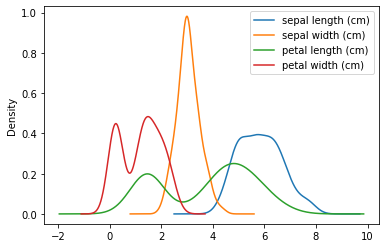

In [ ]:
iris_df.plot(kind='kde');

##### seaborn


##### t-SNE (t-Stochastic Neightbor Embedding)

**유용한 자료**
- [Why You Are Using t-SNE Wrong - towardsdatascience](https://towardsdatascience.com/why-you-are-using-t-sne-wrong-502412aab0c0)
- [How to Use t-SNE Effectively
](https://distill.pub/2016/misread-tsne/)

### 🔬 이상치 제거 (Remove Outlier)

> 이상치란 데이터셋 안에서 데이터들이 가지는 값의 분포에서 매우 동떨어진 값을 가지는 데이터를 말한다. 이상치가 섞여있으면 추후 학습에 영향을 주기 때문에 우리는 이 이상치가 데이타셋 속에 섞여있는지 확인해야하며 이를 제거할지 결정해야 한다.

1. 이상치 탐지 (Detect Outlier)
2. 이상치 제거 (Remove Outlier)


#### 1. 이상치 탐지 (Detect Outlier)

- IQR (Interquartile Range) 활용
- Isolation forest

**참고자료**
- [Novelty and Outlier Detection - sklearn 공식문서](https://scikit-learn.org/stable/modules/outlier_detection.html)


##### IQR (Interquartile Range) 활용

- $Q_1 - 1.5\ \mathbf{IQR}\ \sim\ Q_3 + 1.5\ \mathbf{IQR}$ 사이의 값을 벗어나는 모든 값을 이상치라고 가정하는 방법이다
- [pandas.DataFrame.boxplot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) - 이상치를 시각적으로 쉽게 확인할 수 있다.
- [seaborn.boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html) - 더욱 예쁜 그래프를 그릴 수 있다

`sepal width (cm)`에서 위 아래로 나타는 동그라미가 바로 이상치 값을 나타낸다

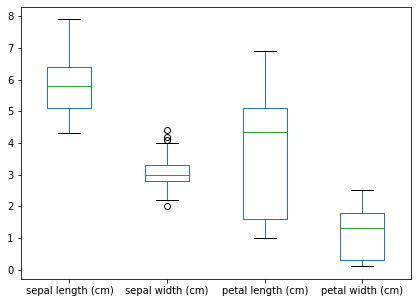

In [ ]:
# pandas는 바로 boxplot을 그릴 수 있는 기능을 지원한다
iris_df.boxplot(figsize=(7, 5), grid=False);

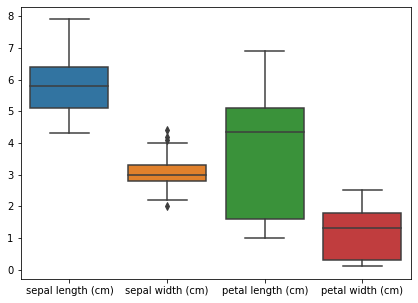

In [ ]:
# seaborn을 이용해 더욱 예쁘게 그래프를 그려보자
plt.figure(figsize=(7, 5))
sns.boxplot(data=iris_df);

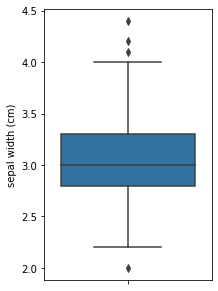

In [ ]:
# 이상치 값이 있는 단일 특징만을 볼 수도 있다
plt.figure(figsize=(3, 5))
sns.boxplot(y=iris_df['sepal width (cm)']);

##### Isolation forest
- [sklearn.ensemble.IsolationForest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html)

#### 2. 이상체 제거 (Remove Outlier)

> 이상치라고 해서 무조건 제거하면 안된다. 우리는 이 이상치가 단순한 오류인지 아닌지 분석 후에 만약 이상치가 오류가 아니라면 이를 제거할지 아니면 남겨둘지 프로젝트에 따라 기준을 세워 결정하여야 한다.

**이상치 발생 요인들**
1. 데이터셋 제작자의 실수
2. 관측 센서 오작동
3. 데이터의 진짜 특징


- IQR (Interquartile Range) 활용

##### IQR (Interquartile Range) 활용

In [ ]:
Q1 = iris_df['sepal width (cm)'].quantile(0.25)
Q3 = iris_df['sepal width (cm)'].quantile(0.75)

# IQR 계산하기
IQR = Q3 - Q1

# 이상치 경계선 계산
low_bound = Q1 - 1.5 * IQR 
upper_bound = Q3 + 1.5 * IQR

low_outlier = iris_df['sepal width (cm)'] <= low_bound
upper_outlier = iris_df['sepal width (cm)'] >= upper_bound

outlier = low_outlier | upper_outlier

# 이상치 표시
iris_df.loc[outlier]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa
60,5.0,2.0,3.5,1.0,Iris-versicolor


### 🔬 결측치 채워넣기 (Fill Missing Value)

> 결측치란 말 그대로 데이터가 비어있는 것을 말한다. 데이터가 비어있으면 모델이 학습을 할 수 없기 때문에 우리는 이 결측치에 값을 대체하여 채우거나 아예 제거하여야 한다.

1. 결측치 탐지
2. 결측치 대체하기 (Imputation)
3. 결측치 삭제하기 (Deletion)

**결측치 종류**
- MCAR (Missing completely at random)
- MAR (Missing at random)
- MNAR (Missing not at random)

**유용한 자료**
- [Missing data - wikipedia](https://en.wikipedia.org/wiki/Missing_data)
- [Imputation of missing values - sklearn 공식문서](https://scikit-learn.org/stable/modules/impute.html)

In [ ]:
# 결측치가 있는 iris 데이터셋을 만들 것이기 때문에 copy()를 통해 새로운 df를 만든다
iris_na_df = iris_df.copy()

# 현재 iris 데이터셋에서는 결측치가 없기 때문에 의도적으로 몇개의 결측치를 만들자
na_indices = [1, 5, 30, 52, 102]
iris_na_df.loc[na_indices, 'sepal length (cm)'] = np.nan

#### 1. 결측치 탐지

> 결측치를 찾아내는데 유용한 라이브러리 및 기능들을 소개한다

- [pandas.isnull](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html)
- [pandas.DataFrame.info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html)
- [missingno](https://github.com/ResidentMario/missingno)

##### pandas.isnull

> 결측치를 탐지해서 bool값으로 결과를 돌려준다

탐지하는 null 종류
- None
- pd.NA
- np.nan

In [ ]:
pd.isnull(iris_df).sample(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
64,False,False,False,False,False
21,False,False,False,False,False
9,False,False,False,False,False


In [ ]:
# pandas.DataFrame에서 바로 적용할 수도 있다
iris_df.isnull().sample(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
149,False,False,False,False,False
141,False,False,False,False,False
12,False,False,False,False,False


##### pandas.DataFrame.info

- `Non-Null Count`를 통해 결측치가 존재하는지를 빠르게 파악할 수 있다
- `pd.options.display.max_info_rows`에 지정된 행의 수를 초과하면 `Non-Null Count`가 표시되지 않는다. 이때는 직접 이 값을 수정해주면 된다.

In [ ]:
# 여기에 표시되는 값보다 행의 수가 많아지면 info()는 Non-Null Count를 표시하지 않는다
pd.options.display.max_info_rows

1690785

In [ ]:
# sepal length 쪽에 5개의 결측치가 있음을 손쉽게 확인할 수 있다
iris_na_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  145 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


##### missingno

> 한눈에 결측치를 쉽게 표시하는 시각화 라이브러리다

- matrix
- bar

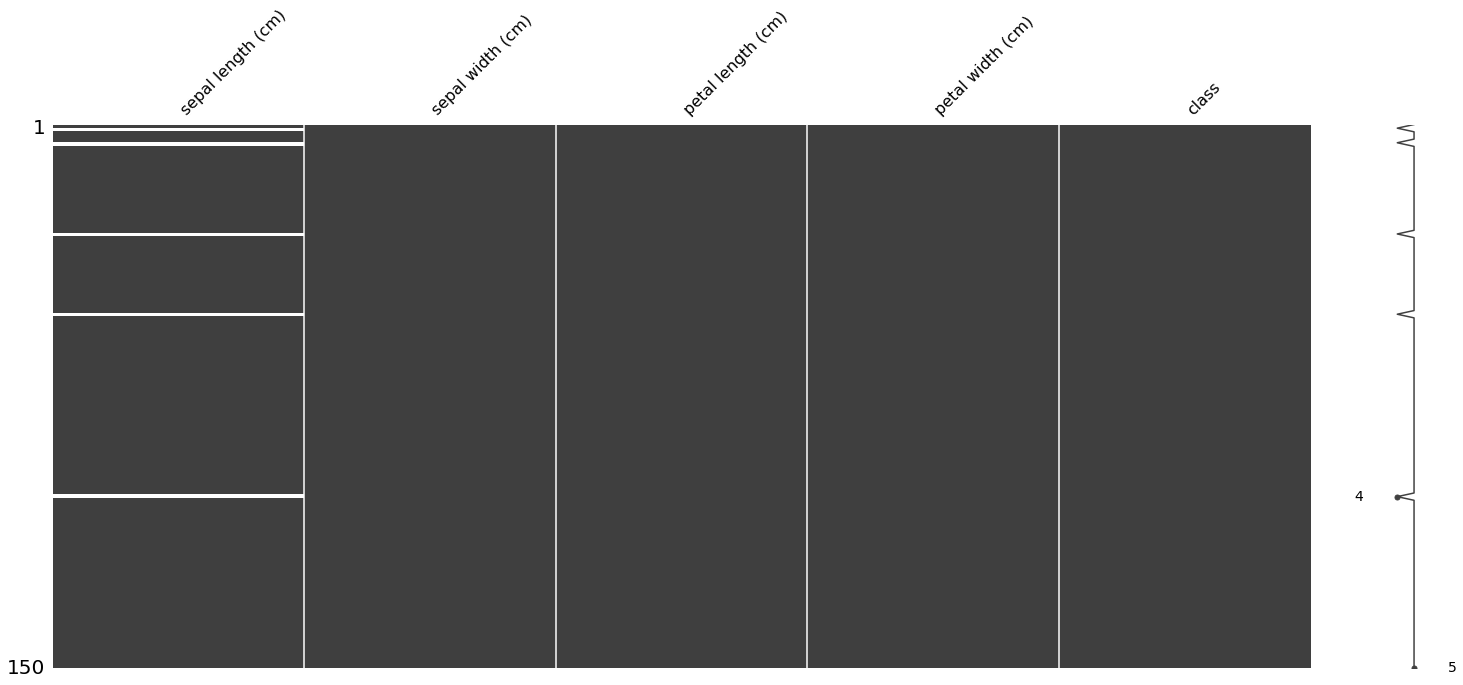

In [ ]:
# 결측치가 있는 부분은 흰색 선으로 표시된다
# 우측의 선 그래프는 데이터의 완성도를 표시하며 각 행의 최대 / 최소 결측치 갯수를 표시해준다
missingno.matrix(iris_na_df);

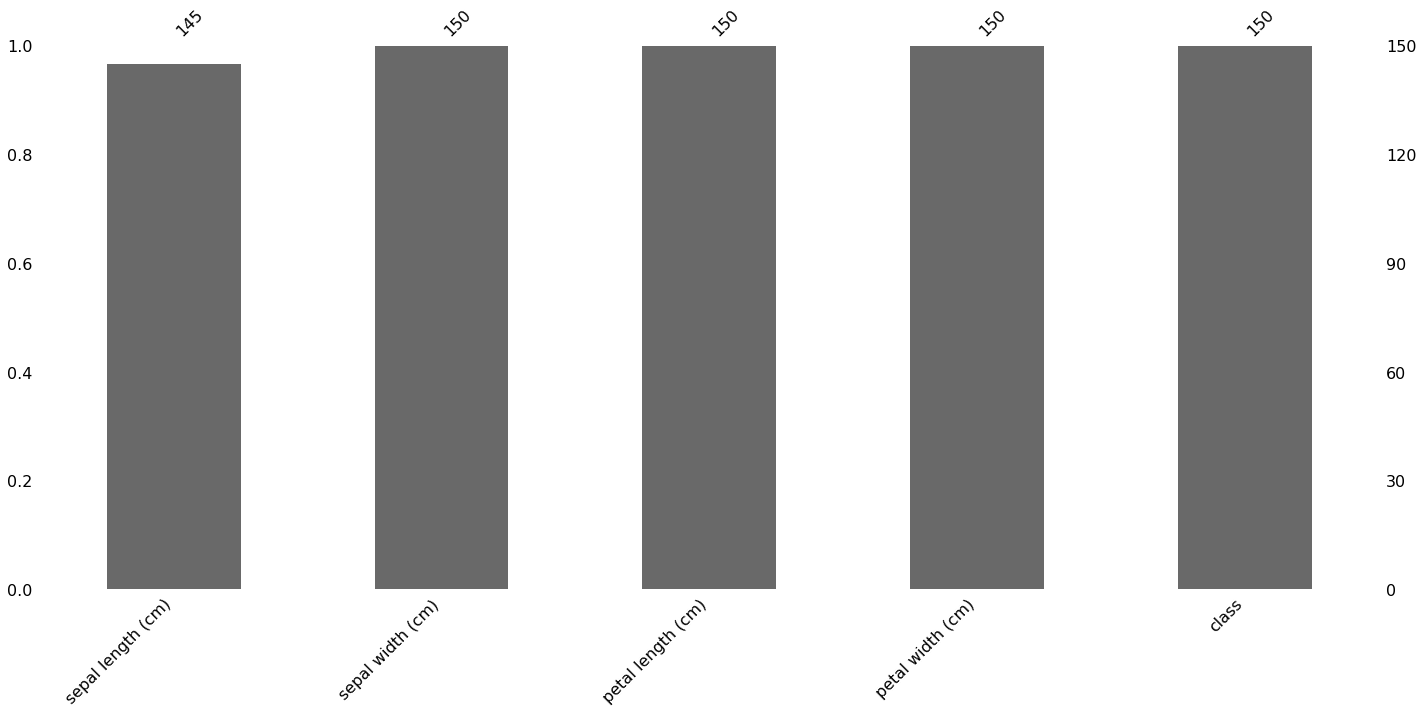

In [ ]:
missingno.bar(iris_na_df);

#### 2. 결측치 대체하기 (Imputation)

> 결측치에 대체할 값을 정하는 몇 가지 방법들을 소개한다. 우리는 결측치를 정확히 알 수 없으므로 추측을 통해서 대체 값을 찾아야 하며 이를 위해 통계값을 이용하거나 머신러닝 알고리즘을 활용할 수도 있다.

- 평균 / 중간값 / 최빈값
- 보간 (interpolate)
- 회귀 (regression)
- KNN

##### 평균 / 중간값 / 최빈값

> 직관적인 방법이며 자주 활용된다. 결측치가 존재하는 feature의 나머지 값들의 통계값으로 결측치를 대체하는 방법이다. 

- [pandas.DataFrame.fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)
- [sklearn.impute.SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer)
- **최빈값**의 경우 연속형 feature에서는 활용을 추천하지 않는다. 대부분의 값들이 고유하게 존재하므로 각 값들의 출현 빈도가 모두 1이 나올 확률이 높아 최빈값을 구하기가 힘들다

In [ ]:
# 평균 (mean) / 중간값 (median) / 최빈값(mode)
mean = iris_df['sepal length (cm)'].mean()
median = iris_df['sepal length (cm)'].median()
mode = iris_df['sepal length (cm)'].mode()

print(f'mean : {mean}, median : {median}, mode : {mode.values[0]}')

# 평균값으로 결측치 채우기
iris_na_df['sepal length (cm)'].fillna(mean)[na_indices]

mean : 5.843333333333335, median : 5.8, mode : 5.0


1      5.843333
5      5.843333
30     5.843333
52     5.843333
102    5.843333
Name: sepal length (cm), dtype: float64

In [ ]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

# SimpleImputer는 numpy를 이용하므로 df를 numpy로 변환한다
null_feature = iris_na_df['sepal length (cm)'].values.reshape(-1, 1)

imp_mean.fit(null_feature)
imp_mean.transform(null_feature)[na_indices]

array([[5.84413793],
       [5.84413793],
       [5.84413793],
       [5.84413793],
       [5.84413793]])

##### 보간 (interpolate)

> 결측치의 위, 아래 값을 고려하여 결측치에 들어갈 값을 정하는 방법이며 다양한 방법론이 존재한다

- [pandas.DataFrame.interpolate](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html)

In [ ]:
# reference - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html
s = pd.Series([0, 1, np.nan, 3])
s.interpolate()

0    0.0
1    1.0
2    2.0
3    3.0
dtype: float64

In [ ]:
s = pd.Series([np.nan, "single_one", np.nan,
               "fill_two_more", np.nan, np.nan, np.nan,
               4.71, np.nan])

# pad 방법을 사용하지만 2번까지만 채워넣는다
s.interpolate(method='pad', limit=2)

0              NaN
1       single_one
2       single_one
3    fill_two_more
4    fill_two_more
5    fill_two_more
6              NaN
7             4.71
8             4.71
dtype: object

In [ ]:
df = pd.DataFrame([(0.0, np.nan, -1.0, 1.0),
                   (np.nan, 2.0, np.nan, np.nan),
                   (2.0, 3.0, np.nan, 9.0),
                   (np.nan, 4.0, -4.0, 16.0)],
                  columns=list('abcd'))
df.interpolate(method='linear', limit_direction='forward', axis=0)

,a,b,c,d
0,0.0,NaN,-1.0,1.0
1,1.0,2.0,-2.0,5.0
2,2.0,3.0,-3.0,9.0
3,2.0,4.0,-4.0,16.0


##### 회귀 (regression)

> 만약 결측치가 존재하는 feature와 다른 feature들 사이에 상관관계가 존재한다면 우리는 회귀 알고리즘을 활용하여서 결측치 값을 예측해볼 수 있다

- [pandas.DataFrame.corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) - 상관관계 분석
- [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear%20regression#sklearn.linear_model.LinearRegression) - 연속형 feature 결측치 예측
- [sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) - 범주형 feature 결측치 예측

In [ ]:
# 상관관계 분석
iris_na_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.114490,0.868924,0.813749
sepal width (cm),-0.114490,1.000000,-0.428440,-0.366126
petal length (cm),0.868924,-0.428440,1.000000,0.962865
petal width (cm),0.813749,-0.366126,0.962865,1.000000


결측치가 존재하는 feature가 `꽃받침 길이 (sepal length)`이며 다른 feature `꽃잎 길이 (petal length)`, `꽃잎 폭 (petal width)`와 **강한 상관관계(0.7 이상)**가 존재함을 알 수 있다. 

이를 바탕으로 회귀를 할 수 있음을 알 수 있으며, `꽃받침 길이 (sepal length)`가 **연속형 feature**이므로 **선형 회귀 (linear regression)**을 사용할 수 있다.

- [상관관계와 선형회귀](https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_correlation-regression/bs704_correlation-regression_print.html)

In [ ]:
# sepal length (cm)의 null / non null index
null = iris_na_df['sepal length (cm)'].isnull()
not_null = ~iris_na_df['sepal length (cm)'].isnull()

# not null
x_df = iris_na_df[['sepal width (cm)', 'petal length (cm)', 'petal width (cm)']][not_null]
y_df = iris_na_df[['sepal length (cm)']][not_null]

# null
x_null_df = iris_na_df[['sepal width (cm)', 'petal length (cm)', 'petal width (cm)']][null]

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(x_df, y_df)

# 결측치 예측
y_predict = model.predict(x_null_df)

결측치에 원래 들어있던 값과 비교하여 어느정도 차이가 있는지 확인해보자

In [ ]:
pd.DataFrame({'original': iris_df.iloc[na_indices]['sepal length (cm)'],
              'predict': y_predict.reshape(-1)})

,original,predict
1,4.9,4.689357
5,5.4,5.372545
30,4.8,4.894471
52,6.9,6.503659
102,7.1,6.814286


##### KNN
- [sklearn.neighbors.KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) - 연속형 feature 결측치 예측
- [sklearn.neighbors.KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) - 범주형 feature 결측치 예측

In [ ]:
# sepal length (cm)의 null / non null index
null = iris_na_df['sepal length (cm)'].isnull()
not_null = ~iris_na_df['sepal length (cm)'].isnull()

# not null
x_df = iris_na_df[['sepal width (cm)', 'petal length (cm)', 'petal width (cm)']][not_null]
y_df = iris_na_df[['sepal length (cm)']][not_null]

# null
x_null_df = iris_na_df[['sepal width (cm)', 'petal length (cm)', 'petal width (cm)']][null]

In [ ]:
# sepal length (cm)은 연속형 feature이므로 KNN 회귀 사용
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor().fit(x_df, y_df)

# 결측치 예측
y_predict = model.predict(x_null_df)

결측치에 원래 들어있던 값과 비교하여 어느정도 차이가 있는지 확인해보자

In [ ]:
pd.DataFrame({'original': iris_df.iloc[na_indices]['sepal length (cm)'],
              'predict': y_predict.reshape(-1)})

,original,predict
1,4.9,4.60
5,5.4,5.22
30,4.8,4.82
52,6.9,6.56
102,7.1,7.06


#### 3. 결측치 삭제하기 (Deletion)

> 결측치를 채우지 않고 삭제하는 방법이다. 편의를 위해 데이터가 pandas DataFrame이라고 가정한다.

- 목록 삭제 (listwise)
- 단일값 삭제 (pairwise)

##### 목록 삭제 (listwise)

> DataFrame의 어떤 행에 하나의 결측치라도 존재하면 그 행을 삭제하는 방법이다

- [pandas.DataFrame.dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)

```python
df.dropna()
```

In [ ]:
# 행 삭제 - 결측치 값이 존재하던 해당 행들이 전부 삭제된 것을 볼 수 있다
iris_na_df.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  145 non-null    float64
 1   sepal width (cm)   145 non-null    float64
 2   petal length (cm)  145 non-null    float64
 3   petal width (cm)   145 non-null    float64
 4   class              145 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


##### 단일값 삭제 (pairwise)

> 우리가 분석에 사용하고자 하는 feature들에 한정하여 결측치가 존재하는 행을 삭제하는 방법이다. 어떤 feature들을 분석에 사용하느냐에 따라 삭제하는 행이 달라질 수 있다

- [pandas.DataFrame.dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)

```python
df.dropna(subset=[FEATURES])
```

In [ ]:
# 결측치가 없는 feature들만을 선택할 경우 삭제되는 행이 없다
iris_na_df.dropna(subset=['sepal width (cm)', 'petal length (cm)', 'petal width (cm)']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  145 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [ ]:
# 결측치가 존재하는 feature가 포함된 경우 결측치가 포함된 행은 모두 삭제된다
# sepal length (cm) - 결측치가 존재하는 feature
iris_na_df.dropna(subset=['sepal length (cm)', 'petal length (cm)', 'petal width (cm)']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  145 non-null    float64
 1   sepal width (cm)   145 non-null    float64
 2   petal length (cm)  145 non-null    float64
 3   petal width (cm)   145 non-null    float64
 4   class              145 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


### 🔬 트랜스폼 (Transform)

> 데이터의 분포를 변화시키는 것을 트랜스폼이라고 한다. 스케일링이 분포 변화 없이 분포의 스케일만 변화시키는 것과 다르게 트랜스폼은 분포 자체를 변화시킨다. 트랜스폼은 모델이 데이터 사이의 패턴을 더욱 쉽게 파악할 수 있도록 도와준다.

- 트랜스폼 (Transform) - 분포 변화 ✔️
- 스케일링 (Scaling) - 분포 변화 ❌

1. 로그 (log)
2. 사분위수 (quantile)

**유용한 자료**
- [Effect of transforming the targets in regression model - sklearn 공식문서](https://scikit-learn.org/stable/auto_examples/compose/plot_transformed_target.html)

#### 로그 (log)

> 확률 분포를 로그 스케일로 변환하는 것으로 변환을 하고 싶은 feature에 로그를 취해주면 된다. 

iris 데이터셋에는 skewed 분포의 feature가 없기 때문에, sklearn의 `make_regression`을 이용해 데이터셋을 생성한다.

- [sklearn.datasets.make_regression](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression)
- [numpy.expm1](https://numpy.org/doc/stable/reference/generated/numpy.expm1.html) - `exp(x) - 1`
- [scipy.stats.skew](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html)

**유용한 자료**
- [In linear regression, when is it appropriate to use the log of an independent variable instead of the actual values? - StackExchange](https://stats.stackexchange.com/questions/298/in-linear-regression-when-is-it-appropriate-to-use-the-log-of-an-independent-va)

In [ ]:
# reference - https://scikit-learn.org/stable/auto_examples/compose/plot_transformed_target.html
from sklearn.datasets import make_regression


# 데이터 생성 
X, y = make_regression(n_samples=10000, noise=100, random_state=0)
y = np.expm1((y + abs(y.min())) / 200)
y_trans = np.log1p(y)

In [ ]:
# 왜도 (skew) 측정
from scipy.stats import skew

print(f"skewed 분포의 skew : {skew(y)}, 정규분포의 skew : {skew(y_trans)}")

skewed 분포의 skew : 9.500802276118153, 정규분포의 skew : 0.005374997999869413


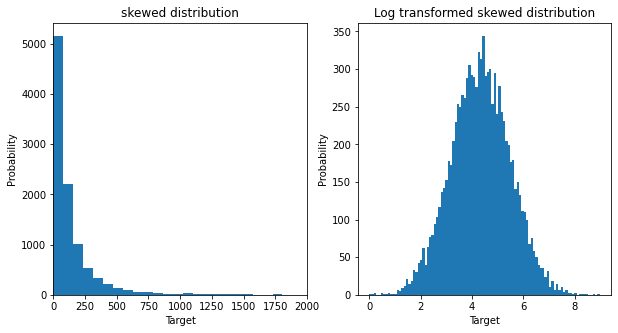

In [ ]:
# 그래프 그리기
fig = plt.figure(figsize=(10, 5))

fig.add_subplot(1, 2, 1)
plt.hist(y, bins=100)
plt.xlim([0, 2000])
plt.ylabel('Probability')
plt.xlabel('Target')
plt.title('skewed distribution')

fig.add_subplot(1, 2, 2)
plt.hist(y_trans, bins=100)
plt.ylabel('Probability')
plt.xlabel('Target')
plt.title('Log transformed skewed distribution');

#### 사분위수 (quantile)

> 주어진 확률분포를 다른 확률분포로 변환하는 것이 quantile 트랜스폼이다.

- 균일 (uniform)
- 정규 (normal)

⛔ **quantile transform** 사용 주의 사항
- [Warning - sklearn 공식문서](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.quantile_transform.html)
- Train / Test 셋으로 데이터를 나누기 전에 적용하면 Data leak가 일어난다. 그렇기 때문에 변환은 데이터를 나눈 이후에 적용해야 한다.

**유용한 자료**
- [How to Use Quantile Transforms for Machine Learning - Machine Learning Mastery](https://machinelearningmastery.com/quantile-transforms-for-machine-learning/)

##### 균일 (uniform)

> 확률 분포를 0과 1사이의 값을 가지는 균일 분포로 변환한다

- [sklearn.preprocessing.QuantileTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html#sklearn.preprocessing.QuantileTransformer)

```python
QuantileTransformer(output_distribution='uniform')
```

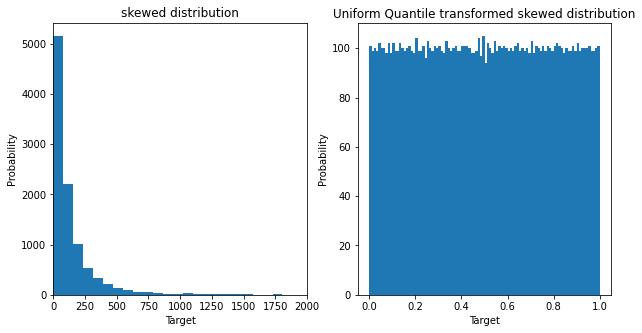

In [ ]:
from sklearn.preprocessing import QuantileTransformer

# log에서 제작한 데이터셋을 그대로 사용한다
# 변환은 uniform으로 진행한다
y_trans = QuantileTransformer(output_distribution='uniform').fit_transform(y.reshape(-1, 1))


# 그래프 그리기
fig = plt.figure(figsize=(10, 5))

fig.add_subplot(1, 2, 1)
plt.hist(y, bins=100)
plt.xlim([0, 2000])
plt.ylabel('Probability')
plt.xlabel('Target')
plt.title('skewed distribution')

fig.add_subplot(1, 2, 2)
plt.hist(y_trans, bins=100)
plt.ylabel('Probability')
plt.xlabel('Target')
plt.title('Uniform Quantile transformed skewed distribution');

##### 정규 (normal)

> 확률 분포를 정규 분포로 변환한다

- [sklearn.preprocessing.QuantileTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html#sklearn.preprocessing.QuantileTransformer)

```python
QuantileTransformer(output_distribution='normal')
```

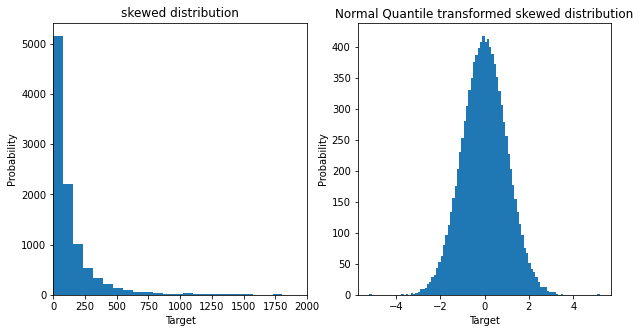

In [ ]:
from sklearn.preprocessing import QuantileTransformer

# log에서 제작한 데이터셋을 그대로 사용한다
# 변환은 normal으로 진행한다
y_trans = QuantileTransformer(output_distribution='normal').fit_transform(y.reshape(-1, 1))


# 그래프 그리기
fig = plt.figure(figsize=(10, 5))

fig.add_subplot(1, 2, 1)
plt.hist(y, bins=100)
plt.xlim([0, 2000])
plt.ylabel('Probability')
plt.xlabel('Target')
plt.title('skewed distribution')

fig.add_subplot(1, 2, 2)
plt.hist(y_trans, bins=100)
plt.ylabel('Probability')
plt.xlabel('Target')
plt.title('Normal Quantile transformed skewed distribution');


### 🔬 스케일링 (Scaling)

> 데이터 분포의 범위를 조절해준다. 회귀나 딥러닝에서 스케일링은 매우 중요한 비중을 차지하며 feature간 값의 범위가 매우 상이할 때 스케일링이 이뤄지지 않는 경우 학습이 불안정해질 수 있다.

1. sklearn 라이브러리 사용하기

**유용한 자료**
- [Feature scaling - wikipedia](https://en.wikipedia.org/wiki/Feature_scaling)
- [Feature Scaling - Why it is required? - Medium](https://medium.com/@rahul77349/feature-scaling-why-it-is-required-8a93df1af310)
- [Feature scaling (normalization) in multiple regression analysis with normal equation method? - stackoverflow](https://stackoverflow.com/questions/34148912/feature-scaling-normalization-in-multiple-regression-analysis-with-normal-equa)
- [조건수 (condition number) - wikipedia](https://ko.wikipedia.org/wiki/%EC%A1%B0%EA%B1%B4%EC%88%98)
- [Compare the effect of different scalers on data with outliers - sklearn 공식문서](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py)

#### 1. sklearn 라이브러리 사용하기

> sklearn은 다양한 종류의 스케일링 기능들을 제공한다.

- [sklearn.preprocessing.MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler)
- [sklearn.preprocessing.MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html#sklearn.preprocessing.MaxAbsScaler)
- [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
- [sklearn.preprocessing.RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler)
- [sklearn.preprocessing.Normalizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html#sklearn.preprocessing.Normalizer)

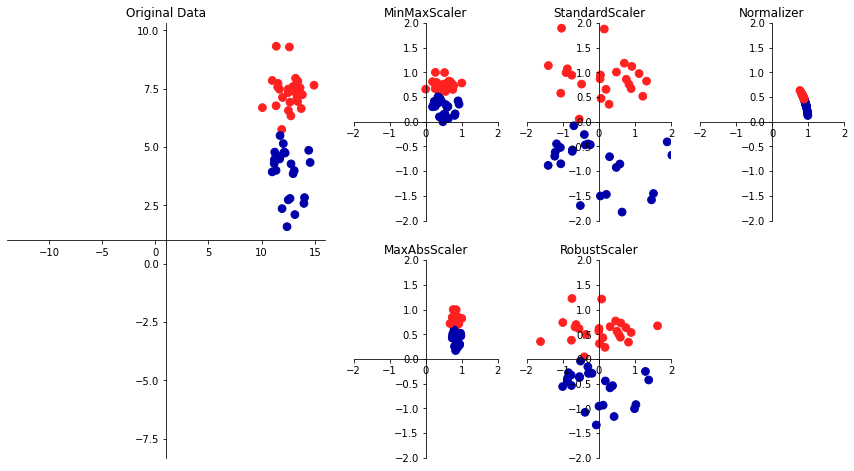

In [ ]:
#@title ##### **스케일링(Scaling) 시각화 비교**
# reference - https://github.com/amueller/mglearn/blob/106cf48ef03710ef1402813997746741aa6467da/mglearn/plot_scaling.py#L9

from matplotlib.colors import ListedColormap
from sklearn.datasets import make_blobs
from sklearn.preprocessing import (StandardScaler, MinMaxScaler, Normalizer,
                                   RobustScaler, MaxAbsScaler)

cm2 = ListedColormap(['#0000aa', '#ff2020'])

def plot_scaling():
    X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
    X += 3

    plt.figure(figsize=(15, 8))
    main_ax = plt.subplot2grid((2, 5), (0, 0), rowspan=3, colspan=2)

    main_ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm2, s=60)
    maxx = np.abs(X[:, 0]).max()
    maxy = np.abs(X[:, 1]).max()

    main_ax.set_xlim(-maxx + 1, maxx + 1)
    main_ax.set_ylim(-maxy + 1, maxy + 1)
    main_ax.set_title("Original Data")
    other_axes = [plt.subplot2grid((2, 5), (i, j))
                  for j in range(2, 5) for i in range(2)]

    # 마지막 axes 비우기
    other_axes[-1].axis('off')

    for ax, scaler in zip(other_axes, [MinMaxScaler(),
                                       MaxAbsScaler(),
                                       StandardScaler(),
                                       RobustScaler(),
                                       Normalizer(norm='l2')]):
        X_ = scaler.fit_transform(X)
        ax.scatter(X_[:, 0], X_[:, 1], c=y, cmap=cm2, s=60)
        ax.set_xlim(-2, 2)
        ax.set_ylim(-2, 2)
        ax.set_title(type(scaler).__name__)

    other_axes.append(main_ax)

    for ax in other_axes:
        ax.spines['left'].set_position('center')
        ax.spines['right'].set_color('none')
        ax.spines['bottom'].set_position('center')
        ax.spines['top'].set_color('none')
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')

plot_scaling()

##### Min Max Scalar

> feature의 값이 0과 1 사이에 위치하도록 스케일링

In [ ]:
# reference - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

X = [[4, -1, 2, 2],
     [1, 3, 9, -3],
     [5, 7, -5, 1],
     [20, 5, 2, 1],
     [1, 1, 1, 100]]

scaler = MinMaxScaler().fit(X)
scaler.transform(X)

array([[0.15789474, 0.        , 0.5       , 0.04854369],
       [0.        , 0.5       , 1.        , 0.        ],
       [0.21052632, 1.        , 0.        , 0.03883495],
       [1.        , 0.75      , 0.5       , 0.03883495],
       [0.        , 0.25      , 0.42857143, 1.        ]])

##### Max Abs Scalar

> feature의 최대값이 1이 되도록 스케일링

In [ ]:
from sklearn.preprocessing import MaxAbsScaler

X = [[4, -1, 2, 2],
     [1, 3, 9, -3],
     [5, 7, -5, 1],
     [20, 5, 2, 1],
     [1, 1, 1, 100]]

scaler = MaxAbsScaler().fit(X)
scaler.transform(X)

array([[ 0.2       , -0.14285714,  0.22222222,  0.02      ],
       [ 0.05      ,  0.42857143,  1.        , -0.03      ],
       [ 0.25      ,  1.        , -0.55555556,  0.01      ],
       [ 1.        ,  0.71428571,  0.22222222,  0.01      ],
       [ 0.05      ,  0.14285714,  0.11111111,  1.        ]])

##### Standard Scalar

> feature를 정규화한다.

$\Large z = \frac{(x\ -\ \mu)}{\sigma}$
- $\mu$ : 평균 (mean)
- $\sigma$ : 표준편차 (standard deviation)

In [ ]:
from sklearn.preprocessing import StandardScaler

X = [[4, -1, 2, 2],
     [1, 3, 9, -3],
     [5, 7, -5, 1],
     [20, 5, 2, 1],
     [1, 1, 1, 100]]

scaler = StandardScaler().fit(X)
scaler.transform(X)

array([[-0.31063037, -1.41421356,  0.04499213, -0.45571832],
       [-0.73421724,  0.        ,  1.61971657, -0.58091566],
       [-0.16943475,  1.41421356, -1.52973232, -0.48075779],
       [ 1.94849961,  0.70710678,  0.04499213, -0.48075779],
       [-0.73421724, -0.70710678, -0.17996851,  1.99814957]])

##### Robust Scalar

> Standard Scalar과 비슷한 방식으로 동작히며 중간값(median)과 IQR(Interquartile Range)을 사용하여 스케일링하기 때문에 이상치(outlier)에 영향을 덜 받는다(robust).

- `Standard Scalar` : 평균(mean)과 표준편차(standard deviation)을 사용
- `Robust Scalar` : 중간값(median)과 IQR(Interquartile Range)를 사용

In [ ]:
from sklearn.preprocessing import RobustScaler

X = [[4, -1, 2, 2],
     [1, 3, 9, -3],
     [5, 7, -5, 1],
     [20, 5, 2, 1],
     [1, 1, 1, 100]]

scaler = RobustScaler().fit(X)
scaler.transform(X)

array([[ 0.  , -1.  ,  0.  ,  1.  ],
       [-0.75,  0.  ,  7.  , -4.  ],
       [ 0.25,  1.  , -7.  ,  0.  ],
       [ 4.  ,  0.5 ,  0.  ,  0.  ],
       [-0.75, -0.5 , -1.  , 99.  ]])

##### Normalizer

> 위의 스케일링 기법들과 다르게 각각의 **feature에 개별로 적용되는 것이 아니라** 모든 **특징 벡터(feature vector)들에게 개별적으로 적용**된다. pandas DataFrame 기준으로 설명하면 열에 적용되던 스케일링 기법이 행에 적용되는 셈이다. **특징 벡터(feature vector)**의 norm이 모두 1이 되도록 스케일링하며 **특징 벡터(feature vector)**의 길이는 신경쓰지 않고 방향 혹은 각도가 중요할 때 사용된다.

In [ ]:
from sklearn.preprocessing import Normalizer

X = [[4, -1, 2, 2],
     [1, 3, 9, -3],
     [5, 7, -5, 1],
     [20, 5, 2, 1],
     [1, 1, 1, 100]]

scaler = Normalizer().fit(X)
scaler.transform(X)

array([[ 0.8       , -0.2       ,  0.4       ,  0.4       ],
       [ 0.1       ,  0.3       ,  0.9       , -0.3       ],
       [ 0.5       ,  0.7       , -0.5       ,  0.1       ],
       [ 0.96448564,  0.24112141,  0.09644856,  0.04822428],
       [ 0.0099985 ,  0.0099985 ,  0.0099985 ,  0.99985003]])

## 🧪 인코딩 (Encoding)
- 순서 인코딩 (Ordinal Encoding)
- 라벨 인코딩 (Label Encoding)
- 원핫 인코딩 (One Hot Encoding)
- 타겟 인코딩 (Target Encoding)

**인코딩(Encoding)은 feature가 범주형(Category)일 때 적용하며 범주형을 수치형으로 변환하는 것을 말한다**
> 우리는 **데이터셋 이해하기**에서 각 feature가 범주형인지 수치형인지 알아보았다. iris 데이터셋의 경우는 모든 feature가 연속형이었지만, 대부분의 데이터셋은 범주형 feature를 포함하고 있다.

- 인코딩(Encoding)은 중요한 요소는 아니다. 인코딩(Encoding)에서는 성능 차이가 많이 나지는 않는다. 만약 사용하는 모델이 트리(Tree) 모델이면 더욱 상관없으며 순서 인코딩(Ordinal Encoding)만 해도 충분하다. 다만 인코딩 하는 feature의 cardinality가 커질경우 인코딩에 따라 트리(Tree)모델에서의 성능 차이가 많이 벌어지므로 신중히 선택하여야 한다.

⭐ **인코딩 종류의 다양성** ⭐
> 실전에서 가장 자주 사용되는 인코딩(Encoding) 방법들을 소개하였지만 실제 인코딩 방법은 더 다양하다. 관심이 있다면 **유용한 자료**의 첫 번째 글 혹은 `category_encoders` 라이브러리의 공식 문서를 참조하자
- [Category Encoders 공식문서](https://contrib.scikit-learn.org/category_encoders/#)

**유용한 자료**
- [All about Categorical Variable Encoding - towardsdatascience](https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02)
- [Why decision tree needs categorical variable to be encoded? - StackExchange](https://datascience.stackexchange.com/questions/52066/why-decision-tree-needs-categorical-variable-to-be-encoded)
- [One-Hot Encoding is making your Tree-Based Ensembles worse, here’s why? - towardsdatascience](https://towardsdatascience.com/one-hot-encoding-is-making-your-tree-based-ensembles-worse-heres-why-d64b282b5769)
- [Visiting: Categorical Features and Encoding in Decision Trees - Medium](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)

In [ ]:
# 실습을 위한 범주형 데이터
duck_df = pd.DataFrame({'type': ['goose', 'duck', 'goose', 'duck', 'duck', 'duck'],
                        'color': ['red', 'green', 'blue', 'green', 'green', 'red'],
                        'smartness': ['A', 'C', 'B', 'C', 'A', 'A']})
duck_df

,type,color,smartness
0,goose,red,A
1,duck,green,C
2,goose,blue,B
3,duck,green,C
4,duck,green,A
5,duck,red,A



### ⚗️ 순서 인코딩 (Ordinal Encoding)

> 인코딩하는 feature의 카테고리들을 나타나는 순서대로 0부터 시작하는 숫자 정수로 인코딩한다. 각 카테고리에 인코딩할 숫자는 직접 지정할 수 있다. 순서를 가진 숫자로 인코딩되는 만큼 각 카테고리 간에 연관되므로 순서형(Oridinal)일 경우 사용해야 한다. 

- 다수의 feature들을 한번에 인코딩 할 수 있다.
- 트리(Tree) 모델의 경우에는 명목형(Nominal)인 경우에도 사용할 수 있다.

1. 카테고리의 순서를 지정하지 않을 경우
2. 카테고리의 순서를 지정할 경우

- [sklearn.preprocessing.OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html)
    

#### 1. 카테고리의 순서를 지정하지 않을 경우
```python
OrdinalEncoder()
```

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

X = duck_df.smartness.values.reshape(-1, 1)
print(X)

enc = OrdinalEncoder()
enc.fit(X)
enc.transform(X)

[['A']
 ['C']
 ['B']
 ['C']
 ['A']
 ['A']]


array([[0.],
       [2.],
       [1.],
       [2.],
       [0.],
       [0.]])

In [ ]:
# 카테고리 확인
enc.categories_

[array(['A', 'B', 'C'], dtype=object)]

#### 2. 카테고리의 순서를 지정할 경우
```python
OrdinalEncoder(categories=[['C', 'B', 'A']])
```

In [ ]:
print(X)

enc = OrdinalEncoder(categories=[['C', 'B', 'A']])
enc.fit(X)
enc.transform(X)

[['A']
 ['C']
 ['B']
 ['C']
 ['A']
 ['A']]


array([[2.],
       [0.],
       [1.],
       [0.],
       [2.],
       [2.]])

In [ ]:
# 카테고리 확인
enc.categories_

[array(['C', 'B', 'A'], dtype=object)]


### ⚗️ 라벨 인코딩 (Label Encoding)

> 순서 인코딩 (Ordinal Encoding)과 방식은 동일하지만 한개의 feature에만 적용 가능하며 target(Y)에 적용할 목적을 가지고 있다.

- `순서 인코딩 (Ordinal Encoding)`
    - input(X)에 적용
    - 다수의 feature들을 동시에 인코딩
    - 순서 지정 가능
- `라벨 인코딩 (Label Encoding)`
    - target(Y)에 적용
    - 한개의 feature만 인코딩
    - 순서 지정 불가능

⛔ input(X)의 feature 각각을 순서 지정 없이 인코딩 할 경우 라벨 인코딩(Label Encoding)을 사용해도 무방하나 sklearn은 target(Y)이 아닌 input(X)에 적용하는 것을 권장하지 않는다.

- [sklearn.preprocessing.LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder)

In [ ]:
from sklearn.preprocessing import LabelEncoder

X = duck_df.type
print(X)

enc = LabelEncoder()
enc.fit(X)
enc.transform(X)

0    goose
1     duck
2    goose
3     duck
4     duck
5     duck
Name: type, dtype: object


array([1, 0, 1, 0, 0, 0])

### ⚗️ 원핫 인코딩 (One Hot Encoding)

> feature의 카테고리를 0과 1로 이루어진 벡터로 인코딩한다. 이 벡터의 길이는 카테고리 수이다.

- [sklearn.preprocessing.OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

X = duck_df.smartness.values.reshape(-1, 1)
print(X)

enc = OneHotEncoder()
enc.fit(X)
enc.transform(X).toarray()

[['A']
 ['C']
 ['B']
 ['C']
 ['A']
 ['A']]


array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]])

### ⚗️ 타겟 인코딩 (Target Encoding)

> **평균 인코딩 (Mean Encoding)**이라고도 불린다. feature의 카테고리를 해당 카테고리의 target값의 평균으로 인코딩하는 방법이다. 

1. 타겟 인코딩 (Target Encoding) 사용
2. Smoothing

- [category_encoders.target_encoder.TargetEncoder](https://contrib.scikit-learn.org/category_encoders/targetencoder.html)

**유용한 자료**
- [Mean (likelihood) encodings: a comprehensive study - Kaggle](https://www.kaggle.com/vprokopev/mean-likelihood-encodings-a-comprehensive-study)

#### 1. 타겟 인코딩 (Target Encoding) 사용

> `category_encoders` 라이브러리를 이용하여 타겟 인코딩을 해보자. `type`을 target으로 가정한다.

⛔ 주의사항 ⛔
- Train 셋에 Overfitting될 수 있다
- Train 셋과 Test 셋의 label값 분포가 상이하면 문제가 된다

In [ ]:
from category_encoders.target_encoder import TargetEncoder
from sklearn.preprocessing import LabelEncoder

# Target Encoding은 target의 값이 숫자여야 하므로 라벨 인코딩을 한다
X = duck_df[['color', 'smartness']]
y = LabelEncoder().fit_transform(duck_df[['type']].values.ravel())

duck_df['target'] = y
duck_df

,type,color,smartness,target
0,goose,red,A,1
1,duck,green,C,0
2,goose,blue,B,1
3,duck,green,C,0
4,duck,green,A,0
5,duck,red,A,0


In [ ]:
enc = TargetEncoder()
enc.fit(X, y)
enc.transform(X)

,color,smartness
0,0.455176,0.333333
1,0.039734,0.089647
2,0.333333,0.333333
3,0.039734,0.089647
4,0.039734,0.333333
5,0.455176,0.333333


#### 2. Smoothing

>  타겟 인코딩의 overfitting을 완화시키고자 각 카테고리의 target 평균값을 전체 target 평균값으로 이동시키는 방법이다.

- 인터넷 상에 알려진 smoothing
- **category_encoders** 라이브러리 smoothing


##### 인터넷 상에 알려진 smoothing

$\large \mathbb{smoothing}_c = \frac{(mean_c\ \times\ n_c\ +\ global\_mean\ \times\ \alpha)}{n_c\ +\ \alpha}$
- $mean_c$ : 카테고리 c에 속하는 target의 평균값
- $n_c$ : 카테고리 c의 행 수
- $global\_mean$ : 전체 target의 평균값
- $\alpha$ : hyperparameter로 default는 1이며 값이 커질수록 전체 target 평균에 가까워진다

**참고자료**
- [Target encoding done the right way - Blog](https://maxhalford.github.io/blog/target-encoding/)

In [ ]:
def smoothing_internet(mean_c, n_c, global_mean, alpha):
    return (mean_c*n_c + global_mean*alpha)/(n_c + alpha)

In [ ]:
# global mean
global_mean = duck_df.target.mean()

# smartness의 mean_c와 n_c
agg = duck_df.groupby('smartness')['target'].agg(['count', 'mean'])
n_c = agg['count']
mean_c = agg['mean']

print(n_c, mean_c)
print(global_mean)

smartness
A    3
B    1
C    2
Name: count, dtype: int64 smartness
A    0.333333
B    1.000000
C    0.000000
Name: mean, dtype: float64
0.3333333333333333


In [ ]:
print(smoothing_internet(mean_c, n_c, global_mean, 1))

smartness
A    0.333333
B    0.666667
C    0.111111
dtype: float64


##### **category_encoders** 라이브러리 smoothing
> 알려진 smooth하고 다르게 `category_encoders`에서 사용하는 smooth 방법은 다르다.

**참고자료**
- [target_encoder.py - Github](https://github.com/scikit-learn-contrib/category_encoders/blob/master/category_encoders/target_encoder.py)

In [ ]:
def smoothing(mean_c, n_c, global_mean, alpha):
    # default
    min_samples_leaf = 1
    
    smoove = 1 / (1 + np.exp(-(n_c - min_samples_leaf) / alpha))
    smoothing = global_mean * (1 - smoove) + mean_c * smoove
    smoothing[n_c == 1] = global_mean

    return smoothing

In [ ]:
print(smoothing(mean_c, n_c, global_mean, 1))

smartness
A    0.333333
B    0.333333
C    0.089647
dtype: float64


## ✅ 특성 선택 (Feature Selection)

- 필터 방법 (Filter Method)
- 래퍼 방법 (Wrapper Method)
- 임베디드 방법 (Embedded Method)

**특성 선택(Feature Selection)은 ML 모델이 예측하는데 가장 필요한 feature들만 선별적으로 선택한다.**
> 반대로 이야기하면 필요없거나(redundant) 무정보(non-informative)인 feature를 제거하는 것이기도 하다. 특성 공학(Feature Engineering)을 통해 추가된 무수히 많은 feature들 중 가장 유용한 feature를 선택하기 위해 자주 사용된다.

**장점**
- 차원의 저주(curse of dimensionality) 감소
- 필요없는 feature 수 감소로 인해 노이즈가 줄어들어 Overfitting 발생 가능성을 완화
- Training 시간 감소

**⭐ 특성 중요도(Feature Importance) 시각화 ⭐**
> 설명 가능한 AI(Explainable AI)의 목적으로 만들어진 `ELI5`, `SHAP`, `LIME` 등의 라이브러리에서 특성 중요도의 시각화를 제공해준다.
- [6 Python Libraries to Interpret Machine Learning Models and Build Trust - Analytics Vidhya](https://www.analyticsvidhya.com/blog/2020/03/6-python-libraries-interpret-machine-learning-models/)

**유용한 정보**
- [Feature selection - Wikipedia](https://en.wikipedia.org/wiki/Feature_selection#Conditional_mutual_information)
- [Feature selection - sklearn 공식문서](https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection)
- [The 5 Feature Selection Algorithms every Data Scientist should know - towardsdatascience](https://towardsdatascience.com/the-5-feature-selection-algorithms-every-data-scientist-need-to-know-3a6b566efd2)
- [Why, How and When to apply Feature Selection - towardsdatascience](https://towardsdatascience.com/why-how-and-when-to-apply-feature-selection-e9c69adfabf2)
- [Introduction to Feature Selection methods with an example - Analytics Vidhya](https://www.analyticsvidhya.com/blog/2016/12/introduction-to-feature-selection-methods-with-an-example-or-how-to-select-the-right-variables/)

In [ ]:
# 실습을 위한 data 폴더 경로 설정
DATA_PATH = os.path.join(PROJECT_PATH, 'data')

# 사용할 iris dataset 읽어오기 
csv_path = os.path.join(DATA_PATH, 'iris.csv')
iris_df = pd.read_csv(csv_path)


### ☑️ 필터 방법 (Filter Method)

> ML 모델을 사용하지 않고, feature간 분석을 통해서 각 feature의 중요도를 계산한다.

1. 분산 임계 (Variance Threshold)
2. 카이제곱 독립검정 (Chi-squared Test)
3. 상호 정보량 (Mutual Information)
4. 피어슨 상관계수 (Pearson Correlation Coefficient)
5. VIF (Variance Inflation Factor)

⛔ **주의사항** ⛔
- 상관관계에 기반하는 특성 선택법들은 이상치(Outlier)에 매우 민감하기 때문에 주의해서 사용한다

#### 1. 분산 임계 (Variance Threshold)

> 분산이 작은 feature는 예측에 도움이 되지 않는다는 가정 하에 분산이 특정 크기보다 작으면 feature를 제거하는 방법이다. Input(X)의 feature만을 사용하며 Target(Y)와의 관계를 전혀 고려하지 않는다.

- [sklearn.feature_selection.VarianceThreshold](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html?highlight=variance%20threshold#sklearn.feature_selection.VarianceThreshold)

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# iris input(X)
X = iris_df.iloc[:, :4]

# iris 데이터셋의 경우 threshold가 2이면 한개의 feature만 선택된다
selector = VarianceThreshold(threshold=2)
selector.fit_transform(X).shape

(150, 1)

In [ ]:
# 선택된 feature의 정보
selector.get_support()

array([False, False,  True, False])

In [ ]:
# 분산 확인
selector.variances_

array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

#### 2. 카이제곱 독립검정 (Chi-squared Test)

> input(X)의 각 feature와 target(Y)의 카이제곱 독립검정(Chi-squared Test)을 통해 X의 feature와 Y가 독립인지 상관관계를 가지는지 분석한다. X의 feature와 Y의 상관관계가 높을수록 중요한 feature로 취급한다. 

- 범주형 feature에만 적용할 수 있다
    - `sklearn`에서는 **feature의 값들이 음수가 아니면 수치형도 적용 가능하다**
<br>


- [sklearn.feature_selection.chi2](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html#sklearn.feature_selection.chi2)
- [sklearn.feature_selection.SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest)

**유용한 자료**
- [Feature selection using chi squared for continuous features - StackExchange](https://stats.stackexchange.com/questions/369945/feature-selection-using-chi-squared-for-continuous-features)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# iris input(X), target(Y)
X = iris_df.iloc[:, :4]
y = iris_df.iloc[:, 4]

selector = SelectKBest(chi2, k=2)
selector.fit_transform(X, y).shape

(150, 2)

In [ ]:
# 상호 정보량
selector.scores_

array([ 10.81782088,   3.7107283 , 116.31261309,  67.0483602 ])

In [ ]:
# 선택된 feature의 정보
selector.get_support()

array([False, False,  True,  True])

#### 3. 상호 정보량 (Mutual Information)

> input(X)의 각 feature와 target(Y)의 상호정보량을 통해 X의 feature와 Y가 독립인지 상관관계를 가지는지 분석한다. X의 feature와 Y의 상관관계가 높을수록 중요한 feature로 취급한다. 

- 선형(linear) / 비선형(non-linear) 관계에서 잘 동작한다
- 이산형 feature에만 적용할 수 있다
    - 연속형일 경우 histogram을 통해 유한개의 구간(bin)으로 나누어 상호 정보량을 추정한다.
    - `sklearn`에서는 나눌 구간을 **n_neighbors**을 통해서 정하며 default는 3으로 설정되어 있다.
    - 여러 개의 구간을 실험 후에 가장 값이 큰 상호 정보량을 택할 경우 이를 **최대정보상관계수(Maximal Information Coefficient, MIC)**라고 부른다.


- [sklearn.feature_selection.mutual_info_regression](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html#sklearn.feature_selection.mutual_info_regression)
- [sklearn.feature_selection.mutual_info_classif](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif)
- [sklearn.feature_selection.SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

# iris input(X), target(Y)
X = iris_df.iloc[:, :4]
y = iris_df.iloc[:, 4]

selector = SelectKBest(mutual_info_classif, k=2)
selector.fit_transform(X, y).shape

(150, 2)

In [ ]:
# 상호 정보량
selector.scores_

array([0.49264418, 0.22077378, 0.98435081, 0.99401942])

In [ ]:
# 선택된 feature의 정보
selector.get_support()

array([False, False,  True,  True])

#### 4. 피어슨 상관계수 (Pearson Correlation Coefficient)

> input(X)의 각 feature와 target(Y)의 피어슨 상관계수를 통해 X의 feature와 Y가 독립인지 상관관계를 가지는지 분석한다. X의 feature와 Y의 상관관계가 높을수록 중요한 feature로 취급한다. 

- 선형(linear)관계에서만 잘 동작한다
```python
⛔ 비선형(non-linear)관계는 분석하지 못한다
``` 
- 수치형 feature에만 적용할 수 있다

- [numpy.corrcoef](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html)

In [ ]:
# 피어슨 상관계수를 이용한 분석은 라이브러리에 구현되어 있지 않다
# 이럴 경우 직접 만들어 사용한다
class PearsonCorrelation:
    def __init__(self, threshold=0.5):
        self.threshold = threshold

    def label_encoding(self, y):
        from sklearn.preprocessing import LabelEncoder
        return LabelEncoder().fit_transform(y)

    def get_support(self):
        return np.array([True if corr >= self.threshold else False for corr in self.corr_])

    def fit_transform(self, X, y):
        # pandas DataFrame을 numpy array로 변환
        X = X.values
        y = np.array(self.label_encoding(y))

        # X의 각 feature와 y의 pearson correlation 계산
        self.corr_ = np.corrcoef(X.T, y)[-1][:-1]

        return X[:, self.get_support()]

In [ ]:
# iris input(X), target(Y)
X = iris_df.iloc[:, :4]
y = iris_df.iloc[:, 4]

selector = PearsonCorrelation()
selector.fit_transform(X, y).shape

(150, 3)

In [ ]:
# 피어슨 상관계수
selector.corr_

array([ 0.78256123, -0.42665756,  0.9490347 ,  0.95654733])

In [ ]:
# 선택된 feature의 정보
selector.get_support()

array([ True, False,  True,  True])

#### 5. VIF (Variance Inflation Factor)

> 다중공선성(Multicollinearity)로 인해 발생하는 성능저하를 막기 위해 다른 feature들에 의존하는 feature를 제거하는 방법이다. VIF가 높게 나올수록 다른 feature에 의존적인 feature를 의미한다.

- [statsmodels.stats.outliers_influence.variance_inflation_factor](https://www.statsmodels.org/stable/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html)

In [ ]:
# VIF를 이용한 분석은 라이브러리에 구현되어 있지 않다
# 이럴 경우 직접 만들어 사용한다
from statsmodels.stats.outliers_influence import variance_inflation_factor

class VIF:
    def __init__(self, threshold=100):
        # 모듈 임포트
        self.threshold = threshold

    def get_support(self):
        return np.array([True if vif < self.threshold else False for vif in self.vif_])

    def fit_transform(self, X):
        # pandas DataFrame을 numpy array로 변환
        X = X.values

        # X의 VIF 계산
        self.vif_ = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

        return X[:, self.get_support()]

In [ ]:
# iris input(X)
X = iris_df.iloc[:, :4]

selector = VIF(threshold=100)
selector.fit_transform(X).shape

(150, 2)

In [ ]:
# VIF
selector.vif_

[262.9693482414677, 96.35329172369063, 172.96096155387588, 55.50205979323787]

In [ ]:
# 선택된 feature의 정보
selector.get_support()

array([False,  True, False,  True])

### ☑️ 래퍼 방법 (Wrapper Method)

> 다양한 방법으로 feature subset을 탐색하여 ML 모델에서 가장 높은 성능을 가지는 feature subset을 찾아낸다

1. 전방 탐색법 (Forward Search)
2. 후방 제거법 (Backward Elimination)
3. 재귀 특성 제거법 (Recursive Feature Elimination)

**유용한 자료**
- [Stopping stepwise: Why stepwise selection is bad and what you should use instead - Towards Data Science](https://towardsdatascience.com/stopping-stepwise-why-stepwise-selection-is-bad-and-what-you-should-use-instead-90818b3f52df)

#### 1. 전방 탐색법 (Forward Search)

> feature subset이 비어있는 상태에서 탐색을 시작한다. 주어진 ML 모델에서의 교차 검증을 통해 매 단계에서 추가했을 때 가장 좋은 성능을 보여주는 feature를 하나씩 feature subset에 추가해간다.

- [sklearn.feature_selection.SequentialFeatureSelector](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html#sklearn.feature_selection.SequentialFeatureSelector)

```python
SequentialFeatureSelector( ... , direction='forward')
```

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

# iris input(X)
X = iris_df.iloc[:, :4]
y = iris_df.iloc[:, 4]

# estimator
knn = KNeighborsClassifier(n_neighbors=3)

selector = SequentialFeatureSelector(knn, n_features_to_select=2, direction='forward')
selector.fit_transform(X, y).shape

(150, 2)

In [ ]:
# 사용한 모델 정보
selector.get_params()

{'cv': 5,
 'direction': 'forward',
 'estimator': KNeighborsClassifier(n_neighbors=3),
 'estimator__algorithm': 'auto',
 'estimator__leaf_size': 30,
 'estimator__metric': 'minkowski',
 'estimator__metric_params': None,
 'estimator__n_jobs': None,
 'estimator__n_neighbors': 3,
 'estimator__p': 2,
 'estimator__weights': 'uniform',
 'n_features_to_select': 2,
 'n_jobs': None,
 'scoring': None}

In [ ]:
# 선택된 feature의 정보
selector.get_support()

array([False, False,  True,  True])

#### 2. 후방 제거법 (Backward Elimination)

> feature subset은 처음에 모든 feature를 가진채 탐색을 시작한다. 주어진 ML 모델에서의 교차 검증을 통해 매 단계에서 제거했을 때 가장 좋은 성능을 보여주는 feature를 feature subset에서 제거한다.

- [sklearn.feature_selection.SequentialFeatureSelector](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html#sklearn.feature_selection.SequentialFeatureSelector)

```python
SequentialFeatureSelector( ... , direction='backward')
```

In [ ]:
# iris input(X)
X = iris_df.iloc[:, :4]
y = iris_df.iloc[:, 4]

# estimator
knn = KNeighborsClassifier(n_neighbors=3)

selector = SequentialFeatureSelector(knn, n_features_to_select=2, direction='backward')
selector.fit_transform(X, y).shape

(150, 2)

In [ ]:
# 선택된 feature의 정보
selector.get_support()

array([False, False,  True,  True])

#### 3. 재귀 특성 제거법 (Recursive Feature Elimination)

> 후방 제거법 (Backward Elimination)과 유사한 방식이며, 차이가 있다면 교차 검증을 통한 성능으로 제거할 feature를 선택하지 않고, ML 모델 자체가 계산하는 특성 중요도(feature importance)를 통해 중요도가 가장 낮은 feature를 제거한다. 사용하는 ML 모델은 반드시 특성 중요도(feature importance)를 자체적으로 제공해야 하거나 커스텀으로 제작하여 제공해줘야 한다.

- [sklearn.feature_selection.RFE](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE)
- [sklearn.feature_selection.RFECV](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html)

##### Recursive Feature Elimination

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

# iris input(X)
X = iris_df.iloc[:, :4]
y = iris_df.iloc[:, 4]

# estimator
svc = SVC(kernel="linear")

selector = RFE(svc, n_features_to_select=2)
selector.fit_transform(X, y).shape

(150, 2)

In [ ]:
# feature 중요도의 순위를 보여준다
selector.ranking_

array([3, 2, 1, 1])

In [ ]:
# 선택된 feature의 정보
selector.get_support()

array([False, False,  True,  True])

##### Recursive Feature Elimination with Cross Validation

> 위와 방식은 동일하지만, 교차 검증(Cross Validation)을 통해서 특성 중요도(Feature Importance)를 계산한다는 방식의 차이가 있다

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import ExtraTreesClassifier

# iris input(X)
X = iris_df.iloc[:, :4]
y = iris_df.iloc[:, 4]

# estimator
# SVC(kernel="linear")은 특성 중요도가 모두 동일하게 나와
# 어떤 feature도 제거되지 않기에 ExtraTree 모델을 사용하였다
extratree = ExtraTreesClassifier(n_estimators=50)

selector = RFECV(extratree, step=1, cv=5)
selector.fit_transform(X, y).shape

(150, 2)

In [ ]:
# feature 중요도의 순위를 보여준다
selector.ranking_

array([2, 3, 1, 1])

In [ ]:
# 선택된 feature의 정보
selector.get_support()

array([False, False,  True,  True])

### ☑️ 임베디드 방법 (Embedded Method)

> ML 모델 자체에 구현되어있는(Embedded) 특성 선택(Feature Selection) 방법을 사용한다.

1. LASSO (Least Absolute Shrinkage and Selection Operator)
2. 트리 (Tree)

#### 1. LASSO (Least Absolute Shrinkage and Selection Operator)

> 정규화(Regularization) 방법인 LASSO를 활용해 가중치(Weight)에 제약 조건을 추가함으로서 중요하지 않은 feature의 가중치(Weight)를 0으로 향하게 만든다. 이를 통해 어떤 특성이 중요한지를 가려낸다.

- 선형 SVC의 LASSO 모형
- `ELI5`을 이용해 특성 중요도(Feature Importance) 시각화

##### 선형 SVC의 LASSO 모형

> 선형 서포트 벡터 분류 모형에 LASSO를 적용하여 훈련한 후 계산된 가중치를 이용해 특성 중요도를 계산하고 feature를 선택한다

- [sklearn.feature_selection.SelectFromModel](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html#sklearn.feature_selection.SelectFromModel)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

# iris input(X)
X = iris_df.iloc[:, :4]
y = iris_df.iloc[:, 4]

# LASSO - penalty="l1"
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False)
lsvc.fit(X, y)

# 가중치(Weight) 확인
# 4개의 input 3개의 class이기에 12개의 가중치가 존재한다
# 맨 마지막 feature는 가중치가 전부다 0이므로 중요하지 않다는 의미이다
lsvc.coef_

array([[ 0.        ,  0.21702855, -0.28757745,  0.        ],
       [ 0.        , -0.09200224,  0.        ,  0.        ],
       [-0.02517065, -0.18211662,  0.12936271,  0.        ]])

In [ ]:
# prefit=True는 모델이 이미 훈련이 마쳐있음을 나타낸다
selector = SelectFromModel(lsvc, prefit=True)
selector.transform(X).shape       

(150, 3)

In [ ]:
# 선택된 feature의 정보
selector.get_support()

array([ True,  True,  True, False])

##### `ELI5`을 이용해 특성 중요도(Feature Importance) 시각화

> `ELI5` 라이브러리를 이용해 위에서 훈련한 모델의 특성 중요도를 살펴보자.

- [ELI5 공식문서](https://eli5.readthedocs.io/en/latest/)

In [ ]:
import eli5

# 각 클래스별 feature의 가중치를 시각화한다
eli5.show_weights(lsvc, top=5)

#### 2. 트리 (Tree)

> 트리 모델은 훈련 이후 전체적으로 정보 획득량(Information Gain)이 가장 많은 feature일수록 중요도가 높다고 가정한다.

- ExtraTree 모형
- `SHAP`을 이용해 특성 중요도(Feature Importance) 시각화

##### ExtraTree 모형

> ExtraTree 모형 훈련 이후 특성 중요도(Feature Importance)를 살펴보자

- [sklearn.feature_selection.SelectFromModel](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html#sklearn.feature_selection.SelectFromModel)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

# iris input(X)
X = iris_df.iloc[:, :4]
y = iris_df.iloc[:, 4]

extratree = ExtraTreesClassifier(n_estimators=50)
extratree.fit(X, y)

# 특성 중요도 체크 
extratree.feature_importances_  

array([0.0806318 , 0.04913573, 0.48207197, 0.3881605 ])

In [ ]:
# prefit=True는 모델이 이미 훈련이 마쳐있음을 나타낸다
selector = SelectFromModel(extratree, prefit=True)
selector.transform(X).shape               

(150, 2)

In [ ]:
# 선택된 feature의 정보
selector.get_support()

array([False, False,  True,  True])

##### `SHAP`을 이용해 특성 중요도(Feature Importance) 시각화

> `SHAP` 라이브러리를 이용해 위에서 훈련한 모델의 특성 중요도를 살펴보자.

- [SHAP 공식문서](https://shap.readthedocs.io/en/latest/)

In [ ]:
import shap

# 시각화를 위한 자바스크립트
shap.initjs()

explainer = shap.TreeExplainer(extratree)
shap_values = explainer.shap_values(X)

# 각 클래스별로 인덱스를 넣어줄 수 있다
# 0 - setosa
# 1 - versicolor
# 2 - virginica
class_i = 2

# iris의 150개 데이터에서 특정 클래스 예측에 대한 각 feature의 영향도를 시각화한다
shap.force_plot(explainer.expected_value[class_i], shap_values[class_i], X)

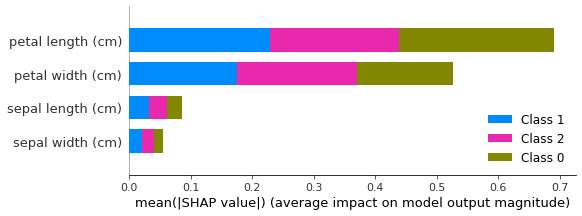

In [ ]:
shap.summary_plot(shap_values, X)


## 🛠️ 특성 공학 (Feature Engineering)

- 도메인 지식 (Domain Knowledge)
- 메모리 (Memory)
- 통계량 (Statistics)
- 날짜와 시간 (Datetime)
- 이산화 (Binning)
- 상호작용 (Interaction)
- 행렬 분해 (Matrix Factorization)
- 차원 축소 (Dimension Reduction)
- 임베딩 (Embedding)
- 외부 데이터 활용 (Data Enrichment)


**도메인 지식(Domain Knowledge)를 활용하여 ML 모델의 예측에 도움이 되는 새로운 feature를 만드는 방법이다**

> 해당 분야에서의 우리의 경험을 활용하여 예측에 유용한 feature를 만드는 과정으로, 탐정이 현장에서 주어진 단서들을 바탕으로 추리를 통해 새로운 인사이트를 찾아내는 과정과 유사하다. 이런 새로운 인사이트가 주어지면 최종 범인이 누구인지 특정하기가 더욱 수월해진다. 우리의 경험과 지식을 데이터에 포함시켜 모델이 더욱 쉽게 배울 수 있도록 도와주는 과정으로 생각할 수 있다.  
- 단서 : feature
- 추리 : feature engineering

**⛔ 상세 예시 설명 ⛔**
> **특성 공학(Feature Engineering)에는 정답이 없다.** 어떤 도메인(domain)의 문제를 푸느냐에 따라 접근법도 상이하며 같은 도메인(domain)이더라도 데이터셋이 다르면 만드는 feature들도 달라진다. 그렇기 때문에 **이 섹션에서 제공되는 상세 예시들은 이 섹션에서 사용하는 데이터셋에 맞춰 제작되었으며 다른 섹션들과 다르게 보편적으로 활용할 수 없으니 참고용으로 사용하자.** 


**유용한 자료**
- [Feature Engineering - Wikipedia](https://en.wikipedia.org/wiki/Feature_engineering)
- [Discover Feature Engineering, How to Engineer Features and How to Get Good at It - MachineLeariningMastery](https://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/)
- [Feature Engineering Using Pandas for Beginners - Analytics Vidhya](https://www.analyticsvidhya.com/blog/2020/12/feature-engineering-using-pandas-for-beginners/)
- [feature templates - Stanford cs221](https://stanford-cs221.github.io/autumn2020-extra/modules/machine-learning/feature-templates.pdf)

In [ ]:
# 실습을 위한 순서 데이터(Sequence Data)
# user - 사용자
# content - 문제
# time - 문제를 푸는데 걸린 시간 (초, sec)
# time - 문제를 푼 시간 (ex: 2021-01-20 10:24:34)
# correct - 문제 정답 여부

np.random.seed(7)

edu_df = pd.DataFrame({'user': ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'C', 'C', 'C', 'C', 'C'],
                       'content': ['1', '2', '3', '1', '2', '1', '1', '1', '2', '1', '1', '1'],
                       'time': [22, 19, 27, 15, 11, 33, 10, 30, 40, 35, 12, 5],
                       'timestamp': sorted([pd.Timestamp(2021, 1, np.random.randint(1, 30), np.random.randint(10, 15), 30, 7).timestamp() for _ in range(12)]),
                       'correct': [1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1]})
edu_df

,user,content,time,timestamp,correct
0,A,1,22,1.609508e+09,1
1,A,2,19,1.610026e+09,0
2,A,3,27,1.610116e+09,1
3,A,1,15,1.610807e+09,1
4,A,2,11,1.610894e+09,1
5,B,1,33,1.611153e+09,0
6,B,1,10,1.611491e+09,1
7,C,1,30,1.611657e+09,0
8,C,2,40,1.611664e+09,1
9,C,1,35,1.611668e+09,1


- https://www.kaggle.com/c/riiid-test-answer-prediction/discussion/209892
- https://featuretools.alteryx.com/en/stable/
- https://www.analyticsvidhya.com/blog/2020/10/7-feature-engineering-techniques-machine-learning/
https://elitedatascience.com/feature-engineering

### 🔨 도메인 지식 (Domain Knowledge)

> 각 도메인마다 전문가의 의견 청취 혹은 자신의 경험을 바탕으로 자주 나타나는 패턴을 알고 있는 경우 이러한 선험적 지식(Prior Knowledge)을 feature를 만드는데 활용할 수 있다.

**교육 측면에서 생각해볼 수 있는 예시**
- 학생이 답안지를 한 줄로 찍은 경우 판별
- 중간에 강의를 보고 같은 문제를 푸는 경우
- 모르는 문제를 만났을 경우 학생의 찍는 경향
- 문제의 난이도 판정
- 학생의 지식 수준 판정

###🔨 메모리 (Memory)

> 순서 데이터(Sequence Data)가 주어질 경우 순서 모델(Sequence Model, [ex: LSTM, Transformer, etc])을 사용하며 이 모델은 메모리(Memory)를 내장하고 있어 이전/이후에 입력된 데이터들을 기억하고 참조한다. 
<br><br>
주어진 데이터 이전/이후의 데이터들을 포함하는 **메모리(Memory)를 feature로 포함**시킴으로서 순서 모델(Sequence Model)를 사용하지 않고 일반적인 지도 학습 모델(ex: Light GBM, NN)을 사용하여 훈련할 수 있다.

1. 이동 (Shift)
2. 누적 합 (Cumsum)
3. 누적 총계 (Cumcount)
4. 이동 평균 (Rolling Mean)

**유용한 자료**
- [How to Convert a Time Series to a Supervised Learning Problem in Python - MachineLearningMastery](https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/)

#### 1. 이동 (Shift)

> 데이터를 이동시켜 미래 혹은 과거의 데이터들을 feature로 포함시킬 수 있다. 미래/과거의 데이터들이 현재를 판단할 때 중요할 경우 사용한다. `groupby`를 사용할 경우 각 그룹(group)별로 데이터를 이동(shift)시키는 것이 가능하다. shift를 사용할 경우 데이터가 이동하므로 비어있는 곳에 `NaN`이 들어간다.

- 미래/과거의 특정 시점에 문제 정답 맞춤 여부


- [pandas.DataFrame.groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)
- [pandas.DataFrame.shift](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html)

##### 미래/과거의 특정 시점에 문제 정답 맞춤 여부

> **이동(shift)**를 이용하여 유저별로 미래/과거의 특정 시점에 문제 정답을 맞췄는지 못 맞췄는지에 대한 여부를 feature로 추가해보자. 

In [ ]:
edu_shift_df = edu_df.copy()

# 미래 정보
edu_shift_df['correct_shift_-2'] = edu_shift_df.groupby('user')['correct'].shift(-2)
edu_shift_df['correct_shift_-1'] = edu_shift_df.groupby('user')['correct'].shift(-1)

# 과거 정보
edu_shift_df['correct_shift_1'] = edu_shift_df.groupby('user')['correct'].shift(1)
edu_shift_df['correct_shift_2'] = edu_shift_df.groupby('user')['correct'].shift(2)

edu_shift_df.iloc[:, [0, 3, 4, 5, 6, 7]]

,user,timestamp,correct,correct_shift_-2,correct_shift_-1,correct_shift_1
0,A,1.609508e+09,1,1.0,0.0,NaN
1,A,1.610026e+09,0,1.0,1.0,1.0
2,A,1.610116e+09,1,1.0,1.0,0.0
3,A,1.610807e+09,1,NaN,1.0,1.0
4,A,1.610894e+09,1,NaN,NaN,1.0
5,B,1.611153e+09,0,NaN,1.0,NaN
6,B,1.611491e+09,1,NaN,NaN,0.0
7,C,1.611657e+09,0,1.0,1.0,NaN
8,C,1.611664e+09,1,1.0,1.0,0.0
9,C,1.611668e+09,1,1.0,1.0,1.0


#### 2. 누적 합 (Cumsum)

> 이동(shift)만 사용하면 참조할 수 있는 미래/과거 데이터들의 갯수가 제한되며 참조하는 갯수에 따라 추가되는 feature의 수가 크게 늘어난다. 이 경우 미래/과거 데이터들을 모두 더하여 한 개의 feature에 포함시킬 수 있다. 이때 누적합(cumsum)을 사용한다

- 문제 풀이에 사용한 총 시간
- 과거에 맞춘 문제 수
- 미래에 맞출 문제 수
- 과거에 해당 문제를 맞춘 횟수


- [pandas.DataFrame.groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)
- [pandas.DataFrame.shift](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html)
- [pandas.DataFrame.cumsum](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.cumsum.html)

##### 문제 풀이에 사용한 총 시간

> **누적합(cumsum)**을 이용하여 유저별로 문제풀이에 사용한 총 시간을 feature로 추가해보자. 

In [ ]:
edu_cumsum_df = edu_df.copy()

# 문제 풀이에 총 사용 시간 
edu_cumsum_df['total_used_time'] = edu_cumsum_df.groupby('user')['time'].cumsum()

edu_cumsum_df[['user', 'time', 'total_used_time']]

,user,time,total_used_time
0,A,22,22
1,A,19,41
2,A,27,68
3,A,15,83
4,A,11,94
5,B,33,33
6,B,10,43
7,C,30,30
8,C,40,70
9,C,35,105


##### 과거에 맞춘 문제 수

> **이동(Shift)와 누적합(cumsum)**을 사용하여 유저별 과거에 맞춘 문제 수를 feature로 추가해보자.

In [ ]:
edu_correct_df = edu_df.copy()

# 과거에 맞춘 문제 수 
edu_correct_df['shift'] = edu_correct_df.groupby('user')['correct'].shift().fillna(0)
edu_correct_df['past_correct'] = edu_correct_df.groupby('user')['shift'].cumsum()

edu_correct_df[['user', 'correct', 'past_correct']]

,user,correct,past_correct
0,A,1,0.0
1,A,0,1.0
2,A,1,1.0
3,A,1,2.0
4,A,1,3.0
5,B,0,0.0
6,B,1,0.0
7,C,0,0.0
8,C,1,0.0
9,C,1,1.0


##### 미래에 맞출 문제 수

> **이동(Shift)와 누적합(cumsum)**을 사용하여 유저별 미래에 맞출 문제 수를 feature로 추가해보자.

In [ ]:
reversed_edu_correct_df = edu_df.iloc[::-1].copy()

# 미래에 맞출 문제 수
reversed_edu_correct_df['shift'] = reversed_edu_correct_df.groupby('user')['correct'].shift().fillna(0)
reversed_edu_correct_df['future_correct'] = reversed_edu_correct_df.groupby('user')['shift'].cumsum()
edu_correct_df = reversed_edu_correct_df.iloc[::-1]

edu_correct_df[['user', 'correct', 'future_correct']]

,user,correct,future_correct
0,A,1,3.0
1,A,0,3.0
2,A,1,2.0
3,A,1,1.0
4,A,1,0.0
5,B,0,1.0
6,B,1,0.0
7,C,0,4.0
8,C,1,3.0
9,C,1,2.0


##### 과거에 해당 문제를 맞춘 횟수

> **이동(Shift)와 누적합(cumsum)**을 사용하여 유저별 **현재 풀고 있는 문제를 과거에 맞춘 횟수**를 feature로 추가해보자. 유저가 해당 문제를 과거에 풀었다면 다시 마주할 경우 더욱 쉽게 풀 것이라는 가정이 깔려있다.

In [ ]:
edu_correct_df = edu_df.copy()

# 과거에 해당 문제를 맞춘 횟수
edu_correct_df['shift'] = edu_correct_df.groupby(['user', 'content'])['correct'].shift().fillna(0)
edu_correct_df['past_content_correct'] = edu_correct_df.groupby(['user', 'content'])['shift'].cumsum()

edu_correct_df[['user', 'content', 'correct', 'past_content_correct']]

,user,content,correct,past_content_correct
0,A,1,1,0.0
1,A,2,0,0.0
2,A,3,1,0.0
3,A,1,1,1.0
4,A,2,1,0.0
5,B,1,0,0.0
6,B,1,1,0.0
7,C,1,0,0.0
8,C,2,1,0.0
9,C,1,1,0.0


#### 3. 누적 총계 (Cumcount)

> 누적합(cumsum)을 이용하여 미래/과거 데이터들을 갯수 제한 없이 포함시켰다. 다만 이는 정규화(normalize)가 되지 않아 과거/미래 데이터가 누적될수록 값이 제한없이 커지게 된다. 이때 누적 총계(cumcount)를 이용하여 나누는 방법이 있으며 그 결과로 평균(average)값을 구할 수 있다.

- 과거에 푼 문제 수
- 과거 평균 정답률
- 과거에 해당 문제 평균 정답률


- [pandas.DataFrame.groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)
- [pandas.DataFrame.shift](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html)
- [pandas.DataFrame.cumsum](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.cumsum.html)
- [pandas.core.groupby.GroupBy.cumcount](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.cumcount.html)

##### 과거에 푼 문제 수

> **누적총계(cumcount)**를 사용하여 유저별 과거에 푼 문제수를 feature로 추가해보자.

In [ ]:
edu_correct_df = edu_df.copy()

# 과거에 푼 문제 수
edu_correct_df['past_count'] = edu_correct_df.groupby('user').cumcount()


edu_correct_df[['user', 'correct', 'past_count']]

,user,correct,past_count
0,A,1,0
1,A,0,1
2,A,1,2
3,A,1,3
4,A,1,4
5,B,0,0
6,B,1,1
7,C,0,0
8,C,1,1
9,C,1,2


##### 과거 평균 정답률

> **이동(Shift), 누적합(cumsum)와 누적총계(cumcount)**를 사용하여 유저별 과거 평균 정답률을 feature로 추가해보자.

**다음의 2가지 feature를 만든 후 이를 나눈다.**
- 과거에 맞춘 문제 수
- 과거에 푼 문제 수

과거 평균 정답률 $=$ 과거에 맞춘 문제 수 $\div$ 과거에 푼 문제 수

In [ ]:
edu_correct_df = edu_df.copy()

# 과거에 푼 문제 수
edu_correct_df['past_count'] = edu_correct_df.groupby('user').cumcount()

# 과거에 맞춘 문제 수
edu_correct_df['shift'] = edu_correct_df.groupby('user')['correct'].shift().fillna(0)
edu_correct_df['past_correct'] = edu_correct_df.groupby('user')['shift'].cumsum()

# 과거 평균 정답률
edu_correct_df['average_correct'] = (edu_correct_df['past_correct'] / edu_correct_df['past_count']).fillna(0)

edu_correct_df[['user', 'correct', 'average_correct']]

,user,correct,average_correct
0,A,1,0.000000
1,A,0,1.000000
2,A,1,0.500000
3,A,1,0.666667
4,A,1,0.750000
5,B,0,0.000000
6,B,1,0.000000
7,C,0,0.000000
8,C,1,0.000000
9,C,1,0.500000


##### 과거 해당 문제 평균 정답률

> **이동(Shift), 누적합(cumsum)와 누적총계(cumcount)**를 사용하여 유저별 **현재 풀고 있는 문제의 과거 평균 정답률**을 feature로 추가해보자.

**다음의 2가지 feature를 만든 후 이를 나눈다.**
- 과거에 해당 문제를 맞춘 수
- 과거에 해당 문제를 푼 수

과거 해당 문제 평균 정답률 $=$ 과거에 해당 문제를 맞춘 수 $\div$ 과거에 해당 문제를 푼 수

In [ ]:
edu_correct_df = edu_df.copy()

# 과거에 해당 문제를 푼 수
edu_correct_df['past_content_count'] = edu_correct_df.groupby(['user', 'content']).cumcount()

# 과거에 해당 문제를 맞춘 수
edu_correct_df['shift'] = edu_correct_df.groupby(['user', 'content'])['correct'].shift().fillna(0)
edu_correct_df['past_content_correct'] = edu_correct_df.groupby(['user', 'content'])['shift'].cumsum()

# 과거 해당 문제 평균 정답률
edu_correct_df['average_content_correct'] = (edu_correct_df['past_content_correct'] / edu_correct_df['past_content_count']).fillna(0)

edu_correct_df[['user', 'content', 'correct', 'average_content_correct']]

,user,content,correct,average_content_correct
0,A,1,1,0.000000
1,A,2,0,0.000000
2,A,3,1,0.000000
3,A,1,1,1.000000
4,A,2,1,0.000000
5,B,1,0,0.000000
6,B,1,1,0.000000
7,C,1,0,0.000000
8,C,2,1,0.000000
9,C,1,1,0.000000


#### 4. 이동 평균 (Rolling Mean)

> 위에서 평균을 구했을 때 모든 미래/과거의 데이터들을 이용하여 평균을 구하였다. 만약 현재 데이터를 중심으로 제한된 범위의 과거 데이터를 이용해서 평균을 구하고 싶을 때 이동 평균(Rolling Mean)을 사용할 수 있다.

- 최근 3개 문제 평균 풀이 시간


- [pandas.DataFrame.groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)
- [pandas.DataFrame.rolling](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html)

##### 최근 3개 문제 평균 풀이 시간

> **이동 평균(Rolling Mean)**을 사용해 현재 푸는 문제를 포함해서 최근 3개 문제의 평균 풀이 시간을 feature로 추가해보자. 최근 문제를 얼마나 빨리 푸느냐에 따라 학생의 최근 컨디션을 추측해볼 수 있을지도 모른다.

In [ ]:
edu_rolling_df = edu_df.copy()

# 최근 3개 문제 평균 풀이 시간
edu_rolling_df['mean_time'] = edu_rolling_df.groupby(['user'])['time'].rolling(3).mean().values

edu_rolling_df[['user', 'time', 'mean_time']]

,user,time,mean_time
0,A,22,NaN
1,A,19,NaN
2,A,27,22.666667
3,A,15,20.333333
4,A,11,17.666667
5,B,33,NaN
6,B,10,NaN
7,C,30,NaN
8,C,40,NaN
9,C,35,35.000000


### 🔨 통계량 (Statistics)

> 가장 보편적으로 많이 사용되는 방법으로 feature를 그룹으로 묶어 각 그룹의 통계량(statistics)을 feature로 추가하는 방법이다. 정형 데이터(structured data)를 사용하는 대회에서 매우 자주 볼 수 있다.

1. 수치형 feature의 평균과 표준편차
2. 문제 풀이에 사용한 시간의 중간값


- [pandas.DataFrame.agg](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html)




#### 1. 수치형 feature의 평균과 표준편차

> 데이터셋의 모든 수치형 feature의 유저별 평균(mean)과 표준편차(standard deviation)을 새로운 feature로 추가해보자.

In [ ]:
edu_agg_df = edu_df.copy()

# 평균 (mean) / 표준 편차 (std)
agg_df = edu_agg_df.groupby('user').agg(['mean', 'std'])

# mapping을 위해 pandas DataFrame을 dictionary형태로 변환
agg_dict = agg_df.to_dict()

# 구한 통계량을 각 사용자에게 mapping
for k, v in agg_dict.items():
    # feature 이름
    feature_name = "_".join(k)
    
    # mapping이후 새로운 feature 추가
    edu_agg_df[feature_name] = edu_agg_df['user'].map(v)

edu_agg_df

,user,content,time,timestamp,correct,time_mean,time_std,timestamp_mean,timestamp_std,correct_mean,correct_std
0,A,1,22,1.609508e+09,1,18.8,6.180615,1.610270e+09,579216.394796,0.8,0.447214
1,A,2,19,1.610026e+09,0,18.8,6.180615,1.610270e+09,579216.394796,0.8,0.447214
2,A,3,27,1.610116e+09,1,18.8,6.180615,1.610270e+09,579216.394796,0.8,0.447214
3,A,1,15,1.610807e+09,1,18.8,6.180615,1.610270e+09,579216.394796,0.8,0.447214
4,A,2,11,1.610894e+09,1,18.8,6.180615,1.610270e+09,579216.394796,0.8,0.447214
5,B,1,33,1.611153e+09,0,21.5,16.263456,1.611322e+09,239284.934754,0.5,0.707107
6,B,1,10,1.611491e+09,1,21.5,16.263456,1.611322e+09,239284.934754,0.5,0.707107
7,C,1,30,1.611657e+09,0,24.4,15.142655,1.611733e+09,116096.511575,0.8,0.447214
8,C,2,40,1.611664e+09,1,24.4,15.142655,1.611733e+09,116096.511575,0.8,0.447214
9,C,1,35,1.611668e+09,1,24.4,15.142655,1.611733e+09,116096.511575,0.8,0.447214


#### 2. 문제 풀이에 사용한 시간의 중간값

> 유저별 문제 풀이에 사용한 시간의 중간값을 feature로 추가해보자. 이 경우 각 문제를 풀 때 상대적으로 빨리 풀었는지 늦게 풀었는지 알 수 있다. 상대적인 풀이 시간 비교를 통해 해당 사용자가 문제를 쉽게 느끼는지 어렵게 느끼는지 추론해 볼 수 있을지도 모른다.

In [ ]:
edu_agg_df = edu_df.copy()

# 중간값 (median)
agg_df = edu_agg_df.groupby('user')['time'].agg(['median'])

# mapping을 위해 pandas DataFrame을 dictionary형태로 변환
agg_dict = agg_df.to_dict()

# 구한 통계량을 각 사용자에게 mapping
edu_agg_df['time_median'] = edu_agg_df['user'].map(agg_dict['median'])

edu_agg_df[['user', 'time', 'time_median']]

,user,time,time_median
0,A,22,19.0
1,A,19,19.0
2,A,27,19.0
3,A,15,19.0
4,A,11,19.0
5,B,33,21.5
6,B,10,21.5
7,C,30,30.0
8,C,40,30.0
9,C,35,30.0


### 🔨 날짜와 시간 (Datetime)

> 날짜와 시간(datetime)이 존재하는 데이터셋에서는 이를 활용하여 다양한 feature를 만들어낼 수 있다. 날짜와 시간을 다른 feature들과 엮어서 어떤 feature를 만들어낼 수 있을지 자유롭게 상상력을 발휘해보자.

- 문제를 푸는 시간대
- 시간대별 정답률
- 사용자의 야행성 여부
- 문제 풀이 시간 정규화
- 문제 풀이에 사용한 시간의 상대적 비교

**유용한 자료**
- [6 Powerful Feature Engineering Techniques For Time Series Data (using Python) - Analytics Vidhya](https://www.analyticsvidhya.com/blog/2019/12/6-powerful-feature-engineering-techniques-time-series/)


##### 문제를 푸는 시간대

> 유저가 문제를 몇 시에 푸는지를 feature로 추가해보자. 여기서 더 응용한다면 특정 시간대의 문제 정답률을 확인해봄으로서 특정 시간대의 사용자들의 능률을 알 수 있을지도 모른다.

- [pandas.to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)
- [pandas.DataFrame.transform](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transform.html)

In [ ]:
edu_time_df = edu_df.copy()

# custom 함수 적용
edu_time_df['hour'] = edu_time_df['timestamp'].transform(lambda x: pd.to_datetime(x, unit='s').dt.hour)

edu_time_df[['user', 'timestamp', 'hour']]

,user,timestamp,hour
0,A,1.609508e+09,13
1,A,1.610026e+09,13
2,A,1.610116e+09,14
3,A,1.610807e+09,14
4,A,1.610894e+09,14
5,B,1.611153e+09,14
6,B,1.611491e+09,12
7,C,1.611657e+09,10
8,C,1.611664e+09,12
9,C,1.611668e+09,13


##### 시간대별 정답률

> 유저 상관 없이 시간대별 정답률을 feature로 추가해보자. 특정 시간대의 정답률에서 패턴을 발견할 수 있을지도 모른다.


- [pandas.to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)
- [pandas.DataFrame.transform](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transform.html)

In [ ]:
edu_time_df = edu_df.copy()

# 문제를 푸는 시간대
edu_time_df['hour'] = edu_time_df['timestamp'].transform(lambda x: pd.to_datetime(x, unit='s').dt.hour)

# 시간대별 정답률
hour_dict = edu_time_df.groupby(['hour'])['correct'].mean().to_dict()
edu_time_df['correct_per_hour'] = edu_time_df['hour'].map(hour_dict)

edu_time_df.groupby(['hour'])[['correct', 'correct_per_hour']].mean()

,correct,correct_per_hour
hour,,
10,0.500000,0.500000
12,1.000000,1.000000
13,0.666667,0.666667
14,0.800000,0.800000


##### 사용자의 야행성 여부

> 사용자가 밤에 주로 활동하는 사람인지 낮에 주로 활동하는 사람인지 여부를 feature로 추가해보자. 이를 통해 사용자가 문제를 풀 때 어떤 시간대인지에 따라 효율을 추정해볼 수 있을지도 모른다.


- [pandas.to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)
- [pandas.DataFrame.transform](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transform.html)

In [ ]:
edu_time_df = edu_df.copy()

# 문제를 푸는 시간대
edu_time_df['hour'] = edu_time_df['timestamp'].transform(lambda x: pd.to_datetime(x, unit='s').dt.hour)

# 사용자의 주 활동 시간
mode_dict = edu_time_df.groupby(['user'])['hour'].agg(lambda x: pd.Series.mode(x)[0]).to_dict()
edu_time_df['hour_mode'] = edu_time_df['user'].map(mode_dict)

# 사용자의 야행성 여부
# 시간이 10 ~ 15시 사이에 분포되어 있어 여기에서는 임의로 12로 분리하였다
edu_time_df['is_night'] = edu_time_df['hour_mode'] > 12

edu_time_df[['user', 'hour', 'hour_mode', 'is_night']]

,user,hour,hour_mode,is_night
0,A,13,14,True
1,A,13,14,True
2,A,14,14,True
3,A,14,14,True
4,A,14,14,True
5,B,14,12,False
6,B,12,12,False
7,C,10,10,False
8,C,12,10,False
9,C,13,10,False


##### 문제 풀이 시간 정규화

> 문제 풀이에 사용한 시간을 정규화하여 feature로 추가해보자.

- [pandas.DataFrame.transform](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transform.html)

In [ ]:
edu_custom_df = edu_df.copy()

# custom 함수 적용
# time만 transform하였다
edu_custom_df['normalized_time'] = edu_custom_df.groupby('user')['time'].transform(lambda x: (x - x.mean())/x.std())

edu_custom_df[['user', 'time', 'normalized_time']]

,user,time,normalized_time
0,A,22,0.517748
1,A,19,0.032359
2,A,27,1.326729
3,A,15,-0.614826
4,A,11,-1.262010
5,B,33,0.707107
6,B,10,-0.707107
7,C,30,0.369816
8,C,40,1.030202
9,C,35,0.700009


##### 문제 풀이에 사용한 시간의 상대적 비교

> 문제 풀이에 사용한 시간과 이를 바탕으로 구한 중간값과의 차이를 통해 문제 풀이에 시간을 얼마나 사용하였는지를 상대적으로 비교하는 feature를 추가해보자.

- [pandas.DataFrame.apply](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html)

In [ ]:
edu_custom_df = edu_df.copy()

# custom 함수 적용
# apply를 사용해 time column을 직접 지정할 수 있다
edu_custom_df['relative_time'] = edu_custom_df.groupby('user').apply(lambda x: x['time'] - x['time'].median()).values

edu_custom_df[['user', 'time', 'relative_time']]

,user,time,relative_time
0,A,22,3.0
1,A,19,0.0
2,A,27,8.0
3,A,15,-4.0
4,A,11,-8.0
5,B,33,11.5
6,B,10,-11.5
7,C,30,0.0
8,C,40,10.0
9,C,35,5.0


### 🔨 이산화 (Binning)

> 연속형 feature를 구간을 나눠 범주형 feature로 변환한다. 경우에 따라서는 범주형 feature를 대상으로 이산화(Binning)을 진행하기도 한다. 이 경우 카테고리를 더욱 적은 수의 카테고리로 재분류하는 것과 같다.

**⭐ 트리(Tree)와 회귀(Regression)에서의 이산화(Binning) ⭐**
> 트리(Tree) 모델은 이산화(Binning)를 내부적으로 해주기에 별도로 이산화(Binning)를 하지 않아도 된다. 그렇다면 회귀에서의 이산화(Binning)는 어떤 영향이 있을까? 트리와 회귀에서 이산화(Binning)가 어떤 영향을 미치는지 시각적으로 확인해보자.
- ⭐ 트리와 회귀의 이산화 비교 (Compare of Tree and Regression at Binning) ⭐


1. 문제 풀이 시간 구간으로 나누기

**유용한 자료**
- [Data Binning - Wikipedia](https://en.wikipedia.org/wiki/Data_binning)
- [Feature Engineering — deep dive into Encoding and Binning techniques - Towards Data Science](https://towardsdatascience.com/feature-engineering-deep-dive-into-encoding-and-binning-techniques-5618d55a6b38)
- [Linear Regression, Binning and Polynomial Linear Regression - medium](https://medium.com/@rishabhrjain/linear-regrsesion-binning-and-polynomial-linear-regression-3ed62f79ce0)

#### ⭐ 회귀와 트리의 이산화 비교 (Compare of Tree and Regression at Binning) ⭐


> 트리(Tree)와 회귀(Regression)에서 이산화(Binning)가 어떤 영향을 미치는지 시각적으로 확인해보자. 

- 이산화(Binning) 이전
- 이산화(Binning) 이후
- 기존 feature + 이산화(Binning) feature

**참고자료**
- [04-representing-data-feature-engineering.ipynb - Github [ introduction_to_ml_with_python ]](https://github.com/amueller/introduction_to_ml_with_python/blob/master/04-representing-data-feature-engineering.ipynb)

##### **이산화(Binning) 이전**

- `트리(Tree)` - 이산화는 내부적으로 진행되며 Bin 갯수는 내부 알고리즘에 의해 결정된다
- `회귀(regression)` - 전체 구간에서 회귀를 진행한다

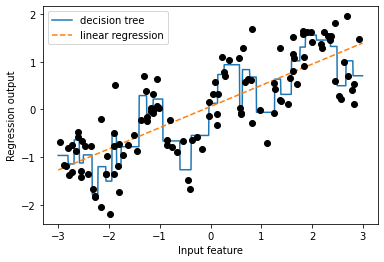

In [ ]:
# reference https://github.com/amueller/introduction_to_ml_with_python/blob/master/04-representing-data-feature-engineering.ipynb

# Binning, Discretization, Linear Models, and Trees
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# 데이터 준비
X, y = mglearn.datasets.make_wave(n_samples=120)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

# 모델 훈련
tree = DecisionTreeRegressor(min_samples_leaf=3).fit(X, y)
reg = LinearRegression().fit(X, y)

# 시각화
plt.plot(line, tree.predict(line), label="decision tree")
plt.plot(line, reg.predict(line), '--', label="linear regression")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best");

##### **이산화(Binning) 이후**

> 회귀(Regression)와 결정 트리(Decision Tree)의 예측값이 비슷한 동향을 보임을 알 수 있다.

- `트리(Tree)` - 이산화는 동일하게 진행되나 Bin 갯수가 사용자가 직접 지정한 Bin 갯수에 맞춰진다
- `회귀(regression)` - 전체 구간에 회귀가 진행되지 않고 구간별로 회귀가 각각 진행된다


- [sklearn.preprocessing.KBinsDiscretizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html)

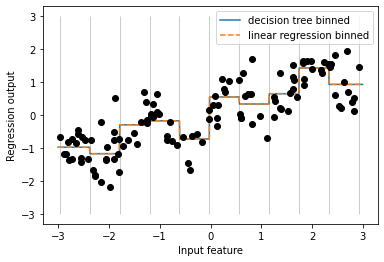

In [ ]:
# reference https://github.com/amueller/introduction_to_ml_with_python/blob/master/04-representing-data-feature-engineering.ipynb

# Binning, Discretization, Linear Models, and Trees

from sklearn.preprocessing import KBinsDiscretizer

# 이산화 (Binning)
kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense')
kb.fit(X)

X_binned = kb.transform(X)
line_binned = kb.transform(line)

# 모델 훈련
tree = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
reg = LinearRegression().fit(X_binned, y)

# 시각화
plt.plot(line, tree.predict(line_binned), label='decision tree binned')
plt.plot(line, reg.predict(line_binned), '--', label='linear regression binned')

plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature");

##### **기존 feature + 이산화(Binning) feature**

> 회귀(Regression)와 결정 트리(Decision Tree)의 결과는 여전히 동일하다

- `트리(Tree)` - 이산화로 나눠지는 구간이 더욱 늘어나 **overfitting되는 경향을 볼 수 있다.**
- `회귀(regression)` - 전체 구간에 회귀가 진행되지 않고 구간별로 회귀가 각각 진행되며 **기울기도 학습하기 시작한다.**


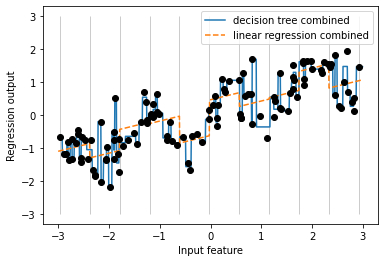

In [ ]:
# reference https://github.com/amueller/introduction_to_ml_with_python/blob/master/04-representing-data-feature-engineering.ipynb

# Binning, Discretization, Linear Models, and Trees

X_combined = np.hstack([X, X_binned])
line_combined = np.hstack([line, line_binned])

# 이산화 (Binning) + 기존 데이터
tree = DecisionTreeRegressor(min_samples_split=3).fit(X_combined, y)
reg = LinearRegression().fit(X_combined, y)

# 모델 훈련
plt.plot(line, tree.predict(line_combined), label='decision tree combined')
plt.plot(line, reg.predict(line_combined), '--', label='linear regression combined')

# 시각화
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(X[:, 0], y, 'o', c='k');

#### 1. 문제 풀이 시간 구간으로 나누기

> 문제 풀이 시간을 3단계 구간으로 나누어 feature로 추가해보자. 이를 통해 문제 풀이 속도가 느린지, 평범한지, 빠른지 구분해볼 수 있을 것이다.

- [pandas.cut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html) - feature의 최대값과 최소값의 차이를 bin 갯수만큼 나눠 구간 범위로 사용
- [pandas.qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html) - feature의 각 구간에 데이터 갯수가 비슷하게 배분될 수 있도록 구간을 나눔

In [ ]:
edu_time_df = edu_df.copy()

# 문제를 풀이 시간 3단계 구간으로 나누기
edu_time_df['time_cut'] = pd.cut(edu_time_df['time'], bins=3)
edu_time_df['time_qcut'] = pd.qcut(edu_time_df['time'], q=3)

edu_time_df[['time', 'time_cut', 'time_qcut']]

,time,time_cut,time_qcut
0,22,"(16.667, 28.333]","(14.0, 28.0]"
1,19,"(16.667, 28.333]","(14.0, 28.0]"
2,27,"(16.667, 28.333]","(14.0, 28.0]"
3,15,"(4.965, 16.667]","(14.0, 28.0]"
4,11,"(4.965, 16.667]","(4.999, 14.0]"
5,33,"(28.333, 40.0]","(28.0, 40.0]"
6,10,"(4.965, 16.667]","(4.999, 14.0]"
7,30,"(28.333, 40.0]","(28.0, 40.0]"
8,40,"(28.333, 40.0]","(28.0, 40.0]"
9,35,"(28.333, 40.0]","(28.0, 40.0]"


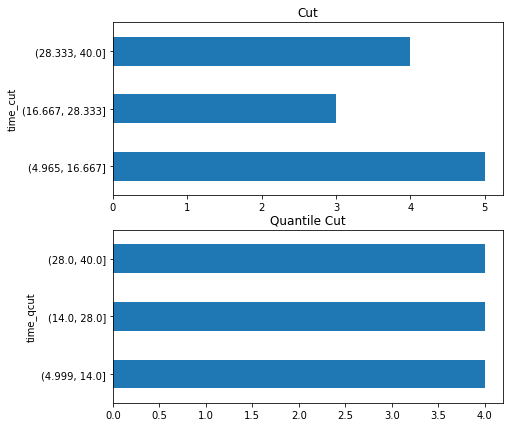

In [ ]:
# 시각화
plt.figure(figsize=(7, 7))

plt.subplot(2, 1, 1)
plt.title('Cut')
edu_time_df.groupby('time_cut').count().iloc[:, 0].plot(kind='barh');

plt.subplot(2, 1, 2)
plt.title('Quantile Cut')
edu_time_df.groupby('time_qcut').count().iloc[:, 0].plot(kind='barh');

### 🔨 상호작용 (Interaction)

> 다수의 feature를 결합하여서 새로운 feature를 만들어내는 방법이다. 다수의 feature가 서로 상호작용할 경우 feature를 각각 사용하는 것보다 결합하여 사용하는 것이 최종 예측에 도움이 된다.

1. 범주형 / 범주형 (Categorical / Categorical)
2. 수치형 / 수치형 (Numeric / Numeric)
3. 범주형 / 수치형 (Categorical / Numeric)

**⛔ 상세 예시 없음 ⛔**
> 데이터셋에 상호작용하는 feature가 없는 만큼, 상세 예시 없이 데이터셋에 존재하는 feature를 이용하여 상호작용 feature를 만드는 방법만 소개한다.


**유용한 자료**
- [Finding and Visualising Interactions - Towards Data Science](https://towardsdatascience.com/finding-and-visualising-interactions-14d54a69da7c)
- [How interaction terms are treated in Gradient Boosting? - StackExchange](https://stats.stackexchange.com/questions/427710/how-interaction-terms-are-treated-in-gradient-boosting)
- [Using Patsy for Statistical Modeling - Medium](https://medium.com/@mummertm/using-patsy-for-statistical-modeling-189a9d9f5d27)


#### 1. 범주형 / 범주형 (Categorical / Categorical)

> 범주형 간에 상호작용(interaction)일 경우 원핫 인코딩(One-Hot Encoding)을 한 후 결합한다.

- sklearn `OneHotEncoder`
- patsy `dmatrix`




##### sklearn `OneHotEncoder`

- [sklearn.preprocessing.OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

- **feature 열 이름 결합 후 원핫 인코딩**
> `B|2`, `B|3`, `C|3`처럼 데이터에서 존재하지 않는 경우에 원핫 인코딩에서 제외된다.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# 범주형 feature 합치기
edu_interaction_df = edu_df.copy()
edu_interaction_df['user|content'] = edu_interaction_df.user.map(str) + '|' + edu_interaction_df.content.map(str)

# 원핫 인코딩
X = edu_interaction_df['user|content'].values.reshape(-1, 1)
enc = OneHotEncoder()
encoded = enc.fit_transform(X).toarray()

# 상호작용 원핫 인코딩
interaction_df = pd.DataFrame(encoded, columns=enc.categories_[0], dtype=np.int8)

pd.concat([edu_interaction_df, interaction_df], axis=1).iloc[:, [0, 1, 5, 6, 7, 8, 9, 10, 11]]

,user,content,user|content,A|1,A|2,A|3,B|1,C|1,C|2
0,A,1,A|1,1,0,0,0,0,0
1,A,2,A|2,0,1,0,0,0,0
2,A,3,A|3,0,0,1,0,0,0
3,A,1,A|1,1,0,0,0,0,0
4,A,2,A|2,0,1,0,0,0,0
5,B,1,B|1,0,0,0,1,0,0
6,B,1,B|1,0,0,0,1,0,0
7,C,1,C|1,0,0,0,0,1,0
8,C,2,C|2,0,0,0,0,0,1
9,C,1,C|1,0,0,0,0,1,0


- **feature 원핫 인코딩 후 결합**
> `B|2`, `B|3`, `C|3`처럼 데이터에서 존재하지 않아도 원핫 인코딩에 포함된다.

In [ ]:
edu_interaction_df = edu_df.copy()

# 원핫 인코딩
X_user = edu_interaction_df['user'].values.reshape(-1, 1)
X_content = edu_interaction_df['content'].values.reshape(-1, 1)

enc = OneHotEncoder()
encoded_user = enc.fit_transform(X_user).toarray()
encoded_content = enc.fit_transform(X_content).toarray()

# 두 원핫 인코딩 결과가 결합한 후의 index 구하기
interaction_i = len(encoded_content[0])*np.where(encoded_user == 1)[1] + np.where(encoded_content == 1)[1]

# interaction 열 이름 구하기
user_categories = edu_interaction_df['user'].unique()
content_categories = edu_interaction_df['content'].unique()

columns = []
for user_category in user_categories:
    for content_category in content_categories:
        columns.append(user_category + '|' + content_category)

# 원핫 인코딩
interaction = np.eye(9)[interaction_i]

pd.DataFrame(interaction, columns=columns, dtype=np.int8)

,A|1,A|2,A|3,B|1,B|2,B|3,C|1,C|2,C|3
0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,0,1,0
9,0,0,0,0,0,0,1,0,0


##### patsy `dmatrix`

**patsy 기호**
- `+` - feature 추가
- `:` - 상호작용(interaction)
- `*` - 두 feature와 상호작용(interaction) 모두 표시
- `I()` - 수치 연산 적용
- `0` - Intercept 제거


- [patsy API reference - patsy 공식문서](https://patsy.readthedocs.io/en/latest/API-reference.html)

In [ ]:
from patsy import dmatrix 

edu_interaction_df = edu_df.copy()

interaction_df = dmatrix("content:user + 0", data=edu_interaction_df, return_type='dataframe')
interaction_df = interaction_df.astype(np.int8)

pd.concat([edu_interaction_df, interaction_df], axis=1).iloc[:, [0, 1, 5, 6, 7, 8, 9, 10, 11, 12, 13]]

,user,content,content[1]:user[A],content[2]:user[A],content[3]:user[A],content[1]:user[B],content[2]:user[B],content[3]:user[B],content[1]:user[C],content[2]:user[C],content[3]:user[C]
0,A,1,1,0,0,0,0,0,0,0,0
1,A,2,0,1,0,0,0,0,0,0,0
2,A,3,0,0,1,0,0,0,0,0,0
3,A,1,1,0,0,0,0,0,0,0,0
4,A,2,0,1,0,0,0,0,0,0,0
5,B,1,0,0,0,1,0,0,0,0,0
6,B,1,0,0,0,1,0,0,0,0,0
7,C,1,0,0,0,0,0,0,1,0,0
8,C,2,0,0,0,0,0,0,0,1,0
9,C,1,0,0,0,0,0,0,1,0,0


#### 2. 수치형 / 수치형 (Numeric / Numeric)

> 수치형 feature 간에 연산($+ - \times \div$)을 하여 새로운 feature를 만든다

- pandas ($+ - \times \div$)
- sklearn `PolynomialFeatures` ($\times$)
- patsy `dmatrix` ($+ - \times \div$)

**⛔ content feature ⛔**
> 데이터셋에서 수치형 feature가 `time`밖에 없기에 임시로 `content`를 수치형으로 취급하여 사용한다.  


##### pandas ($+ - \times \div$)


In [ ]:
edu_interaction_df = edu_df.copy()

content = edu_interaction_df['content'].astype(np.int8).values
time = edu_interaction_df['time'].values

# + − × ÷
pd.DataFrame({'content': content,
              'time': time,
              'content+time': content+time,
              'content-time': content-time,
              'content*time': content*time,
              'content/time': content/time})

,content,time,content+time,content-time,content*time,content/time
0,1,22,23,-21,22,0.045455
1,2,19,21,-17,38,0.105263
2,3,27,30,-24,81,0.111111
3,1,15,16,-14,15,0.066667
4,2,11,13,-9,22,0.181818
5,1,33,34,-32,33,0.030303
6,1,10,11,-9,10,0.100000
7,1,30,31,-29,30,0.033333
8,2,40,42,-38,80,0.050000
9,1,35,36,-34,35,0.028571


##### sklearn `PolynomialFeatures` ($\times$)

- [sklearn.preprocessing.PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

edu_interaction_df = edu_df.copy()

X = edu_interaction_df[['content', 'time']]
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

pd.DataFrame(X_poly, columns=poly.get_feature_names(), dtype=np.int8)

,x0,x1,x0 x1
0,1,22,22
1,2,19,38
2,3,27,81
3,1,15,15
4,2,11,22
5,1,33,33
6,1,10,10
7,1,30,30
8,2,40,80
9,1,35,35


##### patsy `dmatrix` ($+ - \times \div$)
**patsy 기호**
- `+` - feature 추가
- `:` - 상호작용(interaction)
- `*` - 두 feature와 상호작용(interaction) 모두 표시
- `I()` - 수치 연산 적용
- `0` - Intercept 제거


- [patsy API reference - patsy 공식문서](https://patsy.readthedocs.io/en/latest/API-reference.html)

In [ ]:
from patsy import dmatrix 

edu_interaction_df = edu_df.copy()
edu_interaction_df.content = edu_interaction_df.content.astype(np.int8)

# 상호작용 (:)은 I(*) 곱하기 연산과 결과가 동일하다
interaction_df = dmatrix("content + time + content:time + I(content+time) + I(content-time) + I(content*time) + I(content/time) + 0", data=edu_interaction_df, return_type='dataframe')
interaction_df.astype(np.int8)

,content,time,content:time,I(content + time),I(content - time),I(content * time),I(content / time)
0,1,22,22,23,-21,22,0
1,2,19,38,21,-17,38,0
2,3,27,81,30,-24,81,0
3,1,15,15,16,-14,15,0
4,2,11,22,13,-9,22,0
5,1,33,33,34,-32,33,0
6,1,10,10,11,-9,10,0
7,1,30,30,31,-29,30,0
8,2,40,80,42,-38,80,0
9,1,35,35,36,-34,35,0


#### 3. 범주형 / 수치형 (Categorical / Numeric)

> 범주형 feature를 원핫 인코딩(One-Hot Encoding)을 한 후 수치형 feature와 곱하여 결합한다.

- sklearn `OneHotEncoder`
- patsy `dmatrix`

##### sklearn `OneHotEncoder`

- [sklearn.preprocessing.OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

edu_interaction_df = edu_df.copy()

X_user = edu_interaction_df['user'].values.reshape(-1, 1)
X_time = edu_interaction_df['time'].values.reshape(-1, 1)

# 원핫 인코딩
enc = OneHotEncoder()
encoded_user = enc.fit_transform(X_user).toarray()

# 상호작용
interaction = encoded_user * X_time
columns = enc.categories_[0] + '|time'

pd.DataFrame(interaction, columns=columns, dtype=np.int8)

,A|time,B|time,C|time
0,22,0,0
1,19,0,0
2,27,0,0
3,15,0,0
4,11,0,0
5,0,33,0
6,0,10,0
7,0,0,30
8,0,0,40
9,0,0,35


##### patsy `dmatrix`
**patsy 기호**
- `+` - feature 추가
- `:` - 상호작용(interaction)
- `*` - 두 feature와 상호작용(interaction) 모두 표시
- `I()` - 수치 연산 적용
- `0` - Intercept 제거


- [patsy API reference - patsy 공식문서](https://patsy.readthedocs.io/en/latest/API-reference.html)

In [ ]:
from patsy import dmatrix 

edu_interaction_df = edu_df.copy()
dmatrix("user:time + 0", data=edu_interaction_df, return_type='dataframe').astype(np.int8)

,user[A]:time,user[B]:time,user[C]:time
0,22,0,0
1,19,0,0
2,27,0,0
3,15,0,0
4,11,0,0
5,0,33,0
6,0,10,0
7,0,0,30
8,0,0,40
9,0,0,35


### 🔨 행렬 분해 (Matrix Factorization)

> 행렬을 두 개의 저차원 행렬로 분해하는 것을 말하며 추천 시스템을 공부하면 가장 흔하게 볼 수 있는 방법이다. 범주형 feature의 잠재 요인(latent factor)을 feature로 사용하고자 할 경우 이 잠재 요인(latent factor)을 가장 손쉽게 구할 수 있는 방법이 이 행렬 분해(Matrix Factorization)이다.

⭐행렬 분해 예시⭐
> 여기서는 정답 횟수를 행렬의 값으로 사용하였지만 문제별로 사용한 시간의 평균 혹은 다른 feature를 값으로 활용한다면 다른 잠재 요인 값들을 얻어낼 수 있다. 
- $R \approx PQ^{T}$
    - $R$ : 유저들에 대한 문제별 정답 횟수 행렬
    - $P$ : 유저와 잠재 요인의 행렬
    - $Q$ : 문제와 잠재 요인의 행렬


1. SVD (Singular Value Decomposition)
2. Truncated SVD
3. NMF (Non-negative Matrix Factorization)

**유용한 자료**
- [Understanding of Matrix Factorization (MF) and Singular Value Decomposition (SVD) - Medium](https://medium.com/analytics-vidhya/understanding-of-matrix-factorization-mf-and-singular-value-decomposition-svd-1a38c2d5bbaa)
- [Latent Matrix Factorization - Medium](https://medium.com/swlh/latent-matrix-factorization-6fa1cd0b2e5f)

#### 1. SVD (Singular Value Decomposition)

> 특이값 분해라고 불리며 행렬 분해에서 가장 보편적으로 많이 사용되는 방법이다.


⭐SVD 예시⭐
>  
- $R \approx U \Sigma V^{T}$
    - $R$ : 유저들에 대한 문제별 정답 횟수 행렬
    - $U$ : 유저와 잠재 요인의 행렬
    - $\Sigma$ : 잠재 요인의 중요도 행렬
    - $V$ : 문제와 잠재 요인의 행렬

- 유저별 각 문제 맞춘 횟수를 표현한 행렬 분해

**유용한 자료**
- [You Don’t Know SVD (Singular Value Decomposition) - Towards Data Science](https://towardsdatascience.com/svd-8c2f72e264f)

##### 유저들에 대한 문제별 정답 횟수 행렬 분해

> 유저가 각 문제를 맞춘 횟수를 활용하여 각 문제들의 잠재 요인에 대해 분석해보자

- [pandas.DataFrame.pivot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html)
- [numpy.linalg.svd](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html)
- [numpy.diag](https://numpy.org/doc/stable/reference/generated/numpy.diag.html)



In [ ]:
edu_svd_df = edu_df.copy()

### 유저들에 대한 문제별 정답 횟수 행렬 만들기
# 이 작업은 pivot을 적용하기 위해 user와 content의 조합이 unique하게 만든다
edu_correct_df = edu_svd_df.groupby(['user', 'content']).correct.sum().reset_index()

# pivot을 적용하여 user * content 행렬 만들기
edu_pivot_df = edu_correct_df.pivot(index='user', columns='content', values='correct').fillna(0)

edu_pivot_df

content,1,2,3
user,,,
A,2.0,1.0,1.0
B,1.0,0.0,0.0
C,3.0,1.0,0.0


In [ ]:
from numpy.linalg import svd

U, sigma, VT = svd(edu_pivot_df)

# sigma의 경우에는 np.diag를 적용해줘야 대각 행렬이 나온다
U, np.diag(sigma), VT

(array([[-0.58333423,  0.80472284, -0.11019223],
        [-0.23139145, -0.29469003, -0.92715467],
        [-0.77857509, -0.51534351,  0.35810877]]),
 array([[4.01699236, 0.        , 0.        ],
        [0.        , 0.88589351, 0.        ],
        [0.        , 0.        , 0.28100722]]),
 array([[-0.92949771, -0.33903707, -0.14521666],
        [-0.26106399,  0.32665249,  0.90837423],
        [-0.26053715,  0.8822426 , -0.39213311]]))

In [ ]:
# 유저와 문제의 값 종류
users = edu_pivot_df.index.values
contents = edu_pivot_df.columns.values

# 유저 잠재 요인 - U
user_latent_factor = {}

# scaling
U = U @ np.diag(sigma)

for i, user in enumerate(users):
    user_latent_factor[user] = U[i]
    print(f'user {user} latent factor {U[i]}')

# 문제 잠재 요인 - V
content_latent_factor = {}

# scaling
VT = np.diag(sigma) @ VT

for i, content in enumerate(contents):
    content_latent_factor[content] = VT.T[i]
    print(f'content {content} latent factor {VT.T[i]}')

user A latent factor [-2.34324915  0.71289874 -0.03096481]
user B latent factor [-0.92949771 -0.26106399 -0.26053715]
user C latent factor [-3.12753019 -0.45653948  0.10063115]
content 1 latent factor [-3.73378518 -0.2312749  -0.07321282]
content 2 latent factor [-1.36190932  0.28937933  0.24791654]
content 3 latent factor [-0.58333423  0.80472284 -0.11019223]


In [ ]:
# 문제 잠재 요인들을 각 문제에 mapping
nested_content_lf = edu_svd_df['content'].map(content_latent_factor).values

# nested numpy array를 하나의 numpy array로 변환
content_lf = np.concatenate(nested_content_lf, 0).reshape(-1, 3)

# 문제 잠재 요인을 기존 pandas DataFrame에 추가
edu_svd_df[[f'content_lf{i + 1}' for i in range(3)]] = content_lf

edu_svd_df

,user,content,time,timestamp,correct,content_lf1,content_lf2,content_lf3
0,A,1,22,1.609508e+09,1,-3.733785,-0.231275,-0.073213
1,A,2,19,1.610026e+09,0,-1.361909,0.289379,0.247917
2,A,3,27,1.610116e+09,1,-0.583334,0.804723,-0.110192
3,A,1,15,1.610807e+09,1,-3.733785,-0.231275,-0.073213
4,A,2,11,1.610894e+09,1,-1.361909,0.289379,0.247917
5,B,1,33,1.611153e+09,0,-3.733785,-0.231275,-0.073213
6,B,1,10,1.611491e+09,1,-3.733785,-0.231275,-0.073213
7,C,1,30,1.611657e+09,0,-3.733785,-0.231275,-0.073213
8,C,2,40,1.611664e+09,1,-1.361909,0.289379,0.247917
9,C,1,35,1.611668e+09,1,-3.733785,-0.231275,-0.073213


#### 2. Truncated SVD

> SVD하고 원리가 동일하지만 중요한 K개의 잠재 요인만을 남기고 이외의 것들은 제거(truncate)한다는 점에서 차이가 있다.

    

- 유저별 각 문제 맞춘 횟수를 표현한 행렬 분해

##### 유저들에 대한 문제별 정답 횟수 행렬 분해

> SVD에서 한 것을 다시 한번 Trucated SVD로 분해해보자. SVD에서의 결과와 동일하지만 초기에 지정한 n개의 잠재 요인만 결과로 표시되는 것을 볼 수 있다.

- [sklearn.decomposition.TruncatedSVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html#sklearn.decomposition.TruncatedSVD)
- `sklearn`의 TrucatedSVD는 $U \Sigma$의 결과만 표시한다.
- `numpy.linalg.svd`와 값은 동일해도 부호(sign)에서 차이가 날 수 있다. `sklearn`에 따르면 이를 SVD의 문제점 중 하나로 **sign indeterminacy**라고 부른다.


In [ ]:
edu_svd_df = edu_df.copy()

### 유저들에 대한 문제별 정답 횟수 행렬 만들기
# 이 작업은 pivot을 적용하기 위해 user와 content의 조합이 unique하게 만든다
edu_correct_df = edu_svd_df.groupby(['user', 'content']).correct.sum().reset_index()

# pivot을 적용하여 user * content 행렬 만들기
edu_pivot_df = edu_correct_df.pivot(index='user', columns='content', values='correct').fillna(0)

edu_pivot_df

content,1,2,3
user,,,
A,2.0,1.0,1.0
B,1.0,0.0,0.0
C,3.0,1.0,0.0


In [ ]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2)

# 유저의 잠재 요인 행렬
svd.fit(edu_pivot_df)
print('⭐ user latent factor\n', svd.transform(edu_pivot_df), end='\n\n')

# 문제의 잠재 요인 행렬
svd.fit(edu_pivot_df.T)
print('⭐ content latent factor\n', svd.transform(edu_pivot_df.T))

⭐ user latent factor
 [[ 2.34324915  0.71289874]
 [ 0.92949771 -0.26106399]
 [ 3.12753019 -0.45653948]]

⭐ content latent factor
 [[ 3.73378518 -0.2312749 ]
 [ 1.36190932  0.28937933]
 [ 0.58333423  0.80472284]]


#### 3. NMF (Non-negative Matrix Factorization)

> SVD와는 다르게 분해한 행렬에 음수값이 없는 행렬분해 방법이다.

- 유저별 각 문제를 푼 시간을 표현한 행렬 분해

##### 유저별 각 문제를 푼 시간을 표현한 행렬 분해

- [sklearn.decomposition.NMF](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html#sklearn.decomposition.NMF)

In [ ]:
edu_nmf_df = edu_df.copy()

### 유저들에 대한 문제별 사용 시간 행렬 만들기
# 이 작업은 pivot을 적용하기 위해 user와 content의 조합이 unique하게 만든다
edu_time_df = edu_nmf_df.groupby(['user', 'content']).time.sum().reset_index()

# pivot을 적용하여 user * content 행렬 만들기
edu_pivot_df = edu_time_df.pivot(index='user', columns='content', values='time').fillna(0)

edu_pivot_df

content,1,2,3
user,,,
A,37.0,30.0,27.0
B,43.0,0.0,0.0
C,82.0,40.0,0.0


In [ ]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=2)

# 유저의 잠재 요인 행렬
nmf.fit(edu_pivot_df)
print('⭐ user latent factor\n', nmf.transform(edu_pivot_df), end='\n\n')

# 문제의 잠재 요인 행렬
nmf.fit(edu_pivot_df.T)
print('⭐ content latent factor\n', nmf.transform(edu_pivot_df.T))

⭐ user latent factor
 [[3.72501189 5.40237629]
 [3.88281241 0.        ]
 [8.59237686 0.95010586]]

⭐ content latent factor
 [[9.54036412 0.        ]
 [3.40927819 3.63285041]
 [0.         5.25681232]]


### 🔨 차원 축소 (Dimension Reduction)

> 차원 축소는 고차원의 데이터를 정보 손실을 가능한 줄이며 저차원의 공간으로 투영하는 것을 말하며 차원의 저주(curse of dimensionality)를 방지하는 목적을 가지고 있다. **쉽게 말하면 100개의 feature로 표현하는 정보를 10개의 feature로 표현하고 싶을 때, 단순히 90개의 feature를 제거하는 것이 아니라 100개의 feature를 가능한 잘 대변하는 10개의 feature를 새롭게 만들어내는 것이다.**<br><br>
feature의 갯수를 줄이고 싶을 때 특성 선택(feature selection)을 사용하기도 하지만 특성 추출(feature extraction)방법을 사용하기도 하며 이 특성 추출(feature extraction)방법 중 하나가 차원 축소(dimension reduction)이다.  

1. PCA (Principal Component Analysis)
2. LDA (Linear Discriminant Analysis)
3. LDA (Latent Dirichlet Allocation)


**유용한 자료**
- [What is dimensionality reduction? What is the difference between feature selection and extraction? - StackExchange](https://datascience.stackexchange.com/questions/130/what-is-dimensionality-reduction-what-is-the-difference-between-feature-selecti)
- [Feature Extraction - Wikipedia](https://en.wikipedia.org/wiki/Feature_extraction)
- [Dimensionality Reduction(PCA and LDA) with Practical Implementation - Medium](https://medium.com/machine-learning-researcher/dimensionality-reduction-pca-and-lda-6be91734f567)



#### 1. PCA (Principal Component Analysis)

> PCA는 데이터셋의 분산이 최대가 되도록 하는 주성분(Principal Component)을 찾아 이를 사용하여 고차원 데이터를 투영함으로서 저차원 데이터로 변환한다. 주성분은 SVD를 사용하여 손쉽게 구할 수 있다. 

- 유저들에 대한 문제별 정답 횟수 행렬 PCA
- 시간과 연관된 feature들의 PCA


##### 유저들에 대한 문제별 정답 횟수 행렬 PCA

> 행렬 분해에서처럼 유저와 문제별 행렬을 만들어 차원 축소를 진행한다. 실제 대회에서 사용되는 방법이다. 여기서는 pandas의 pivot대신 unstack를 사용하여서 행렬을 생성하였다. PCA에서는 SVD와 값이 어떻게 달라지는지 살펴보자.

- [sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
- [pandas.DataFrame.unstack](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html)

In [ ]:
edu_pca_df = edu_df.copy()

### 유저들에 대한 문제별 정답 횟수 행렬 만들기
edu_pca_df = edu_pca_df.groupby(['user', 'content'])['correct'].sum()
edu_pca_df = edu_pca_df.astype(np.uint8)
edu_pca_df = edu_pca_df.unstack(fill_value=0)

edu_pca_df

content,1,2,3
user,,,
A,2,1,1
B,1,0,0
C,3,1,0


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# 유저의 문제별 정답 횟수에 대한 차원 축소 
pca.fit(edu_pca_df)
print('⭐ user PCA\n', pca.transform(edu_pca_df), end='\n\n')

# 문제의 유저별 정답 횟수에 대한 차원 축소 
pca.fit(edu_pca_df.T)
print('⭐ content PCA\n', pca.transform(edu_pca_df.T))

⭐ user PCA
 [[-0.21633189  0.71327138]
 [ 1.22135608 -0.25267545]
 [-1.00502418 -0.46059593]]

⭐ content PCA
 [[ 1.91353317 -0.07111597]
 [-0.51272967  0.26540841]
 [-1.4008035  -0.19429244]]


##### 시간과 연관된 feature들의 PCA

> 데이터셋에서 `time, timestamp` feature를 활용하여 필요한 feature들을 추가하고 여기에 PCA를 적용해보자. 여기서는 예시를 위해 2개의 feature만 이용하였지만 feature가 많을 때 적용해야 효과적이다.

- [sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [ ]:
edu_time_df = edu_df.copy()

# 유저 문제를 푼 시간을 feature로 추가
edu_time_df['hour'] = edu_time_df['timestamp'].transform(lambda x: pd.to_datetime(x, unit='s').dt.hour)

# 시간 관련 feature
X = edu_time_df[['time', 'hour']]

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
edu_time_df['time_pca'] = pca.fit_transform(X)
edu_time_df[['time', 'hour', 'time_pca']]

,time,hour,time_pca
0,22,13,0.412978
1,19,13,-2.586703
2,27,14,5.397869
3,15,14,-6.600856
4,11,14,-10.600431
5,33,14,11.397231
6,10,12,-11.571169
7,30,10,8.455861
8,40,12,18.425643
9,35,13,13.411597


#### 2. LDA (Linear Discriminant Analysis)

> PCA가 전체 데이터셋의 분산이 최대가 되는 것을 목적으로 한다면, LDA는 각 클래스로 데이터셋을 나눠 분산을 고려한다. 각 클래스 내의 분산은 최소가 되고 클래스 간의 거리가 최대가 되도록 고차원 데이터를 저차원 데이터로 변환한다.

- 시간과 연관된 feature들의 LDA



##### 시간과 연관된 feature들의 LDA

> LDA에서는 PCA와 값이 어떻게 달라지는지 살펴보자.

- [sklearn.discriminant_analysis.LinearDiscriminantAnalysis](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)

In [ ]:
edu_time_df = edu_df.copy()

# 유저 문제를 푼 시간을 feature로 추가
edu_time_df['hour'] = edu_time_df['timestamp'].transform(lambda x: pd.to_datetime(x, unit='s').dt.hour)

# 시간 관련 feature
X = edu_time_df[['time', 'hour']]
y = edu_time_df[['correct']]

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)

edu_time_df['time_lda'] = lda.fit_transform(X, y)
edu_time_df[['time', 'hour', 'correct', 'time_lda']]

,time,hour,correct,time_lda
0,22,13,1,0.037572
1,19,13,0,0.270156
2,27,14,1,-0.070566
3,15,14,1,0.859769
4,11,14,1,1.169880
5,33,14,0,-0.535733
6,10,12,1,0.688405
7,30,10,0,-1.421155
8,40,12,1,-1.637431
9,35,13,1,-0.970290


#### 3. LDA (Latent Dirichlet Allocation)

> 토픽 모델링(Topic Modeling)에 속하는 비지도 학습 모델로 문서를 자신이 지정한 K개의 주제(Topic) 중 하나로 분류하기 위해 사용된다. 여기서는 각 고차원 데이터(원래라면 문서)의 K개의 주제(Topic) 비율을 알아내어 이를 저차원 데이터로 사용한다. 

⛔ LDA의 이중성 ⛔
> 잠재 디리클레 할당(Latent Dirichlet Allocation)과 선형 판별 분석(Linear Discriminant Analysis)은 같은 LDA 약자를 가지지만 다른 방법론이다. LDA라는 약자를 글에서 보게되면 어떤 LDA인지 파악하여야 한다.

- 문제들에 대한 유저별 정답 횟수 행렬 LDA

**유용한 자료**
- [A Beginner’s Guide to Latent Dirichlet Allocation(LDA) - Towards Data Science](https://towardsdatascience.com/latent-dirichlet-allocation-lda-9d1cd064ffa2)
- [Topic Modeling, LDA - ratsgo's blog](https://ratsgo.github.io/from%20frequency%20to%20semantics/2017/06/01/LDA/)

##### 문제들에 대한 유저별 정답 횟수 행렬 LDA

> LDA를 적용할 경우 문제를 유저들의 정답 횟수 정보를 이용하여 K개의 주제(Topic)로 분류하는 것이며 각 문제의 K개의 주제에 대한 확률이 곧 문제를 대표하는 저차원 데이터로 사용된다.
- 문서 : 문제
- 단어 : 유저
- 단어 출현 횟수 : 정답 횟수

- [sklearn.decomposition.LatentDirichletAllocation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html#sklearn.decomposition.*LatentDirichletAllocation*)

In [ ]:
edu_lda_df = edu_df.copy()

### 문제들에 대한 유저별 정답 횟수 행렬 만들기
edu_lda_df = edu_lda_df.groupby(['content', 'user'])['correct'].sum()
edu_lda_df = edu_lda_df.astype(np.uint8)
edu_lda_df = edu_lda_df.unstack(fill_value=0)

edu_lda_df

user,A,B,C
content,,,
1,2,1,3
2,1,0,1
3,1,0,0


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=2)

# 문제의 잠재 디리클레 할당
lda.fit(edu_lda_df)
print('⭐ content LDA\n', lda.transform(edu_lda_df), end='\n\n')

# 유저의 잠재 디리클레 할당 
lda.fit(edu_lda_df.T)
print('⭐ user LDA\n', lda.transform(edu_lda_df.T))

⭐ content LDA
 [[0.89007599 0.10992401]
 [0.70374888 0.29625112]
 [0.30848894 0.69151106]]

⭐ user LDA
 [[0.42727114 0.57272886]
 [0.27254038 0.72745962]
 [0.11942516 0.88057484]]


### 🔨 임베딩 (Embedding)

> feature를 특정 길이의 벡터로 표현하는 방법으로 인코딩(encoding)과는 다르게 임베딩(embedding)된 벡터는 관계, 맥락이나 의미와 같은 정보를 담고 있다.

1. 카테고리 임베딩 (Categorical Embedding)
2. Word2Vec

**유용한 자료**
- [Embedding - 구글 머신러닝 단기집중과정](https://developers.google.com/machine-learning/crash-course/embeddings/video-lecture?hl=ko)
- [Word Embedding and One Hot Encoding - Medium](https://medium.com/intelligentmachines/word-embedding-and-one-hot-encoding-ad17b4bbe111)
- [One Hot Encoding vs Word Embeding - When to choose one or another? - StackExchange](https://datascience.stackexchange.com/questions/29851/one-hot-encoding-vs-word-embeding-when-to-choose-one-or-another)

#### 1. 카테고리 임베딩 (Categorical Embedding)

> 범주형(categorical) feature를 특정 길이의 벡터로 임베딩하는 것이다. 예로 트랜스포머(Transformer)에서 단어 혹은 카테고리(category)들을 임베딩(embedding) 할 때 자주 사용된다. 신경망을 통해 훈련시켜야 하며 훈련된 임베딩 행렬을 활용하여 임베딩된 새로운 feature를 만들어낼 수 있다.

- [torch.nn.Embedding](https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html)

**유용한 자료**
- [Categorical Embedding and Transfer Learning - Towards Data Science](https://towardsdatascience.com/categorical-embedding-and-transfer-learning-dd3c4af6345d)

#### 2. Word2Vec

> 자연어 처리에서 사용되며 문장의 단어를 임베딩 하는 방법으로 주변 단어와의 관계를 단어의 벡터로 표현하는 방법이다. 대회에서 단어가 아닌 범주형 feature를 word2vec을 이용하여 임베딩(embedding)하기도 한다. 기존에 존재하거나 만들어진 feature에 적용할 수 있으며 중요한 것은 문장에서의 단어처럼 해당 feature 내부의 데이터 간의 순서가 중요할 경우 word2vec을 사용할 수 있다.

- 문제를 word2vec을 적용하여 임베딩

**유용한 자료**
- [Introduction to Word Embedding and Word2Vec - Towards Data Science](https://towardsdatascience.com/introduction-to-word-embedding-and-word2vec-652d0c2060fa)
- [Is word embedding a form of feature extraction? - StackExchange](https://ai.stackexchange.com/questions/17273/is-word-embedding-a-form-of-feature-extraction)

##### 문제를 word2vec을 적용하여 임베딩

> 주어진 데이터셋의 문제(content) feature에 word2vec을 적용해보자. 문장과 단어를 다음처럼 가정하면 된다.
- 문장 (sentence) : 유저
- 단어 (word) : 문제

- [gensim.models.word2vec](https://radimrehurek.com/gensim/models/word2vec.html)
- [pandas.DataFrame.apply](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html)

In [ ]:
edu_emb_df = edu_df.copy()

# 유저별 문제들을 리스트로 변환하기
edu_list_df = edu_emb_df.groupby('user')['content'].apply(list)
edu_list_df

user
A    [1, 2, 3, 1, 2]
B             [1, 1]
C    [1, 2, 1, 1, 1]
Name: content, dtype: object

In [ ]:
# 문장 : 유저(user)
# 단어 : 문제(content)
sentences = list(edu_list_df.values)
sentences

[['1', '2', '3', '1', '2'], ['1', '1'], ['1', '2', '1', '1', '1']]

In [ ]:
from gensim.models import Word2Vec

# 모델 훈련
# size : 각 단어의 임베딩 벡터 크기
# window : 훈련에 고려할 주변 단어의 수
# min_count : 최소 단어 빈도수로 특정 빈도수 이하면 무시
# sg : 0 - CBOW, 1 - skip gram
model = Word2Vec(sentences, size=2, window=3, min_count=1, sg=1)

**시각화**
- [matplotlib.pyplot.scatter](https://matplotlib.org/3.3.4/api/_as_gen/matplotlib.pyplot.scatter.html) : 점 표시
- [matplotlib.pyplot.arrow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.arrow.html) : 화살표 표시
- [matplotlib.pyplot.axvline](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.axvline.html) : y축 표시
- [matplotlib.pyplot.axhline](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.axhline.html) : x축 표시
- [matplotlib.pyplot.xlim](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlim.html) : x축 기준 그래프 시각화 영역 한정
- [matplotlib.pyplot.ylim](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylim.html) : y축 기준 그래프 시각화 영역 한정

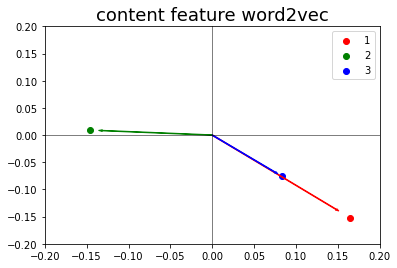

In [ ]:
# 시각화
colors = ['r', 'g', 'b']
for content, color in zip(model.wv.vocab.keys(), colors):
    vector = model.wv.get_vector(content)
    
    # 점 표시
    plt.scatter(*vector, label=content, color=color)
    
    # scaling
    vector = vector * 0.9

    # 화살표
    plt.arrow(0, 0, *vector, color=color)

plt.axvline(x=0, color='k', lw='1', alpha=0.5)
plt.axhline(y=0, color='k', lw='1', alpha=0.5)
plt.xlim(-0.2, 0.2)
plt.ylim(-0.2, 0.2)
plt.title('content feature word2vec', size=18)
plt.legend();

In [ ]:
# 임베딩 정보
content2vec = {}
for content in model.wv.vocab.keys():
    content2vec[content] = model.wv.get_vector(content)

content2vec

{'1': array([ 0.16447413, -0.15186624], dtype=float32),
 '2': array([-0.1459699 ,  0.00915644], dtype=float32),
 '3': array([ 0.0834286, -0.0758673], dtype=float32)}

In [ ]:
# 문제 임베딩 값들을 각 문제에 mapping
nested_content2vec = edu_emb_df.content.map(content2vec).values

# nested numpy array를 하나의 numpy array로 변환
content2vec_array = np.concatenate(nested_content2vec, 0).reshape(-1, 2)

# 문제 임베딩 값들을 기존 pandas DataFrame에 추가
edu_emb_df[[f'content2vec_{i + 1}' for i in range(2)]] = content2vec_array

### 🔨 외부 데이터 활용 (Data Enrichment)

> 주어진 데이터 뿐만 아니라 외부 데이터를 활용하여 데이터를 더욱 풍요롭게 만드는 방법이다. 

1. 유사한 데이터셋 활용
2. 외부 데이터를 이용하여 새로운 feature 생성

⛔ **주의사항** ⛔
1. 대회에 참여하고 있다면 외부 데이터를 활용 가능한지 꼼꼼히 규정을 체크하고 허용된다 하더라도 돌다리도 두들겨보는 심정으로 대회 주최자들에게 문의하여 사용가능 여부를 체크하자
    - 500,000$ 상금을 놓친 사례
        - [1st Place Removed Solution - Kaggle Deepfake Detection Challenge](https://www.kaggle.com/c/deepfake-detection-challenge/discussion/157983)
        - [관련된 페이스북 포스팅 - 캐글 코리아](https://www.facebook.com/groups/KaggleKoreaOpenGroup/permalink/677319223000180/)
2. 활용하고자 하는 외부 데이터의 라이센스를 체크하자


#### 1. 유사한 데이터셋 활용

> 현재 사용하고 있는 데이터셋과 매우 유사한 목적을 가진 데이터셋을 가져와 훈련에 사용하는 방법이다.


#### 2. 외부 데이터를 이용하여 새로운 feature 생성

> 범주형 feature가 있을때 사용한다. 예로 주어진 데이터셋에 책의 장르가 있지만 그 외 어떤 책과 관련된 정보가 없다고 하자. 이럴 경우 외부 데이터를 활용하여 각 장르별 판매 수, 평균 가격, 작가 수, 평균 페이지 수 등의 데이터를 모아 새로운 feature로 활용할 수 있다.

**유용한 자료**
- [The Strategy That Increases Model Accuracy, Every Time, Guaranteed - Medium](https://medium.com/analytics-vidhya/the-strategy-that-increases-model-accuracy-every-time-guaranteed-6ee5e476262d)
- [External Geospatial Data: Types and Use-cases - Medium](https://medium.com/locale-ai/external-geospatial-data-types-and-use-cases-46d54756dc10)
- [Is it in general helpful to add “external” datasets to the training dataset? - StackExchange](https://stats.stackexchange.com/questions/474621/is-it-in-general-helpful-to-add-external-datasets-to-the-training-dataset)


## 💎 모델 (Model)
- 지도학습 (Supervised Learning)
- 비지도학습 (Unsupervised Learning)
- 앙상블 (Ensemble)

**데이터에 나타나는 패턴을 학습하는 수학적 모델을 말한다**

> 데이터셋이 주어지면 해당 데이터셋에 나타나는 패턴을 학습하는 주체가 바로 모델이다. 수학적 모델을 사용하며 대표적인 것으로 딥러닝 모델이 있다. 데이터의 종류, 자신에게 주어진 자원 등 여러 요소들을 고려하여서 적합한 모델을 선정하여야 하며 정답이 없는만큼 자신의 상황에 적합한 모델을 찾는 것은 시행착오가 필요하다.

**⛔ 모델의 설명 부재 ⛔**
> 우리는 이 섹션에서 모델의 활용에 초점을 맞추고 있으므로 각 모델이 어떠한 것인지 설명하지 않을 것이며 **유용한 자료**의 글로 관련 설명을 대체한다. 만약 정보가 없을시 직접 구글링하는 것을 추천한다.

**⭐ 모델을 선택하는 방법 ⭐**
> 우리가 사용할 수 있는 모델의 종류는 정말 많다. **그렇다면 우리는 어떤 모델을 사용해야 하는 것일까?** 이에 대해 다루는 여러 글들을 읽으며 아이디어를 얻어볼 수 있다.
- [Choosing the right estimator - sklearn 공식문서](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)
- [Do you know how to choose the right machine learning algorithm among 7 different types? - Towards Data Science](https://towardsdatascience.com/do-you-know-how-to-choose-the-right-machine-learning-algorithm-among-7-different-types-295d0b0c7f60)
- [How to choose the Machine Learning model for your problem? - Medium](https://medium.com/kevit-technologies/how-to-choose-the-machine-learning-model-for-your-problem-931bea61de8a)
- [An executive’s guide to AI - McKinsey](https://www.mckinsey.com/~/media/McKinsey/Business%20Functions/McKinsey%20Analytics/Our%20Insights/An%20executives%20guide%20to%20AI/An-executives-guide-to-AI.ashx)

In [ ]:
from sklearn.model_selection import train_test_split

# class int로 변환
iris_df['class'] = iris_df['class'].astype('category').cat.codes
iris_df.sample(5)

X = iris_df.iloc[:, :-1]
y = iris_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)


### 💍 지도학습 (Supervised Learning)

1. 머신러닝 (Machine Learning)
2. 딥러닝 (Deep Learning)

**유용한 자료**
- [Why Deep Learning over Traditional Machine Learning? - Towards Data Science](https://towardsdatascience.com/why-deep-learning-is-needed-over-traditional-machine-learning-1b6a99177063)
- [When Does Deep Learning Work Better Than SVMs or Random Forests? - KDnuggets](https://www.kdnuggets.com/2016/04/deep-learning-vs-svm-random-forest.html)

#### 1. 머신러닝 (Machine Learning)
- 선형 회귀 (Linear Regression)
- 로지스틱 회귀 (Logistic Regression)
- 의사결정나무 (Decision Tree)
- 나이브베이즈 (Naive Bayes)
- 선형판별분석법 (LDA, Linear Discriminant Analysis)
- 이차판별분석법 (QDA, Quadratic Discriminant Analysis)
- 서포트 벡터 머신 (SVM, Support Vector Machine)
- 가우시안 프로세스 (Gaussian Process)

**유용한 자료**
- [Gentle Introduction to the Bias-Variance Trade-Off in Machine Learning - Machine Learning Mastery](https://machinelearningmastery.com/gentle-introduction-to-the-bias-variance-trade-off-in-machine-learning/)

##### 선형 회귀 (Linear Regression)
> 데이터 간의 선형 상관관계를 분석하는 회귀 모델

- [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- [sklearn.metrics.mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)

**유용한 자료**
- [Linear Regression, Detailed View - Towards Data Science](https://towardsdatascience.com/linear-regression-detailed-view-ea73175f6e86)
- [회귀 모델에서 '회귀'란 무엇인가? - 브런치](https://brunch.co.kr/@gimmesilver/17)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression().fit(X_train, y_train)
predict = model.predict(X_test)

mean_squared_error(y_test, predict)

0.07841979287727499

##### 로지스틱 회귀 (Logistic Regression)
> 데이터 간의 선형 상관관계를 분석하는 분류 모델

- [sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- [sklearn.metrics.accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

**유용한 자료**
- [로지스틱 회귀 - ratsgo's blog](https://ratsgo.github.io/machine%20learning/2017/04/02/logistic/)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression().fit(X_train, y_train)
predict = model.predict(X_test)

accuracy_score(y_test, predict)

0.8947368421052632

##### 의사결정나무 (Decision Tree)
> 머신러닝계의 스무고개

- [sklearn.tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
- [sklearn.metrics.accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier().fit(X_train, y_train)
predict = model.predict(X_test)

accuracy_score(y_test, predict)

0.9210526315789473

##### 나이브베이즈 (Naive Bayes)
> 순진하다는 의미의 Naive를 이름으로 둔, feature들은 서로 모두 조건부 독립이라는 순진한 가정을 바탕으로 생성 모델(Generative model)과 베이즈 정리(Bayes' theorem)을 사용한 분류 모델. 각 feature들의 확률분포로 어떤 분포를 사용하느냐에 따라 다른 나이브 베이즈 모델이 된다. 
<br><br>
아래 링크로 들어가면 `sklearn 0.24.1`버젼 기준 5개의 모델이 존재한다. 우리가 사용하는 **iris 데이터셋**은 feature들이 실수이므로 `GaussianNB`를 사용할 것이다.

- [sklearn.naive_bayes](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes)
- [sklearn.naive_bayes.GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB)
- [sklearn.metrics.accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

**유용한 자료**
- [What’s so naive about naive Bayes’? - Towards Data Science](https://towardsdatascience.com/whats-so-naive-about-naive-bayes-58166a6a9eba)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

model = GaussianNB().fit(X_train, y_train)
predict = model.predict(X_test)

accuracy_score(y_test, predict)

0.868421052631579

##### 선형판별분석법 (LDA, Linear Discriminant Analysis)
> PCA관점에서 해석하면, 클래스간의 거리를 최대화 클래스 안의 분산을 최소화이다. 나이브 베이즈의 관점에서 해석하면, feature들간에 조건부 독립이 더이상 아니며 상관관계가 있다고 가정하여 다변수정규분포로 feature들의 분포를 표현한다. 다만 각 클래스별로 다변수정규분포를 추정하는데, 이때 각 다변수정규분포의 공분산은 동일하다고 가정한다.

- [sklearn.discriminant_analysis.LinearDiscriminantAnalysis](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)
- [sklearn.metrics.accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

**유용한 자료**
- [선형판별분석(Linear Discriminant Analysis) - ratsgo's blog](https://ratsgo.github.io/machine%20learning/2017/03/21/LDA/)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

model = LinearDiscriminantAnalysis().fit(X_train, y_train)
predict = model.predict(X_test)

accuracy_score(y_test, predict)

0.9473684210526315

##### 이차판별분석법 (QDA, Quadratic Discriminant Analysis)
> LDA에서는 각 클래스별로 다변수정규분포를 추정하는데, 이때 각 다변수정규분포의 공분산은 동일하다고 가정했다. QDA에서는 이 공분산이 각 다변수정규분포마다 다르다고 가정한다.

- [sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html)
- [sklearn.metrics.accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

**유용한 자료**
- [[Data Analysis 개념] LDA와 QDA의 이해 - SH의 학습노트](https://todayisbetterthanyesterday.tistory.com/25)

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

model = QuadraticDiscriminantAnalysis().fit(X_train, y_train)
predict = model.predict(X_test)

accuracy_score(y_test, predict)

0.9736842105263158

##### 서포트 벡터 머신 (SVM, Support Vector Machine)
> 서포트 벡터라고 불리는 데이터를 기준으로 마진이 가장 큰 결정 경계(Decision boundary) 혹은 초평면(hyperplane)을 찾아 활용하는 모델이다.

- [sklearn.svm](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm)
- [sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

**유용한 자료**
- [Support Vector Machine — Introduction to Machine Learning Algorithms - Towards Data Science](https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model = SVC(kernel='linear').fit(X_train, y_train)
predict = model.predict(X_test)

accuracy_score(y_test, predict)

0.9736842105263158

##### 가우시안 프로세스 (Gaussian Process)

- [sklearn.gaussian_process](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.gaussian_process)
- [sklearn.gaussian_process.GaussianProcessClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessClassifier.html#sklearn.gaussian_process.GaussianProcessClassifier)

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.metrics import accuracy_score

model = GaussianProcessClassifier().fit(X_train, y_train)
predict = model.predict(X_test)

accuracy_score(y_test, predict)

0.868421052631579

#### 2. 딥러닝 (Deep Learning)

- TabNet

##### TabNet
> 정형 데이터를 위한 설명 가능한 딥러닝 모델을 구축한 것이 tabnet이다. Attention을 활용한 feature selection과 선택된 feature를 통한 예측을 여러번 반복하여 최종 결론을 이끌어낸다. `Mechanisms of Action (MoA) Prediction` 캐글 대회에서 TabNet이 상위권 솔루션으로 많이 사용되었다.


**유용한 자료**
- [Modelling tabular data with Google’s TabNet - Towards Data Science](https://towardsdatascience.com/modelling-tabular-data-with-googles-tabnet-ba7315897bfb)
- [TabNet: Attentive Interpretable Tabular Learning - arXiv](https://arxiv.org/abs/1908.07442)
- [tabnet 공식문서](https://dreamquark-ai.github.io/tabnet/)
- [Mechanisms of Action (MoA) Prediction - Kaggle](https://www.kaggle.com/c/lish-moa/discussion)

In [ ]:
# 설치
!pip install -q pytorch-tabnet

In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor
from sklearn.metrics import accuracy_score

model = TabNetClassifier()

# 다른 sklearn모델과는 다르게 pandas에서 numpy로 형변환이 필요하다
model.fit(X_train.values, y_train.values)
predict = model.predict(X_test.values)

accuracy_score(y_test, predict)

Device used : cpu
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 1.75566 |  0:00:00s
epoch 1  | loss: 1.1882  |  0:00:00s
epoch 2  | loss: 0.78681 |  0:00:00s
epoch 3  | loss: 0.60417 |  0:00:00s
epoch 4  | loss: 0.48047 |  0:00:00s
epoch 5  | loss: 0.41362 |  0:00:00s
epoch 6  | loss: 0.37001 |  0:00:00s
epoch 7  | loss: 0.31126 |  0:00:00s
epoch 8  | loss: 0.26227 |  0:00:00s
epoch 9  | loss: 0.20733 |  0:00:00s
epoch 10 | loss: 0.16787 |  0:00:00s
epoch 11 | loss: 0.1331  |  0:00:00s
epoch 12 | loss: 0.11056 |  0:00:00s
epoch 13 | loss: 0.09157 |  0:00:00s
epoch 14 | loss: 0.07735 |  0:00:00s
epoch 15 | loss: 0.06849 |  0:00:00s
epoch 16 | loss: 0.06149 |  0:00:00s
epoch 17 | loss: 0.05509 |  0:00:00s
epoch 18 | loss: 0.04884 |  0:00:00s
epoch 19 | loss: 0.04191 |  0:00:00s
epoch 20 | loss: 0.04128 |  0:00:00s
epoch 21 | loss: 0.03763 |  0:00:00s
epoch 22 | loss: 0.03201 |  0:00:00s
epoch 23 | loss: 0.03083 |  0:00:00s
epoch 24 | loss: 0.02

0.6052631578947368

### 💍 비지도학습 (Unsupervised Learning)

1. 클러스터링 (Clustering)
2. 차원축소 (Dimension Reduction)
3. 다양체 (Manifold)

#### 1. 클러스터링 (Clustering)
> 클러스터링은 자동으로 데이터를 그룹으로 분류해준다. 데이터의 형태와 목적에 따라 효과적인 클러스터링 알고리즘은 각각 달라지므로 적절한 클러스터링 알고리즘을 사용

- K-평균 (K-means)
- 디비스캔 (DBSCAN)
- 계층적 (Hierachical)

**유용한 자료**
- [Clustering - sklearn 공식문서](https://scikit-learn.org/stable/modules/clustering.html)
- [Three Popular Clustering Methods and When to Use Each - Medium](https://medium.com/predict/three-popular-clustering-methods-and-when-to-use-each-4227c80ba2b6)

In [ ]:
# 클러스터링 시각화를 위해 2개의 feature만 사용한다
X_cluster = X_train.iloc[:, :2]
y_cluster = y_train

##### K-평균 (K-means)
> 대표적인 클러스터링 알고리즘이다. 워낙 유명한만큼 설명은 생략한다. 여기서 사용한 `조정 랜드지수`는 클러스터링 알고리즘의 성능을 평가하는 방법중 하나이다.

- [sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
- [sklearn.metrics.adjusted_rand_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)

**유용한 자료**
- [K-means Clustering: Algorithm, Applications, Evaluation Methods, and Drawbacks - Towards Data Science](https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a)

adjusted rand score is 0.6524201764837936



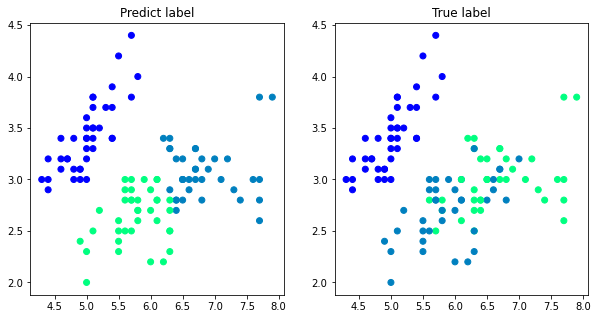

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score

model = KMeans(n_clusters=3)
predict = model.fit_predict(X_cluster)

# 조정 랜드지수
print(f'adjusted rand score is {adjusted_rand_score(predict, y_cluster)}\n')

# 예측 분류
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Predict label')
plt.scatter(x=X_cluster.iloc[:, 0],
            y=X_cluster.iloc[:, 1],
            c=predict,
            cmap='winter')

plt.subplot(1, 2, 2)
plt.title('True label')
plt.scatter(x=X_cluster.iloc[:, 0],
            y=X_cluster.iloc[:, 1],
            c=y_cluster,
            cmap='winter')
plt.show()

##### 디비스캔 (DBSCAN)
> DBSCAN은 Density-Based Spatial Clustering of Applications with Noise의 약자로 데이터의 밀도를 기반으로 클러스터링을 한다. K-means와는 다르게 그룹의 갯수를 사용자가 지정할 필요가 없다.

- [sklearn.cluster.DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)

**유용한 자료**
- [How DBSCAN works and why should we use it? - Towards Data Science](https://towardsdatascience.com/how-dbscan-works-and-why-should-i-use-it-443b4a191c80)

adjusted rand score is 0.5776446026524881



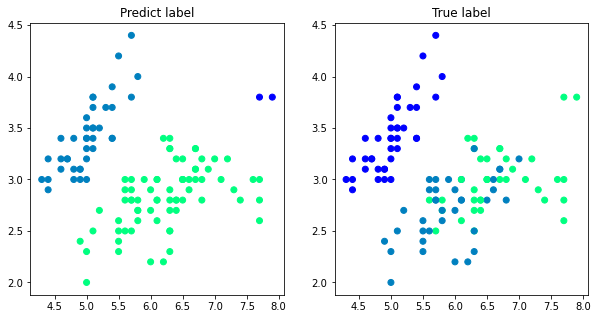

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics.cluster import adjusted_rand_score

model = DBSCAN(eps=0.35, min_samples=3)
predict = model.fit_predict(X_cluster)

# 조정 랜드지수
print(f'adjusted rand score is {adjusted_rand_score(predict, y_cluster)}\n')

# 예측 분류
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Predict label')
plt.scatter(x=X_cluster.iloc[:, 0],
            y=X_cluster.iloc[:, 1],
            c=predict,
            cmap='winter')

plt.subplot(1, 2, 2)
plt.title('True label')
plt.scatter(x=X_cluster.iloc[:, 0],
            y=X_cluster.iloc[:, 1],
            c=y_cluster,
            cmap='winter')
plt.show()

##### 계층적 (Hierachical)
> 모든 데이터가 하나의 그룹을 형성하는 것에서 출발해 서로 가까운 그룹끼리 합쳐지면서 하나의 그룹이 된다. 흩뿌려진 빗방울이 서로간에 합쳐지는 모습을 연상하면 이해가 쉽다.

- [sklearn.cluster.AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

**유용한 자료**
- [Understanding the concept of Hierarchical clustering Technique - Towards Data Science](https://towardsdatascience.com/understanding-the-concept-of-hierarchical-clustering-technique-c6e8243758ec)

adjusted rand score is 0.6008969579857381



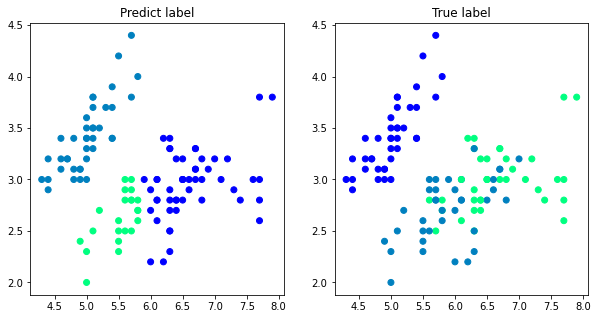

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import adjusted_rand_score

model = AgglomerativeClustering(n_clusters=3)
predict = model.fit_predict(X_cluster)

# 조정 랜드지수
print(f'adjusted rand score is {adjusted_rand_score(predict, y_cluster)}\n')

# 예측 분류
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Predict label')
plt.scatter(x=X_cluster.iloc[:, 0],
            y=X_cluster.iloc[:, 1],
            c=predict,
            cmap='winter')

plt.subplot(1, 2, 2)
plt.title('True label')
plt.scatter(x=X_cluster.iloc[:, 0],
            y=X_cluster.iloc[:, 1],
            c=y_cluster,
            cmap='winter')
plt.show()

#### 2. 차원축소 (Dimension Reduction)

- PCA (Principal Component Analysis)

##### PCA (Principal Component Analysis)

- [sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

**유용한 자료**
- [차원 축소 - PCA, 주성분분석 - excelsior-chj 티스토리 블로그](https://excelsior-cjh.tistory.com/167)

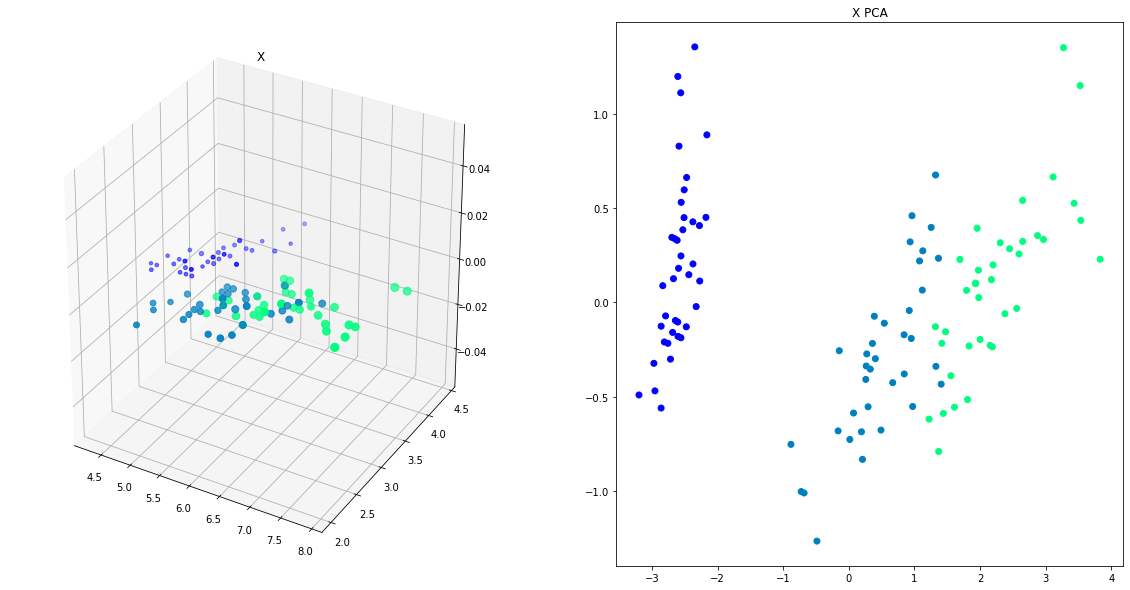

In [ ]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

model = PCA(n_components=2)
X_pca = model.fit_transform(X_train)

# 시각화
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1, projection='3d')
plt.title('X')
plt.scatter(X_train.iloc[:, 0],
            X_train.iloc[:, 1],
            X_train.iloc[:, 2]*10,
            c=y_train,
            cmap='winter')

plt.subplot(1, 2, 2)
plt.title('X PCA')
plt.scatter(x=X_pca[:, 0],
            y=X_pca[:, 1],
            c=y_train,
            cmap='winter')
plt.show()

#### 3. 다양체 (Manifold)
> PCA와 같은 선형 차원 축소(Dimention Reduction)로는 비선형 데이터를 잘 분리해내지 못한다. 하지만 다양체(manifold)를 찾아서 이를 통한 비선형 변환을 할 경우 복잡한 고차원 데이터를 저차원 데이터로 표현하면서도 데이터의 중요한 정보들을 잘 보존한다.

- Isomap
- t-SNE (t-Stochastic Neightbor Embedding)

**유용한 자료**
- [Manifold learning - sklearn 공식문서](https://scikit-learn.org/stable/modules/manifold.html)
- [Manifolds in Data Science — A Brief Overview - Towards Data Science](https://towardsdatascience.com/manifolds-in-data-science-a-brief-overview-2e9dde9437e5)
- [비선형 차원 축소(Nonliear Mapping) - woosikyang 깃헙 블로그](https://woosikyang.github.io/first-post.html)

##### Isomap

- [sklearn.manifold.Isomap](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html#sklearn.manifold.Isomap)

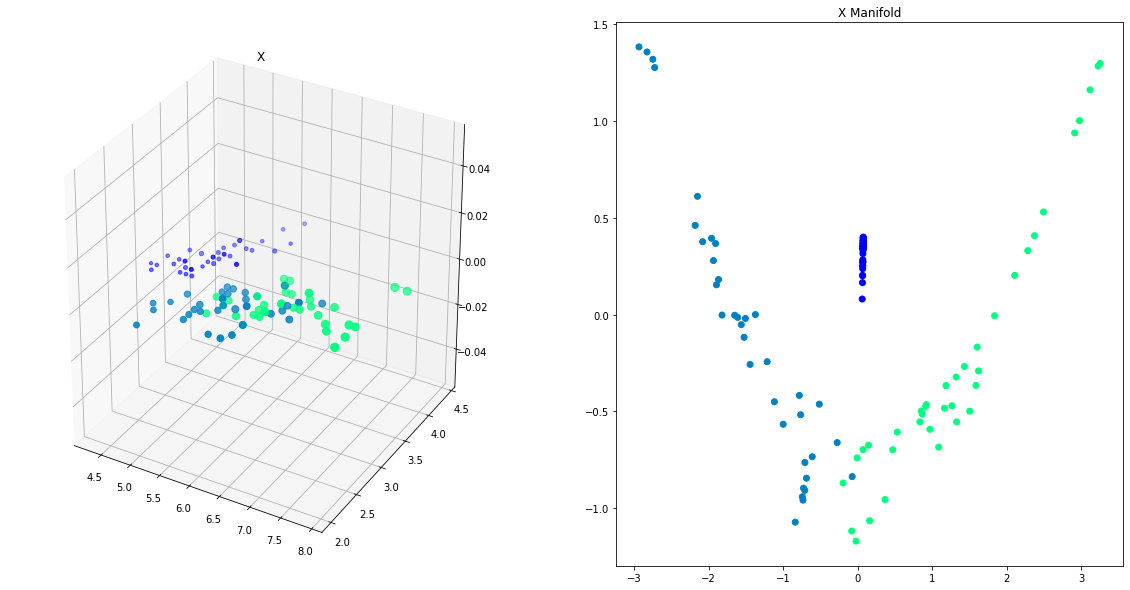

In [ ]:
from sklearn.manifold import Isomap
from mpl_toolkits.mplot3d import Axes3D

model = Isomap(n_components=2)
X_manifold = model.fit_transform(X_train)

# 시각화
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1, projection='3d')
plt.title('X')
plt.scatter(X_train.iloc[:, 0],
            X_train.iloc[:, 1],
            X_train.iloc[:, 2]*10,
            c=y_train,
            cmap='winter')

plt.subplot(1, 2, 2)
plt.title('X Manifold')
plt.scatter(x=X_manifold[:, 0],
            y=X_manifold[:, 1],
            c=y_train,
            cmap='winter')
plt.show()

##### t-SNE (t-Stochastic Neightbor Embedding)

- [sklearn.manifold.TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)

**유용한 자료**
- [How to Use t-SNE Effectively
](https://distill.pub/2016/misread-tsne/)


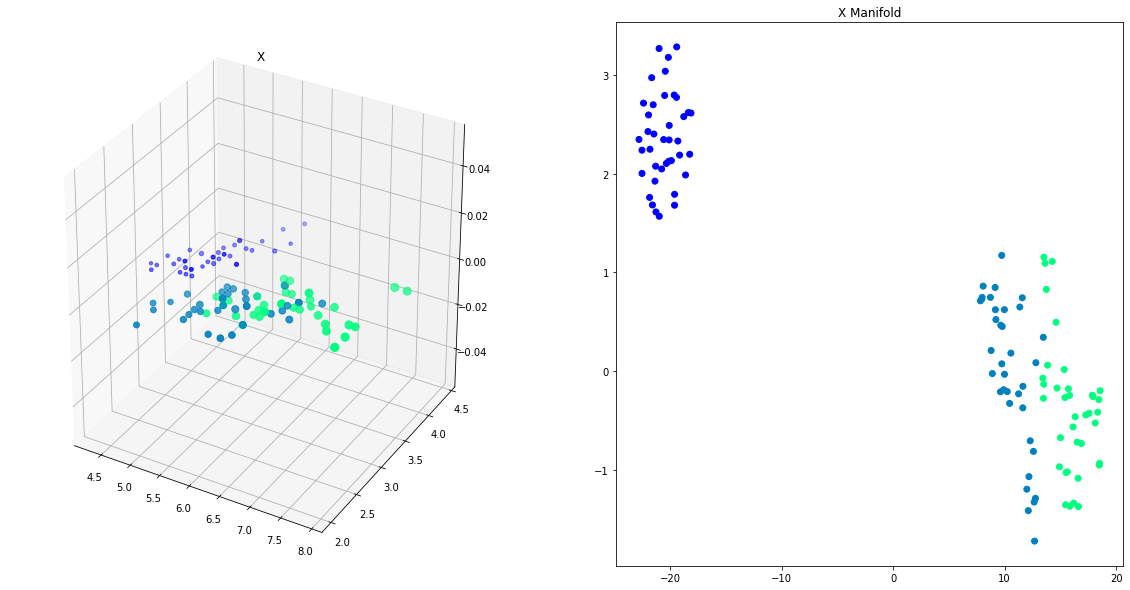

In [ ]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

model = TSNE(n_components=2)
X_manifold = model.fit_transform(X_train)

# 시각화
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1, projection='3d')
plt.title('X')
plt.scatter(X_train.iloc[:, 0],
            X_train.iloc[:, 1],
            X_train.iloc[:, 2]*10,
            c=y_train,
            cmap='winter')

plt.subplot(1, 2, 2)
plt.title('X Manifold')
plt.scatter(x=X_manifold[:, 0],
            y=X_manifold[:, 1],
            c=y_train,
            cmap='winter')
plt.show()


### 💍 앙상블 (Ensemble)

1. 보팅 (Voting)
2. 배깅 (Bagging)
3. 부스팅 (Boosting)
4. 스태킹 (Stacking)

#### 1. 보팅 (Voting)
> 여러 모델이 의사결정을 내리고 다수의 선택을 최종 선택하는 방법이다

- ⭐ 보팅 (Voting)이 좋은 이유 ⭐
- 하드 보팅 (Hard Voting)
- 소프트 보팅 (Soft Voting)

**유용한 자료**
- [hard voting versus soft voting in ensemble based methods - Stack Exchange](https://stats.stackexchange.com/questions/320156/hard-voting-versus-soft-voting-in-ensemble-based-methods)

##### **⭐ 보팅 (Voting)이 좋은 이유 ⭐**
> 왜 모델 하나보다 모델을 여러개 사용하는 것이 더 좋을까? 각각의 모델이 정답을 출력할 확률을 p로 가정하고, 서로 독립적이고 다른 모델을 N개 모아서 보팅(Voting)을 할 경우 정답을 출력할 확률을 확인해보자.

$$\sum_{k>\frac{N}{2}}^N \binom N k p^k (1-p)^{N-k}$$

**참고자료**
- [모형결합, 모형 결합을 사용한 성능 향상 - 데이터 사이언스 스쿨](https://datascienceschool.net/03%20machine%20learning/12.02%20%EB%AA%A8%ED%98%95%20%EA%B2%B0%ED%95%A9.html)

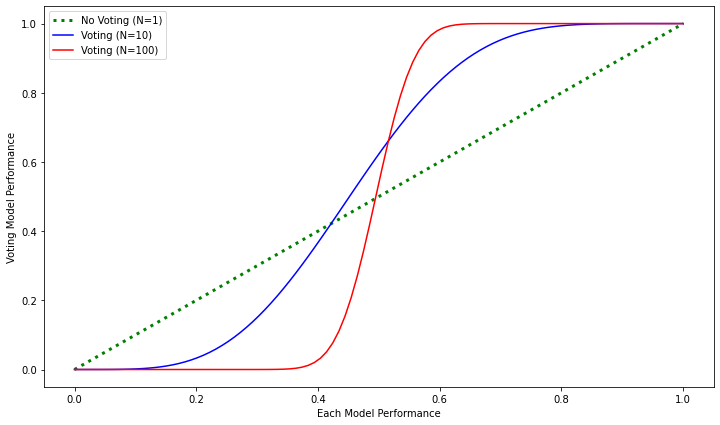

In [ ]:
# 출처 - https://datascienceschool.net/03%20machine%20learning/12.02%20%EB%AA%A8%ED%98%95%20%EA%B2%B0%ED%95%A9.html
from scipy.special import comb

def total_correct(p, N):
    correct_prob = 0.0

    # 모델 중 최소 절반 이상이 정답을 맞출 확률
    for k in range(int(np.ceil(N/2)), N + 1):
        correct_prob += comb(N, k) * p**k * (1-p)**(N-k)
    return correct_prob

p = np.linspace(0, 1, 100)

plt.figure(figsize=(12, 7))
plt.plot(p, p, 'g:', lw=3, label="No Voting (N=1)")
plt.plot(p, total_correct(p, 10), 'b-', label="Voting (N=10)")
plt.plot(p, total_correct(p, 100), 'r-', label="Voting (N=100)")
plt.xlabel("Each Model Performance")
plt.ylabel("Voting Model Performance")
plt.legend(loc=0)
plt.show()

##### 하드 보팅 (Hard Voting)

```python
VotingClassifier(estimators=[('model_name', model), ... ], voting='hard')
```

- [sklearn.ensemble.VotingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html)

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# model 1 - 로지스틱 회귀
model = LogisticRegression().fit(X_train, y_train)
predict = model.predict(X_test)
logistic_score = accuracy_score(y_test, predict)

# model 2 - 의사결정나무
model = DecisionTreeClassifier().fit(X_train, y_train)
predict = model.predict(X_test)
tree_score = accuracy_score(y_test, predict)

# model 3 - 가우시안 나이브 베이즈
model = GaussianNB().fit(X_train, y_train)
predict = model.predict(X_test)
naive_score = accuracy_score(y_test, predict)

# 하드 보팅
logistic = LogisticRegression()
tree = DecisionTreeClassifier()
naive = GaussianNB()

estimators = [('logistic', logistic),
              ('tree', tree),
              ('naive', naive)]
hard_vote = VotingClassifier(estimators=estimators, voting='hard')
hard_vote.fit(X_train, y_train)
predict = hard_vote.predict(X_test)
hard_vote_score = accuracy_score(y_test, predict)

print(f"Logistic Regression accuracy : {logistic_score}")
print(f"Decision Tree accuracy : {tree_score}")
print(f"naive accuracy : {naive_score}")
print(f"Hard Voting of 3 model accuracy : {hard_vote_score}")

Logistic Regression accuracy : 0.8947368421052632
Decision Tree accuracy : 0.8947368421052632
naive accuracy : 0.868421052631579
Hard Voting of 3 model accuracy : 0.8947368421052632


##### 소프트 보팅 (Soft Voting)

```python
VotingClassifier(estimators=[('model_name', model), ... ], voting='soft')
```

- [sklearn.ensemble.VotingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html)

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# model 1 - 로지스틱 회귀
model = LogisticRegression().fit(X_train, y_train)
predict = model.predict(X_test)
logistic_score = accuracy_score(y_test, predict)

# model 2 - 의사결정나무
model = DecisionTreeClassifier().fit(X_train, y_train)
predict = model.predict(X_test)
tree_score = accuracy_score(y_test, predict)

# model 3 - 가우시안 나이브 베이즈
model = GaussianNB().fit(X_train, y_train)
predict = model.predict(X_test)
naive_score = accuracy_score(y_test, predict)

# 소프트 보팅
logistic = LogisticRegression()
tree = DecisionTreeClassifier()
naive = GaussianNB()

estimators = [('logistic', logistic),
              ('tree', tree),
              ('naive', naive)]
soft_vote = VotingClassifier(estimators=estimators, voting='soft')
soft_vote.fit(X_train, y_train)
predict = soft_vote.predict(X_test)
soft_vote_score = accuracy_score(y_test, predict)

print(f"Logistic Regression accuracy : {logistic_score}")
print(f"Decision Tree accuracy : {tree_score}")
print(f"naive accuracy : {naive_score}")
print(f"Soft Voting of 3 model accuracy : {soft_vote_score}")

Logistic Regression accuracy : 0.8947368421052632
Decision Tree accuracy : 0.9210526315789473
naive accuracy : 0.868421052631579
Soft Voting of 3 model accuracy : 0.8947368421052632


#### 2. 배깅 (Bagging)

> 투표(voting) 방식을 사용할 때 서로 다른 모델들을 사용하기에는 모델 종류에 한계가 존재한다. 하지만 그렇다고 같은 모델을 사용한다면 모델간의 독립성이 보장되지 않는다. 그래서 같은 모델을 사용하되 데이터셋에서 데이터를 랜덤하게 선택하여 서로 다른 모델을 여러개 만들어 투표(voting)로 최종 결정을 내린다.

⭐ 데이터 랜덤 선택 방법 ⭐
> 부트스트래핑(Bootstrapping)과 비슷하게 데이터를 선택한다. 이때 데이터셋의 샘플(sample) 혹은 feature를 랜덤하게 선택할 수 있고, 샘플(sample) 선택시 중복을 허용하거나 허용하지 않을수도 있다.
- 배깅 (Bagging) : 같은 데이터 샘플 중복사용(replacement)
- 패스팅 (Pasting) : 같은 데이터 샘플 중복사용(replacement) 안함  
- 랜덤 부분공간 (Random Subspace) : feature들 중 일부만 사용
- 랜덤 패치 (Random Patches) : 데이터 & feature 둘다 일부만 사용

- 배깅 분류기 (Bagging Classifier)
- 랜덤 포레스트 (Random Forest)
- 엑스트라 트리 (Extra Tree)

**참고 자료**
- [모형결합, 배깅 - 데이터 사이언스 스쿨](https://datascienceschool.net/03%20machine%20learning/12.02%20%EB%AA%A8%ED%98%95%20%EA%B2%B0%ED%95%A9.html)

**유용한 자료**
- [How does ExtraTreesClassifier reduce the risk of overfitting? - Medium](https://medium.com/@namanbhandari/extratreesclassifier-8e7fc0502c7)

##### 배깅 분류기 (Bagging Classifier)
> 배깅 분류기(Bagging Classifier)를 이용해 다음의 4가지 데이터 선택법을 사용해보자!

- 배깅 (Bagging)
- 패스팅 (Pasting)
- 랜덤 부분공간 (Random Subspace)
- 랜덤 패치 (Random Patches)


- [sklearn.ensemble.BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# 랜덤 seed
random_seed = 42

# 배깅 (Bagging) : 같은 데이터 샘플 중복사용(replacement)
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=50),
                            n_estimators=100,
                            bootstrap=True,
                            max_samples=0.5,
                            bootstrap_features=False,
                            max_features=1.0,
                            random_state=random_seed)

# 패스팅 (Pasting) : 같은 데이터 샘플 중복사용(replacement) 안함
pasting = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=50),
                            n_estimators=100,
                            bootstrap=False,
                            max_samples=0.5,
                            bootstrap_features=False,
                            max_features=1.0,
                            random_state=random_seed)

# 랜덤 부분공간 (Random Subspace) : feature들 중 일부만 사용
subspace = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=50),
                             n_estimators=100,
                             bootstrap=False,
                             max_samples=1.0,
                             bootstrap_features=True,
                             max_features=0.5,
                             random_state=random_seed)

# 랜덤 패치 (Random Patches) : 데이터 & feature 둘다 일부만 사용
patch = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=50),
                          n_estimators=100,
                          bootstrap=True,
                          max_samples=0.5,
                          bootstrap_features=True,
                          max_features=0.5,
                          random_state=random_seed)

model_types = ['bagging', 'pasting', 'random subspace', 'random patches']
models = [bagging, pasting, subspace, patch]

predicts = []
for model in models:
    model.fit(X_train, y_train)
    predicts.append(model.predict(X_test))

for model_type, predict in zip(model_types, predicts):
    score = accuracy_score(y_test, predict)
    print(f'{model_type} accuracy : {score}')

bagging accuracy : 0.9210526315789473
pasting accuracy : 0.8947368421052632
random subspace accuracy : 0.9210526315789473
random patches accuracy : 0.8947368421052632


**랜덤 패치 (Random Patches)**
> 데이터 & feature 둘다 일부만 사용

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier



model.fit(X_train, y_train)
predict = model.predict(X_test)

accuracy_score(y_test, predict)

0.8947368421052632

##### 랜덤 포레스트 (Random Forest)
> 랜덤 부분공간(Random Subspace)를 사용하여 트리(Tree)를 여러개 만든다. 다시 말해 트리 모델을 하나 추가할때마다 사용할 feature들을 랜덤으로 선택한다.
- [sklearn.ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier().fit(X_train, y_train)
predict = model.predict(X_test)

accuracy_score(y_test, predict)

0.8947368421052632

##### 엑스트라 트리 (Extra Tree)

> 랜덤 포레스트에서 동일한 feature들을 포함하는 2개 이상의 모델들의 greedy한 의사결정에 의해 서로간에 상관관계가 강한 모델들이 나온다.<br><br>
**이를 방지하기 위해 랜덤하게 feature들을 선택하는 과정인 랜덤 부분공간(Random Subspace) 을 모델마다가 아니라 노드마다 시행하며, 여기에서 선택된 feature들 중에서 분류 기준으로 사용할 feature를 랜덤하게 선택**한다. 이를 `익스트림 랜덤 트리(Extremely Randomized Tree)`라고 부르기도 한다.

- [sklearn.ensemble.ExtraTreesClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

model = ExtraTreesClassifier().fit(X_train, y_train)
predict = model.predict(X_test)

accuracy_score(y_test, predict)

0.8947368421052632

#### 3. 부스팅 (Boosting)
> 보팅(Voting)의 경우 모델간의 독립성이 중요하다. 하지만 부스팅(Boosting)의 경우 모델은 서로 독립이 아니다. 서로가 서로의 부족한 면을 채워줌으로서 더 나은 결정을 내리고자 하며 성능 분산(Variance)를 줄이는 배깅(Bagging)과는 다르게 편향(Bias)을 줄인다.

- 에이다 부스트 (AdaBoost)
- 그래디언트 부스트 (Gradient Boost)

**⭐ 베이스 모델 ⭐**
> **의사결정나무(Decision Tree)가 부스팅 앙상블에서 베이스 모델로 가장 자주 사용된다**
- `에이다 부스트 (AdaBoost)` : 깊이가 1인 의사결정나무가 default이며 다른 모델을 사용할 수 있다.
- `그래디언트 부스트 (Gradient Boost)` : ⛔ **의사결정나무"만" 사용된다!** ⛔

**유용한 자료**
- [A Quick Guide to Boosting in ML - Medium](https://medium.com/greyatom/a-quick-guide-to-boosting-in-ml-acf7c1585cb5)


##### 에이다 부스트 (AdaBoost)
> 이전에 생성되었던 모델들이 잘 맞추는 데이터는 학습시 가중치를 덜 주고, 못 맞추는 데이터는 학습시 가중치를 더 부여하는 방식으로 다음 모델을 순차적으로 만들어 다함께 활용한다. 여기서 생성된 모델들의 집합을 가리켜 committee라고 하며 다음 모델을 학습할 때 어떤 데이터에 가중치를 더 주고 조금 줄지는 그 전까지 생성되었던 모델들의 집합인 committee에서 어떤 데이터를 맞추고 못맞추느냐로 결정된다.

- [sklearn.ensemble.AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)

**유용한 자료**
- [The Ultimate Guide to AdaBoost Algorithm | What is AdaBoost Algorithm? - Great Learning](https://www.mygreatlearning.com/blog/adaboost-algorithm/)
- [Adaboost(에이다부스트) - ekdud7667 티스토리 블로그](https://ekdud7667.tistory.com/entry/Adaboost%EC%97%90%EC%9D%B4%EB%8B%A4%EB%B6%80%EC%8A%A4%ED%8A%B8)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

model = AdaBoostClassifier(n_estimators=100).fit(X_train, y_train)
predict = model.predict(X_test)

accuracy_score(y_test, predict)

0.9473684210526315

##### 그래디언트 부스트 (Gradient Boost)
> 이전에 생성되었던 모델들이 예측한 값과 실제 값의 차이인 잔차(residual)를 학습하는 방식으로 다음 모델을 순차적으로 만들어 다함께 활용한다. 다음 모델을 학습할 때 사용할 각 데이터의 잔차(residual)는 그 전까지 생성되었던 모델들의 집합인 committee에서 예측한 값과 실제 값의 차이다.

- 그래디언트 부스팅 분류기 (Gradient Boosting Classifier)
- XGBoost (Extreme Gradient Boosting)
- LGBM (Light Gradient Boosting Machine)
- CatBoost (Categorical Boost)


**유용한 자료**
- [Demystifying gradient boosting - Towards Data Science](https://towardsdatascience.com/simplifying-gradient-boosting-5dcd934e9c76)
- [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning - Machine Learing Mastery](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)
- [XGBoost, LightGBM or CatBoost — which boosting algorithm should I use? - Medium](https://medium.com/riskified-technology/xgboost-lightgbm-or-catboost-which-boosting-algorithm-should-i-use-e7fda7bb36bc)

###### 그래디언트 부스팅 분류기 (Gradient Boosting Classifier)


- [sklearn.ensemble.GradientBoostingClassifier
](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html?highlight=gradient%20boost#sklearn.ensemble.GradientBoostingClassifier)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

model = GradientBoostingClassifier(n_estimators=100).fit(X_train, y_train)
predict = model.predict(X_test)

accuracy_score(y_test, predict)

0.868421052631579

###### XGBoost (Extreme Gradient Boosting)

**유용한 자료**
- [XGBoost Algorithm: Long May She Reign! - Towards Data Science](https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d)

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model = XGBClassifier().fit(X_train, y_train)
predict = model.predict(X_test)

accuracy_score(y_test, predict)

0.868421052631579

###### LGBM (Light Gradient Boosting Machine)

**유용한 자료**
- [A Quick Guide to the LightGBM Library - Towards Data Science](https://towardsdatascience.com/a-quick-guide-to-lightgbm-library-ef5385db8d10)
- [What is LightGBM, How to implement it? How to fine tune the parameters? - Medium](https://medium.com/@pushkarmandot/https-medium-com-pushkarmandot-what-is-lightgbm-how-to-implement-it-how-to-fine-tune-the-parameters-60347819b7fc)

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

model = LGBMClassifier().fit(X_train, y_train)
predict = model.predict(X_test)

accuracy_score(y_test, predict)

0.868421052631579

###### CatBoost (Categorical Boost)

**유용한 자료**
- [Mastering The New Generation of Gradient Boosting - Towards Data Science](https://towardsdatascience.com/https-medium-com-talperetz24-mastering-the-new-generation-of-gradient-boosting-db04062a7ea2)

In [ ]:
!pip install -q catboost

     |████████████████████████████████| 67.3MB 55kB/s 


In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

model = CatBoostClassifier(verbose=False).fit(X_train, y_train)
predict = model.predict(X_test)

accuracy_score(y_test, predict)

0.8947368421052632

#### 4. 스태킹 (Stacking)

- OOF (Out Of Fold) Stacking



##### OOF (Out Of Fold) Stacking
> KFold에서 각 Fold마다 train set을 활용하여 모델을 훈련시키고 validation set을 예측한 값을 모두 모아서 합치면 이를 OOf(Out Of Fold)라고 부른다. 모델마다 하나의 OOF를 생성할 수 있는데 모델들이 생성한 OOF들을 모두 모아서(Stacking) 이 데이터를 활용해 meta learning을 하는 것을 `OOF (Out Of Fold) Stacking`이라고 부른다.

- 머신러닝을 위한 `vecstack` 라이브러리
- 딥러닝을 위한 `oof stacking ensemble class` 구축


**유용한 자료**
- [What is OOF approach in machine learning? - Stack Overflow](https://stackoverflow.com/questions/52396191/what-is-oof-approach-in-machine-learning)


###### 머신러닝을 위한 `vecstack` 라이브러리
> 머신러닝 모델을 사용하여 **oof stacking**을 한다면 `vecstack`라이브러리를 활용하여 매우 간단하게 할 수 있다

**유용한 자료**
- [Automate Stacking In Python - Towards Data Science](https://towardsdatascience.com/automate-stacking-in-python-fc3e7834772e)

In [ ]:
!pip install -q vecstack

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

from vecstack import stacking


### xgboost 단일 모델
model = XGBClassifier().fit(X_train, y_train)
predict = model.predict(X_test)

single_score = accuracy_score(y_test, predict)


# 출처 - https://towardsdatascience.com/automate-stacking-in-python-fc3e7834772e
### oof stacking
models = [KNeighborsClassifier(),
          RandomForestClassifier(),
          XGBClassifier()]

# 1st level training
S_train, S_test = stacking(models, X_train, y_train, X_test,
                           n_folds=5, stratified=True, shuffle=True)

# 2nd level training
meta_model = XGBClassifier(n_estimators=100, max_depth=3)
meta_model.fit(S_train, y_train)

predict = meta_model.predict(S_test)
stack_score = accuracy_score(y_test, predict)


### result
print(f"xgboost single model score : {single_score}")
print(f"5 fold oof stacking score : {stack_score}")

xgboost single model score : 0.868421052631579
5 fold oof stacking score : 0.9210526315789473


###### 딥러닝을 위한 `oof stacking ensemble class` 구축
> 딥러닝 모델을 위한 **oof stacking**을 할 경우 직접 class를 구축해서 편리하게 사용할 수 있다. 다음의 5가지 단계별로 차근차근 구현해보자!

1. 딥러닝 모델 훈련 및 검증용 클래스
2. oof 함수
3. oof stacking 함수
4. meta training 및 test 함수
5. stacking 클래스

In [ ]:
class NN(nn.Module):
    def __init__(self, hidden_size):
        super().__init__()
        self.linear1 = nn.Linear(4, hidden_size)
        self.linear2 = nn.Linear(hidden_size, 3)

    def forward(self, x):
        x = self.linear1(x)
        outputs = self.linear2(x)
        return outputs

**1. 딥러닝 모델 훈련 및 검증용 클래스**
> args와 데이터를 바탕으로 모델을 훈련시켜 출력한다
<br><br>
확장성을 위해 데이터셋이나 모델이 변화하는 경우에 가능한 이 함수만 수정하게 하고 나머지 oof 관련 함수들은 수정 없이 사용될 수 있도록 만들자. 추가적으로 evaluate, test기능도 지원하게 하자.

In [ ]:
class Trainer:
    def __init__(self):
        pass

    def get_model(self):
        if self.args['model'] == 'nn':
            return NN(self.args['hidden_size'])

    def train(self, args, X_train, y_train, X_valid, y_valid):

        # args update
        self.args = args
        model = self.get_model()

        # 데이터 타입 변화 pandas.DataFrame -> torch.tensor
        X_train = torch.from_numpy(X_train.to_numpy())
        y_train = torch.from_numpy(y_train.to_numpy())

        trainset = TensorDataset(X_train, y_train)
        train_loader = DataLoader(trainset, batch_size=16, shuffle=True)
        optimizer = torch.optim.SGD(model.parameters(), lr=0.05, momentum=0.9)

        for epoch in range(5):
        
            for batch in train_loader:
                
                X_batch, y_batch = batch
                X_batch = X_batch.to(torch.float32)
                y_batch = y_batch.to(torch.long)

                if torch.cuda.is_available():
                    X_batch = X_batch.to('cuda')
                    y_batch = y_batch.to('cuda')
                
                predict = model(X_batch)

                loss = F.cross_entropy(predict, y_batch)
                loss.backward()
                optimizer.step()
                optimizer.zero_grad()

        return model

    def evaluate(self, model, X_valid):

        # 데이터 타입 변화 pandas.DataFrame -> torch.tensor
        X_valid = torch.from_numpy(X_valid.to_numpy()).to(torch.float32)
        if torch.cuda.is_available():
            X_valid = X_valid.to('cuda')

        output = model(X_valid)
        output = F.softmax(output)
        _, predict = torch.max(output, 1)

        return predict

    def test(self, model, X_test):
        return self.evaluate(model, X_test)

In [ ]:
args = {'model': 'nn', 'hidden_size': 8}

trainer = Trainer()
trained_model = trainer.train(args, X_train, y_train, None, None)
trained_model

NN(
  (linear1): Linear(in_features=4, out_features=8, bias=True)
  (linear2): Linear(in_features=8, out_features=3, bias=True)
)

**2. oof 함수**
> args와 데이터를 입력받으면 oof를 출력하는 함수를 만들어보자!
<br><br>
Train셋과 Test셋이 함께 주어질 경우 별도로 만들 필요가 없지만 보통은 따로 주어지기 때문에 Train셋에서 모델을 먼저 훈련하고 oof를 출력하는 함수를 만들고, 추후에 Test셋이 주어지면 Train셋에서 훈련한 모델을 이용해 KFold 평균값을 출력하는 함수를 별도로 만든다.

- [sklearn.model_selection.StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html)


![OOF](https://github.com/IllgamhoDuck/ML_Pipeline/blob/main/images/OOF.png?raw=true)


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

def get_train_oof(args, X, y, fold_n=5, stratify=True):

    oof = np.zeros(X.values.shape[0])
    oof = torch.tensor(oof)
    if torch.cuda.is_available():
        oof = oof.to('cuda')

    fold_models = []

    if stratify:
        kfold = StratifiedKFold(n_splits=fold_n)
    else:
        kfold = KFold(n_splits=fold_n)

    # 클래스 비율 고려하여 Fold별로 데이터 나눔
    for train_index, valid_index in kfold.split(X, y):
        X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
        y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]

        # 모델 생성 및 훈련
        trainer = Trainer()
        trained_model = trainer.train(args, X_train, y_train, None, None)

        # 모델 검증
        predict = trainer.evaluate(trained_model, X_valid)
        
        # fold별 oof 값 모으기
        oof[valid_index] = predict.to(torch.double)
        fold_models.append(trained_model)

    return oof, fold_models

In [ ]:
def get_test_avg(models, X):

    predicts = np.zeros(X.values.shape[0])
    predicts = torch.tensor(predicts)
    if torch.cuda.is_available():
        predicts = predicts.to('cuda')

    # 클래스 비율 고려하여 Fold별로 데이터 나눔
    for model in models:
        
        trainer = Trainer()
        predict = trainer.test(model, X)
        
        # fold별 prediction 값 모으기
        predicts += predict

    # prediction들의 average 계산
    predict_avg = predicts / len(models)

    return predict_avg

In [ ]:
args = {'model': 'nn', 'hidden_size': 8}

train_oof, models = get_train_oof(args, X_train, y_train)
test_avg = get_test_avg(models, X_test)

print(f"train_oof : {train_oof}")
print(f"test_avg : {test_avg}")

train_oof : tensor([0., 2., 2., 2., 2., 2., 1., 0., 1., 1., 2., 0., 0., 0., 2., 0., 2., 1.,
        1., 2., 0., 0., 0., 1., 2., 1., 1., 0., 2., 0., 0., 2., 2., 0., 2., 0.,
        1., 2., 1., 0., 1., 0., 2., 2., 1., 0., 0., 1., 2., 0., 1., 2., 1., 0.,
        0., 0., 2., 2., 0., 0., 2., 1., 1., 2., 1., 0., 0., 2., 0., 0., 1., 2.,
        2., 1., 1., 0., 1., 0., 0., 1., 1., 2., 0., 1., 1., 1., 2., 1., 2., 0.,
        1., 1., 0., 0., 0., 1., 1., 0., 2., 2., 2., 2., 0., 2., 1., 2., 0., 2.,
        1., 2., 1., 0.], dtype=torch.float64)
test_avg : tensor([1.8000, 1.2000, 0.0000, 1.2000, 2.0000, 0.0000, 1.0000, 1.2000, 0.0000,
        1.0000, 1.2000, 1.0000, 0.0000, 2.0000, 0.0000, 1.8000, 2.0000, 1.8000,
        0.0000, 0.0000, 1.0000, 2.0000, 1.2000, 1.8000, 1.6000, 1.8000, 1.0000,
        1.0000, 2.0000, 2.0000, 1.6000, 0.8000, 0.0000, 1.8000, 1.0000, 0.0000,
        0.0000, 0.0000], dtype=torch.float64)


**3. oof stacking 함수**

> args 리스트와 데이터를 입력하면 훈련된 모델들과 oof stacking 데이터를 출력하는 함수를 만들어보자! 여기서 args_list란 각 모델의 args를 모아놓은 리스트를 말한다.


![OOF STACKING](https://github.com/IllgamhoDuck/ML_Pipeline/blob/main/images/oof%20stacking.png?raw=true)

In [ ]:
def train_oof_stacking(args_list, X, y, fold_n=5, stratify=True):
    
    S_train = None
    models_list = []
    for args in args_list:
        train_oof, models = get_train_oof(args, X, y, fold_n=fold_n, stratify=stratify)

        # torch.tensor -> np.ndarray
        train_oof = train_oof.cpu().numpy()
        train_oof = train_oof.reshape(-1, 1)

        # oof stack!
        if not isinstance(S_train, np.ndarray):
            S_train = train_oof
        else:
            S_train = np.concatenate([S_train, train_oof], axis=1)

        # store fold models
        models_list.append(models)

    return models_list, S_train


In [ ]:
def test_avg_stacking(models_list, X):
    
    S_test = None
    for models in models_list:
        test_avg = get_test_avg(models, X)

        # torch.tensor -> np.ndarray
        test_avg = test_avg.cpu().numpy()
        test_avg = test_avg.reshape(-1, 1)

        # avg stack!
        if not isinstance(S_test, np.ndarray):
            S_test = test_avg
        else:
            S_test = np.concatenate([S_test, test_avg], axis=1)

    return S_test

In [ ]:
# 5개의 모델 테스트
args_list = [{'model': 'nn', 'hidden_size': 2},
             {'model': 'nn', 'hidden_size': 4},
             {'model': 'nn', 'hidden_size': 8},
             {'model': 'nn', 'hidden_size': 16},
             {'model': 'nn', 'hidden_size': 32}]

models_list, S_train = train_oof_stacking(args_list, X_train, y_train)
S_test = test_avg_stacking(models_list, X_test)

print(f"oof stacking for train : {S_train.shape}")
print(f"avg stacking for test : {S_test.shape}")

oof stacking for train : (112, 5)
avg stacking for test : (38, 5)


In [ ]:
models_list

[[NN(
    (linear1): Linear(in_features=4, out_features=2, bias=True)
    (linear2): Linear(in_features=2, out_features=3, bias=True)
  ), NN(
    (linear1): Linear(in_features=4, out_features=2, bias=True)
    (linear2): Linear(in_features=2, out_features=3, bias=True)
  ), NN(
    (linear1): Linear(in_features=4, out_features=2, bias=True)
    (linear2): Linear(in_features=2, out_features=3, bias=True)
  ), NN(
    (linear1): Linear(in_features=4, out_features=2, bias=True)
    (linear2): Linear(in_features=2, out_features=3, bias=True)
  ), NN(
    (linear1): Linear(in_features=4, out_features=2, bias=True)
    (linear2): Linear(in_features=2, out_features=3, bias=True)
  )], [NN(
    (linear1): Linear(in_features=4, out_features=4, bias=True)
    (linear2): Linear(in_features=4, out_features=3, bias=True)
  ), NN(
    (linear1): Linear(in_features=4, out_features=4, bias=True)
    (linear2): Linear(in_features=4, out_features=3, bias=True)
  ), NN(
    (linear1): Linear(in_features

**4. meta training 및 test 함수**
> oof stacking 데이터가 모두 마련되었으면 이를 바탕으로 meta training 및 test를 하는 함수를 만들어보자!

In [ ]:
def train(meta_model, args_list, X, y):
    models_list, S_train = train_oof_stacking(args_list, X, y)
    meta_model.fit(S_train, y)
    
    return meta_model, models_list

In [ ]:
def test(meta_model, models_list, X):
    S_test = test_avg_stacking(models_list, X)
    predict = meta_model.predict(S_test)

    return predict

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

meta_model = XGBClassifier(n_estimators=100, max_depth=3)
args_list = [{'model': 'nn', 'hidden_size': 2},
             {'model': 'nn', 'hidden_size': 4},
             {'model': 'nn', 'hidden_size': 8},
             {'model': 'nn', 'hidden_size': 16},
             {'model': 'nn', 'hidden_size': 32}]

# oof stacking ensemble
meta_model, models_list = train(meta_model, args_list, X_train, y_train)
predict = test(meta_model, models_list, X_test)

stack_score = accuracy_score(y_test, predict)

In [ ]:
args = {'model': 'nn', 'hidden_size': 8}

# single model
trainer = Trainer()
trained_model = trainer.train(args, X_train, y_train, None, None)
predict = trainer.test(trained_model, X_test)

single_score = accuracy_score(y_test, predict)

In [ ]:
### result
print(f"single model score : {single_score}")
print(f"5 fold oof stacking score : {stack_score}")

single model score : 0.8157894736842105
5 fold oof stacking score : 0.9210526315789473


**5. stacking 클래스**
> 위에서 만든 모든 oof stacking 관련 함수들을 하나로 모은 클래스를 만들자! 이를 바탕으로 우리는 우리만의 oof stacking ensemble 라이브러리를 가지게 된다!

In [ ]:
class Stacking:
    def __init__(self, trainer):
        self.trainer = trainer



    def get_train_oof(self, args, X, y, fold_n=5, stratify=True):

        oof = np.zeros(X.values.shape[0])
        oof = torch.tensor(oof)
        if torch.cuda.is_available():
            oof = oof.to('cuda')

        fold_models = []

        if stratify:
            kfold = StratifiedKFold(n_splits=fold_n)
        else:
            kfold = KFold(n_splits=fold_n)

        # 클래스 비율 고려하여 Fold별로 데이터 나눔
        for train_index, valid_index in kfold.split(X, y):
            X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
            y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]

            # 모델 생성 및 훈련
            trained_model = self.trainer.train(args, X_train, y_train, None, None)

            # 모델 검증
            predict = self.trainer.evaluate(trained_model, X_valid)
            
            # fold별 oof 값 모으기
            oof[valid_index] = predict.to(torch.double)
            fold_models.append(trained_model)

        return oof, fold_models

    def get_test_avg(self, models, X):

        predicts = np.zeros(X.values.shape[0])
        predicts = torch.tensor(predicts)
        if torch.cuda.is_available():
            predicts = predicts.to('cuda')

        # 클래스 비율 고려하여 Fold별로 데이터 나눔
        for model in models:
            predict = self.trainer.test(model, X)
            
            # fold별 prediction 값 모으기
            predicts += predict

        # prediction들의 average 계산
        predict_avg = predicts / len(models)

        return predict_avg



    def train_oof_stacking(self, args_list, X, y, fold_n=5, stratify=True):
    
        S_train = None
        models_list = []
        for args in args_list:
            train_oof, models = self.get_train_oof(args, X, y, fold_n=fold_n, stratify=stratify)

            # torch.tensor -> np.ndarray
            train_oof = train_oof.cpu().numpy()
            train_oof = train_oof.reshape(-1, 1)

            # oof stack!
            if not isinstance(S_train, np.ndarray):
                S_train = train_oof
            else:
                S_train = np.concatenate([S_train, train_oof], axis=1)

            # store fold models
            models_list.append(models)

        return models_list, S_train

    def test_avg_stacking(self, models_list, X):
    
        S_test = None
        for models in models_list:
            test_avg = self.get_test_avg(models, X)

            # torch.tensor -> np.ndarray
            test_avg = test_avg.cpu().numpy()
            test_avg = test_avg.reshape(-1, 1)

            # avg stack!
            if not isinstance(S_test, np.ndarray):
                S_test = test_avg
            else:
                S_test = np.concatenate([S_test, test_avg], axis=1)

        return S_test



    def train(self, meta_model, args_list, X, y):
        models_list, S_train = self.train_oof_stacking(args_list, X, y)
        meta_model.fit(S_train, y)
        
        return meta_model, models_list

    def test(self, meta_model, models_list, X):
        S_test = self.test_avg_stacking(models_list, X)
        predict = meta_model.predict(S_test)

        return predict


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

meta_model = XGBClassifier(n_estimators=100, max_depth=3)
args_list = [{'model': 'nn', 'hidden_size': 2},
             {'model': 'nn', 'hidden_size': 4},
             {'model': 'nn', 'hidden_size': 8},
             {'model': 'nn', 'hidden_size': 16},
             {'model': 'nn', 'hidden_size': 32}]

# oof stacking ensemble
# Train
stacking = Stacking(Trainer())
meta_model, models_list = stacking.train(meta_model, args_list, X_train, y_train)

# Test
stacking = Stacking(Trainer())
predict = stacking.test(meta_model, models_list, X_test)

stack_score = accuracy_score(y_test, predict)

In [ ]:
args = {'model': 'nn', 'hidden_size': 8}

# single model
trainer = Trainer()
trained_model = trainer.train(args, X_train, y_train, None, None)
predict = trainer.test(trained_model, X_test)

single_score = accuracy_score(y_test, predict)

In [ ]:
### result
print(f"single model score : {single_score}")
print(f"5 fold oof stacking score : {stack_score}")

single model score : 0.8157894736842105
5 fold oof stacking score : 0.9210526315789473


이제 우리는 다음과 같은 과정으로 `Stacking` 클래스를 사용할 수 있다.

1. `Trainer`를 사용하면서 최적의 `args`를 찾아나간다
2. 찾은 `args`를 `args_list`로 차곡차곡 정리한다
3. **Train**단계에서 `args_list`를 활용해 meta모델과 1차 모델들을 훈련한 후 이를 저장한다
4. **Test**단계에서 저장한 meta모델과 1차 모델들을 불러와 이를 이용해 결과값을 도출한다

## 💕 훈련 (Train)

    - 훈련 과정
        - 데이터 불러오기
        - 모델 훈련
        - loss
        - optimizer
        - scheduler
        - 로깅 (Logging)
        - 모델 저장 (Save Model)
    - 검증 전략
        - k-fold
    - 훈련 테크닉
        - 가중치 초기화 (Weight Initialization)
        - 정규화 (Nomalization)
        - 제약 (regularization)
        - 그래디언트 분포 (Gradient Distribution)
    - 디버깅
    - 실험관리



### ❤️


## 🎯 하이퍼파라메타 자동튜닝 (Hyperparmeter Autotuning)
    - hyperopt
    - ray[tune]
    - ..


### 🏹


## 🏆 테스트 (Test)
    - model load
    - calculate metric

### 🥇